In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.set_option('display.max_columns',10000)
pd.set_option('display.max_rows',10000)
import numpy as np
%matplotlib inline

In [2]:
import lightgbm as lgb
import xgboost as xgb
import catboost 
from sklearn.metrics import roc_auc_score, auc, roc_curve, accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold
from tqdm import tqdm
import pickle
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
import os
from sklearn.preprocessing import StandardScaler, QuantileTransformer, KBinsDiscretizer, LabelEncoder, MinMaxScaler, PowerTransformer

In [3]:
def sort_value(column):
    number=sorted(list(set(column.to_list())),reverse=True)
    return number[1]

In [4]:
data=pd.read_csv("C:\\Users\\82627\\Desktop\\2023新员工培训课题\\car_loan_train.csv")

In [5]:
data.describe()

,main_account_loan_no,main_account_active_loan_no,main_account_overdue_no,main_account_outstanding_loan,main_account_sanction_loan,main_account_disbursed_loan,sub_account_loan_no,sub_account_active_loan_no,sub_account_overdue_no,sub_account_outstanding_loan,sub_account_sanction_loan,sub_account_disbursed_loan,disbursed_amount,asset_cost,branch_id,supplier_id,manufacturer_id,area_id,employee_code_id,mobileno_flag,idcard_flag,Driving_flag,passport_flag,credit_score,main_account_monthly_payment,sub_account_monthly_payment,last_six_month_new_loan_no,last_six_month_defaulted_no,average_age,credit_history,enquirie_no,loan_to_asset_ratio,total_account_loan_no,sub_account_inactive_loan_no,total_inactive_loan_no,main_account_inactive_loan_no,total_overdue_no,total_outstanding_loan,total_sanction_loan,total_disbursed_loan,total_monthly_payment,outstanding_disburse_ratio,main_account_tenure,sub_account_tenure,disburse_to_sactioned_ratio,active_to_inactive_act_ratio,year_of_birth,disbursed_date,Credit_level,employment_type,age,loan_default
count,150000.000000,150000.000000,150000.000000,1.500000e+05,1.500000e+05,1.500000e+05,150000.000000,150000.000000,150000.000000,1.500000e+05,1.500000e+05,1.500000e+05,150000.00000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.0,150000.0,150000.000000,150000.000000,150000.000000,1.500000e+05,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,150000.00,1.500000e+05,1.500000e+05,1.500000e+05,150000.000000,150000.000000,150000.0,150000.000000,150000.000000,150000.000000,150000.000000
mean,2.447133,1.045500,0.153427,1.670825e+05,2.225586e+05,2.221730e+05,0.060133,0.027967,0.007293,5.416077e+03,7.385876e+03,7.268286e+03,54238.47824,7.580399e+04,29.286380,724.978987,2.260600,5.614153,1207.022880,1.0,1.0,0.023013,0.002153,291.228720,1.295898e+04,2.938682e+02,0.384900,0.095687,8.027107,13.128353,0.203433,0.723558,2.507267,1.401633,0.032167,1.433800,0.160720,1.724986e+05,2.299445e+05,2.294413e+05,1.325285e+04,inf,5.169842e+04,2.773138e+03,6.506428e+02,1.438740,1984.867900,2019.0,3.132360,0.487507,34.132100,0.176967
std,5.197172,1.952708,0.542496,9.808619e+05,2.840313e+06,2.844075e+06,0.652912,0.325185,0.111236,1.617336e+05,1.742796e+05,1.735824e+05,12835.46104,1.879745e+04,19.335456,625.725640,1.403826,5.513141,812.442074,0.0,0.0,0.149946,0.046354,339.282431,1.508468e+05,1.304782e+04,0.962877,0.382359,13.830386,21.125146,0.696590,0.113621,5.273201,3.924056,0.429154,3.964609,0.557779,9.969156e+05,2.847267e+06,2.850957e+06,1.515095e+05,NaN,2.614563e+06,1.043622e+05,1.312314e+05,0.789844,9.813379,0.0,5.268384,0.561527,9.813379,0.381642
min,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,13320.00000,3.700000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.124130,0.000000,0.000000,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000e+00,-110000.33,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1950.000000,2019.0,-1.000000,0.000000,18.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,46973.00000,6.571900e+04,11.000000,212.000000,1.000000,1.000000,494.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.664456,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000,1978.000000,2019.0,-1.000000,0.000000,26.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0

In [6]:
#replace inf with the second biggest one
data.replace([np.inf, -np.inf],sort_value(data['outstanding_disburse_ratio']), inplace=True)

In [7]:
data.describe()

,main_account_loan_no,main_account_active_loan_no,main_account_overdue_no,main_account_outstanding_loan,main_account_sanction_loan,main_account_disbursed_loan,sub_account_loan_no,sub_account_active_loan_no,sub_account_overdue_no,sub_account_outstanding_loan,sub_account_sanction_loan,sub_account_disbursed_loan,disbursed_amount,asset_cost,branch_id,supplier_id,manufacturer_id,area_id,employee_code_id,mobileno_flag,idcard_flag,Driving_flag,passport_flag,credit_score,main_account_monthly_payment,sub_account_monthly_payment,last_six_month_new_loan_no,last_six_month_defaulted_no,average_age,credit_history,enquirie_no,loan_to_asset_ratio,total_account_loan_no,sub_account_inactive_loan_no,total_inactive_loan_no,main_account_inactive_loan_no,total_overdue_no,total_outstanding_loan,total_sanction_loan,total_disbursed_loan,total_monthly_payment,outstanding_disburse_ratio,main_account_tenure,sub_account_tenure,disburse_to_sactioned_ratio,active_to_inactive_act_ratio,year_of_birth,disbursed_date,Credit_level,employment_type,age,loan_default
count,150000.000000,150000.000000,150000.000000,1.500000e+05,1.500000e+05,1.500000e+05,150000.000000,150000.000000,150000.000000,1.500000e+05,1.500000e+05,1.500000e+05,150000.00000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.0,150000.0,150000.000000,150000.000000,150000.000000,1.500000e+05,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,150000.000000,150000.000000,150000.0,150000.000000,150000.000000,150000.000000,150000.000000
mean,2.447133,1.045500,0.153427,1.670825e+05,2.225586e+05,2.221730e+05,0.060133,0.027967,0.007293,5.416077e+03,7.385876e+03,7.268286e+03,54238.47824,7.580399e+04,29.286380,724.978987,2.260600,5.614153,1207.022880,1.0,1.0,0.023013,0.002153,291.228720,1.295898e+04,2.938682e+02,0.384900,0.095687,8.027107,13.128353,0.203433,0.723558,2.507267,1.401633,0.032167,1.433800,0.160720,1.724986e+05,2.299445e+05,2.294413e+05,1.325285e+04,1.791862e+03,5.169842e+04,2.773138e+03,6.506428e+02,1.438740,1984.867900,2019.0,3.132360,0.487507,34.132100,0.176967
std,5.197172,1.952708,0.542496,9.808619e+05,2.840313e+06,2.844075e+06,0.652912,0.325185,0.111236,1.617336e+05,1.742796e+05,1.735824e+05,12835.46104,1.879745e+04,19.335456,625.725640,1.403826,5.513141,812.442074,0.0,0.0,0.149946,0.046354,339.282431,1.508468e+05,1.304782e+04,0.962877,0.382359,13.830386,21.125146,0.696590,0.113621,5.273201,3.924056,0.429154,3.964609,0.557779,9.969156e+05,2.847267e+06,2.850957e+06,1.515095e+05,5.458853e+04,2.614563e+06,1.043622e+05,1.312314e+05,0.789844,9.813379,0.0,5.268384,0.561527,9.813379,0.381642
min,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,13320.00000,3.700000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.124130,0.000000,0.000000,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000e+00,-1.100003e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1950.000000,2019.0,-1.000000,0.000000,18.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,46973.00000,6.571900e+04,11.000000,212.000000,1.000000,1.000000,494.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.664456,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000,1978.000000,2019.0,-1.000000,0.000000,26.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00

In [8]:
data['outstanding_disburse_ratio']=data['outstanding_disburse_ratio'].astype(float)

In [9]:
# drop some features
data=data.drop(['mobileno_flag','idcard_flag','year_of_birth','disbursed_date'],axis=1)
data.columns

Index(['main_account_loan_no', 'main_account_active_loan_no',
       'main_account_overdue_no', 'main_account_outstanding_loan',
       'main_account_sanction_loan', 'main_account_disbursed_loan',
       'sub_account_loan_no', 'sub_account_active_loan_no',
       'sub_account_overdue_no', 'sub_account_outstanding_loan',
       'sub_account_sanction_loan', 'sub_account_disbursed_loan',
       'disbursed_amount', 'asset_cost', 'branch_id', 'supplier_id',
       'manufacturer_id', 'area_id', 'employee_code_id', 'Driving_flag',
       'passport_flag', 'credit_score', 'main_account_monthly_payment',
       'sub_account_monthly_payment', 'last_six_month_new_loan_no',
       'last_six_month_defaulted_no', 'average_age', 'credit_history',
       'enquirie_no', 'loan_to_asset_ratio', 'total_account_loan_no',
       'sub_account_inactive_loan_no', 'total_inactive_loan_no',
       'main_account_inactive_loan_no', 'total_overdue_no',
       'total_outstanding_loan', 'total_sanction_loan', 'total_d

In [10]:
# change the dtypes of these features
data['area_id']=data['area_id'].astype('category')
data['supplier_id']=data['supplier_id'].astype('category')
data['manufacturer_id']=data['manufacturer_id'].astype('category')
data['branch_id']=data['branch_id'].astype('category')
data['employee_code_id']=data['employee_code_id'].astype('category')
# the customer age and year of birth age are the some feature so we choose anyone, in this case we use age
#data['age_groups']=data['age_groups'].astype('category')
data['Driving_flag']=data['Driving_flag'].astype('category')
data['passport_flag']=data['passport_flag'].astype('category')
data['employment_type']=data['employment_type'].astype('category')

feature=data.columns.to_list()
feature_category=[i for i in feature if data[i].dtype=='category']

feature_category.append('loan_default')
feature_category

['branch_id',
 'supplier_id',
 'manufacturer_id',
 'area_id',
 'employee_code_id',
 'Driving_flag',
 'passport_flag',
 'employment_type',
 'loan_default']

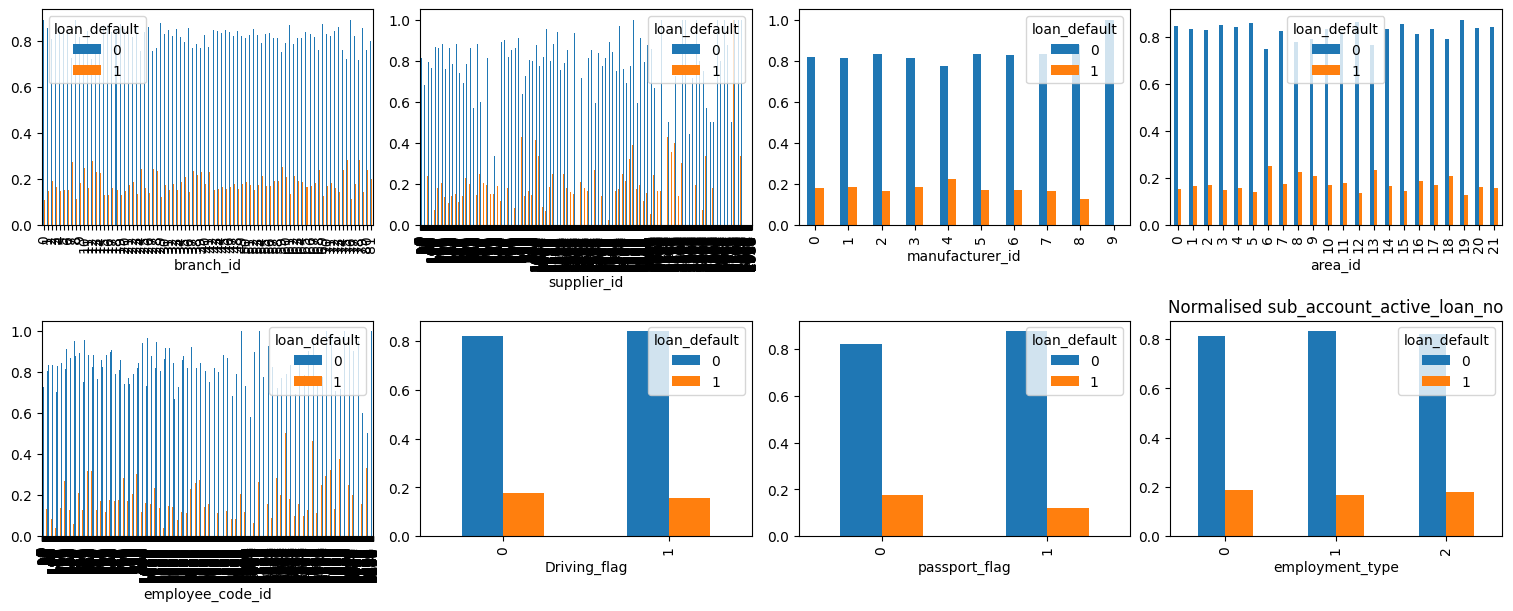

In [11]:
fig, axs =plt.subplots(2,4,constrained_layout=True, figsize=(15, 6))
for i in range(2):
    for j in range(4):
         pd.DataFrame(data,columns=feature_category).groupby(feature_category[i*4+j])['loan_default'].value_counts(normalize=True).unstack().plot.bar(ax=axs[i,j])
         plt.title(f"Normalised {feature[i*4+j]}")
plt.show()      

In [12]:
data['credit_groups']=''
for i in range(len(data)):
    if data['credit_score'][i]<=20:
        data['credit_groups'][i]=1
    if data['credit_score'][i]<=300 and data['credit_score'][i]>20:
        data['credit_groups'][i]=2
    if data['credit_score'][i]<=600 and data['credit_score'][i]>300:
        data['credit_groups'][i]=3
    if data['credit_score'][i]<=800 and data['credit_score'][i]>600:
        data['credit_groups'][i]=4
    if data['credit_score'][i]>800:
        data['credit_groups'][i]=5

C:\Users\82627\AppData\Local\Temp\ipykernel_19944\433484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['credit_groups'][i]=4
C:\Users\82627\AppData\Local\Temp\ipykernel_19944\433484.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['credit_groups'][i]=5
C:\Users\82627\AppData\Local\Temp\ipykernel_19944\433484.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['credit_groups'][i]=1
C:\Users\82627\AppData\Local\

In [13]:
data['age_groups']=''
for i in range(len(data)):
    if data['age'][i]<=25:
        data['age_groups'][i]=1
    if data['age'][i]<=35 and data['age'][i]>25:
        data['age_groups'][i]=2
    if data['age'][i]<=45 and data['age'][i]>35:
        data['age_groups'][i]=3
    if data['age'][i]<=55 and data['age'][i]>45:
        data['age_groups'][i]=4
    if data['age'][i]>55:
        data['age_groups'][i]=5

C:\Users\82627\AppData\Local\Temp\ipykernel_19944\669796676.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age_groups'][i]=1
C:\Users\82627\AppData\Local\Temp\ipykernel_19944\669796676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age_groups'][i]=2
C:\Users\82627\AppData\Local\Temp\ipykernel_19944\669796676.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age_groups'][i]=3
C:\Users\82627\AppData\Local\Te

In [14]:
data['Credit_level']=data['Credit_level'].astype('category')
data['credit_groups']=data['credit_groups'].astype('category')
data['age_groups']=data['age_groups'].astype('category')
feature_credit=['Credit_level','credit_groups','age_groups','loan_default']

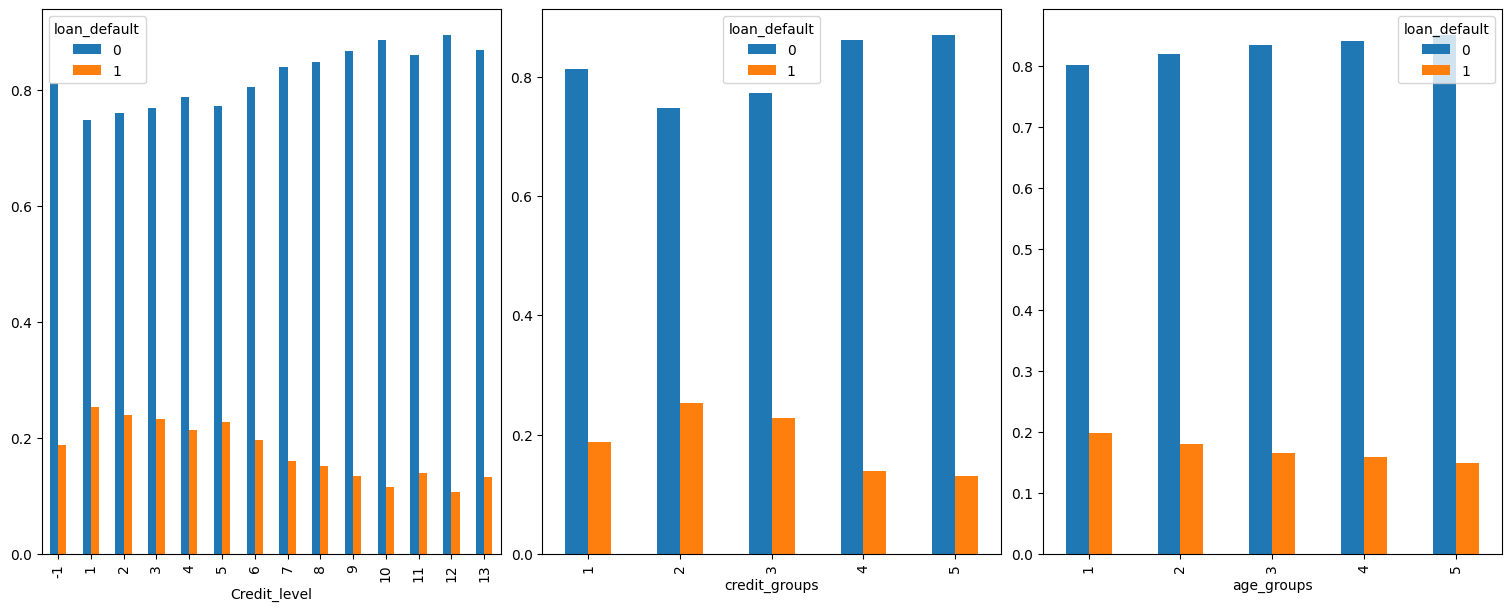

In [15]:

fig, axs =plt.subplots(1,3,constrained_layout=True, figsize=(15, 6))
for i in range(3):
         pd.DataFrame(data,columns=feature_credit).groupby(feature_credit[i])['loan_default'].value_counts(normalize=True).unstack().plot.bar(ax=axs[i])        
plt.show()      

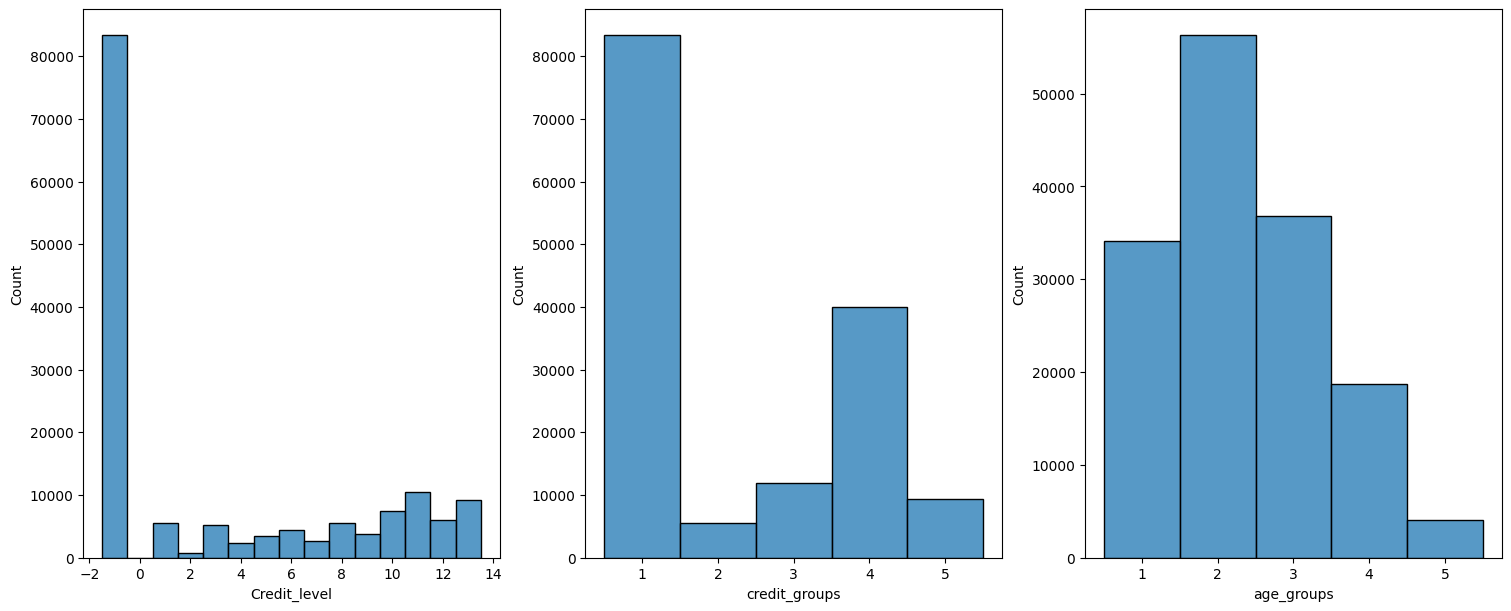

In [16]:
fig, axs =plt.subplots(1,3,constrained_layout=True, figsize=(15, 6))
for i in range(3):
         sns.histplot(data[feature_credit[i]],ax=axs[i]) 
plt.show()   

In [17]:
feature.remove('age')
feature.remove('credit_score')

In [18]:
#normalization
feature_int=[i for i in feature if i not in feature_category]
feature_int=[i for i in feature_int if i not in feature_credit]
len(feature_int)

36

In [19]:
feature_int

['main_account_loan_no',
 'main_account_active_loan_no',
 'main_account_overdue_no',
 'main_account_outstanding_loan',
 'main_account_sanction_loan',
 'main_account_disbursed_loan',
 'sub_account_loan_no',
 'sub_account_active_loan_no',
 'sub_account_overdue_no',
 'sub_account_outstanding_loan',
 'sub_account_sanction_loan',
 'sub_account_disbursed_loan',
 'disbursed_amount',
 'asset_cost',
 'main_account_monthly_payment',
 'sub_account_monthly_payment',
 'last_six_month_new_loan_no',
 'last_six_month_defaulted_no',
 'average_age',
 'credit_history',
 'enquirie_no',
 'loan_to_asset_ratio',
 'total_account_loan_no',
 'sub_account_inactive_loan_no',
 'total_inactive_loan_no',
 'main_account_inactive_loan_no',
 'total_overdue_no',
 'total_outstanding_loan',
 'total_sanction_loan',
 'total_disbursed_loan',
 'total_monthly_payment',
 'outstanding_disburse_ratio',
 'main_account_tenure',
 'sub_account_tenure',
 'disburse_to_sactioned_ratio',
 'active_to_inactive_act_ratio']

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 50 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   main_account_loan_no           150000 non-null  int64   
 1   main_account_active_loan_no    150000 non-null  int64   
 2   main_account_overdue_no        150000 non-null  int64   
 3   main_account_outstanding_loan  150000 non-null  int64   
 4   main_account_sanction_loan     150000 non-null  int64   
 5   main_account_disbursed_loan    150000 non-null  int64   
 6   sub_account_loan_no            150000 non-null  int64   
 7   sub_account_active_loan_no     150000 non-null  int64   
 8   sub_account_overdue_no         150000 non-null  int64   
 9   sub_account_outstanding_loan   150000 non-null  int64   
 10  sub_account_sanction_loan      150000 non-null  int64   
 11  sub_account_disbursed_loan     150000 non-null  int64   
 12  disbursed_amount

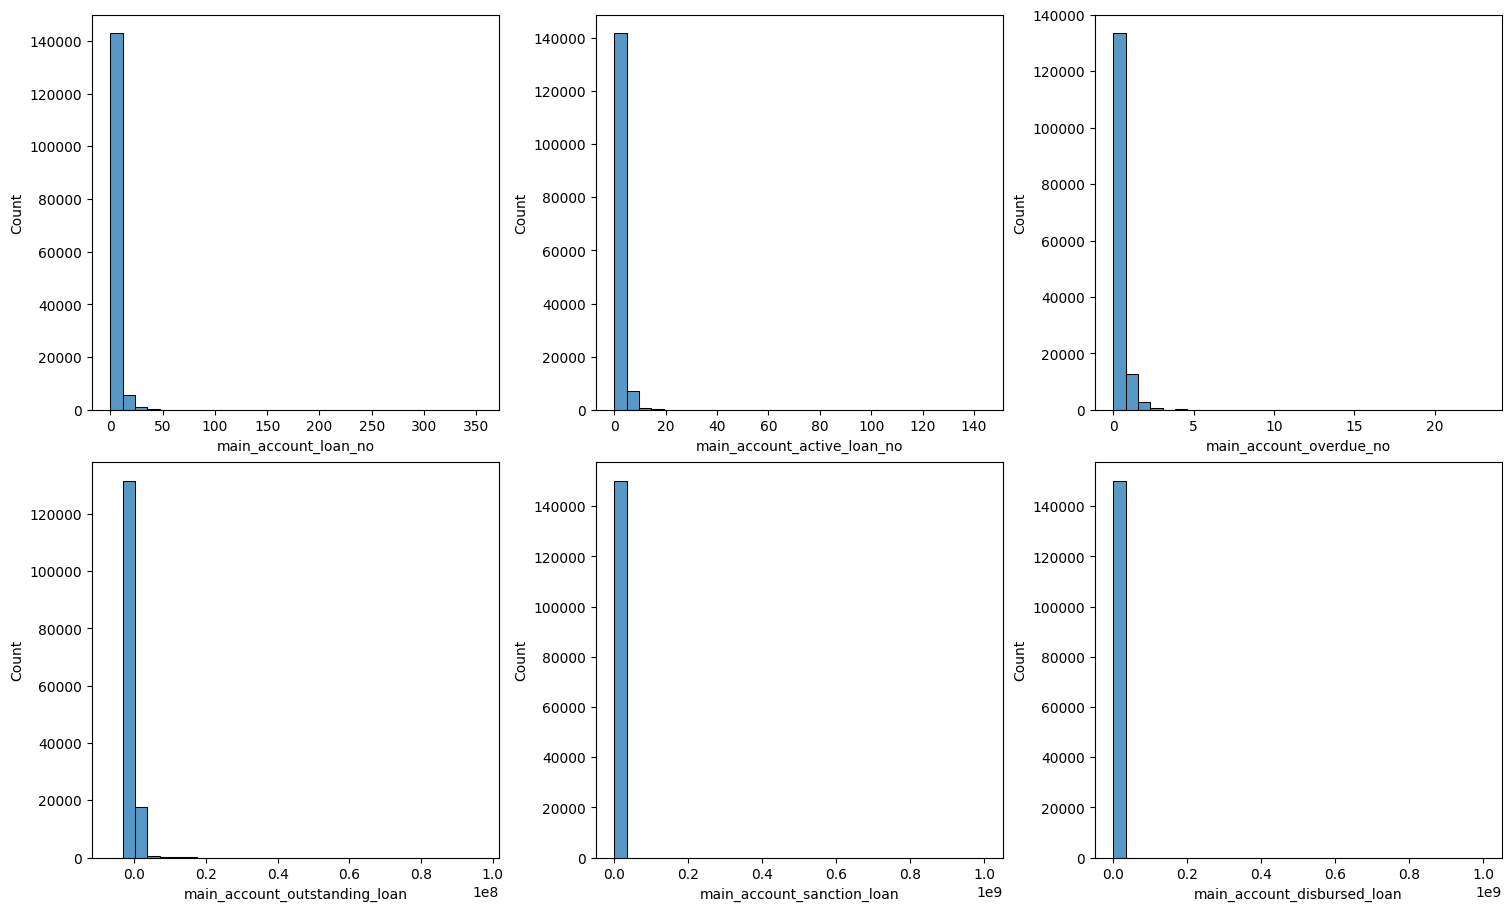

In [21]:
fig, axs =plt.subplots(2,3,constrained_layout=True, figsize=(15, 9))
for i in range(2):
     for j in range(3):
         axesSub = sns.histplot(data[feature_int[i*3+j]],ax=axs[(i,j)],bins=30)
plt.show()

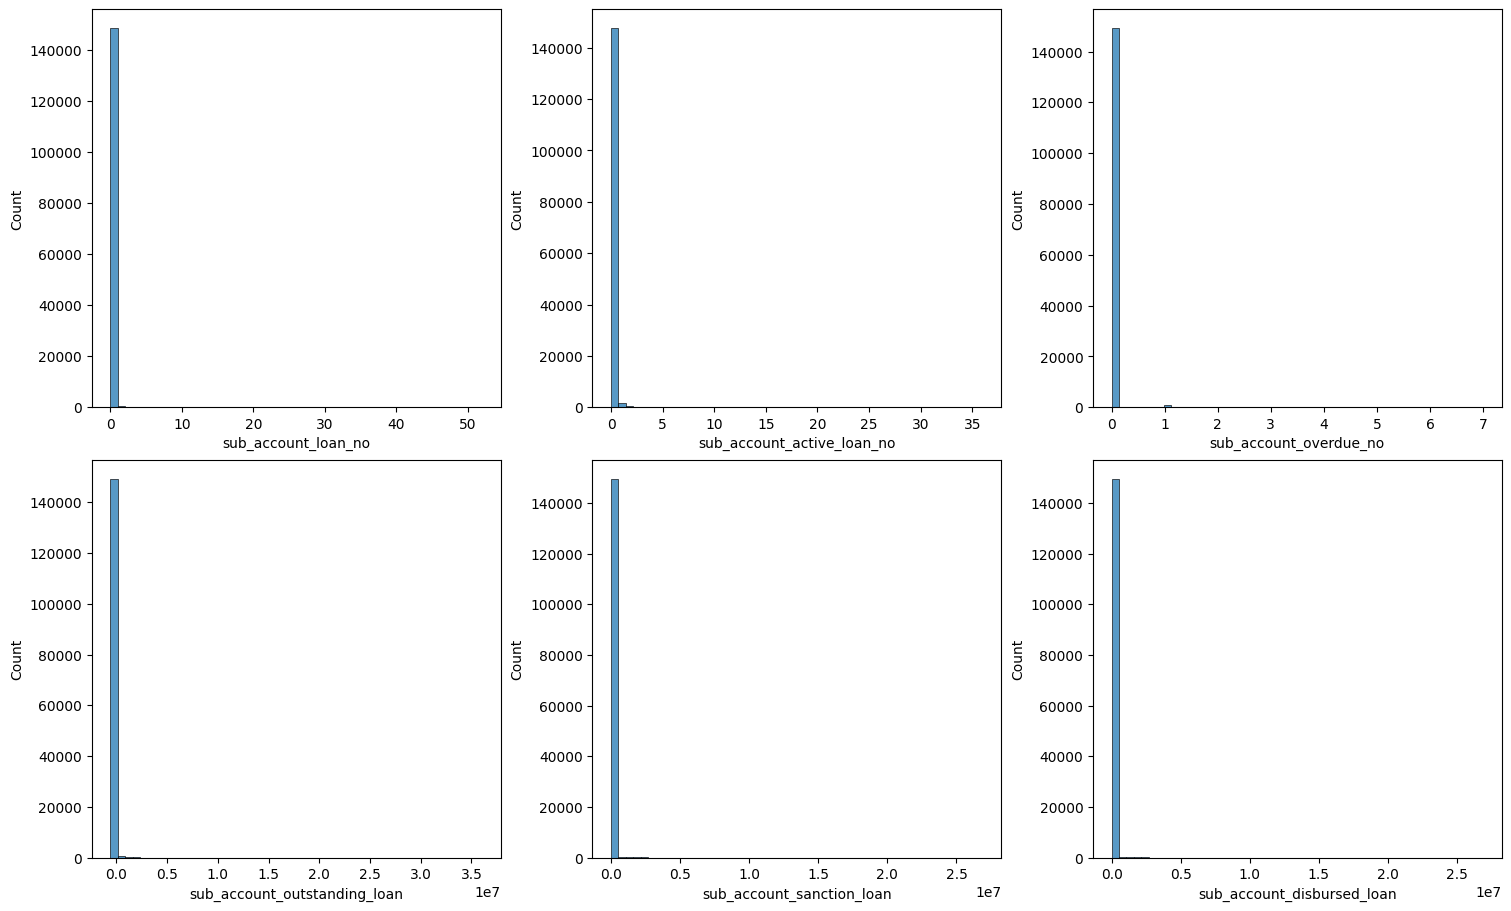

In [23]:
fig, axs =plt.subplots(2,3,constrained_layout=True, figsize=(15, 9))
for i in range(2):
     for j in range(3):
         axesSub = sns.histplot(data[feature_int[i*3+j+6]],ax=axs[(i,j)],bins=50)
plt.show()

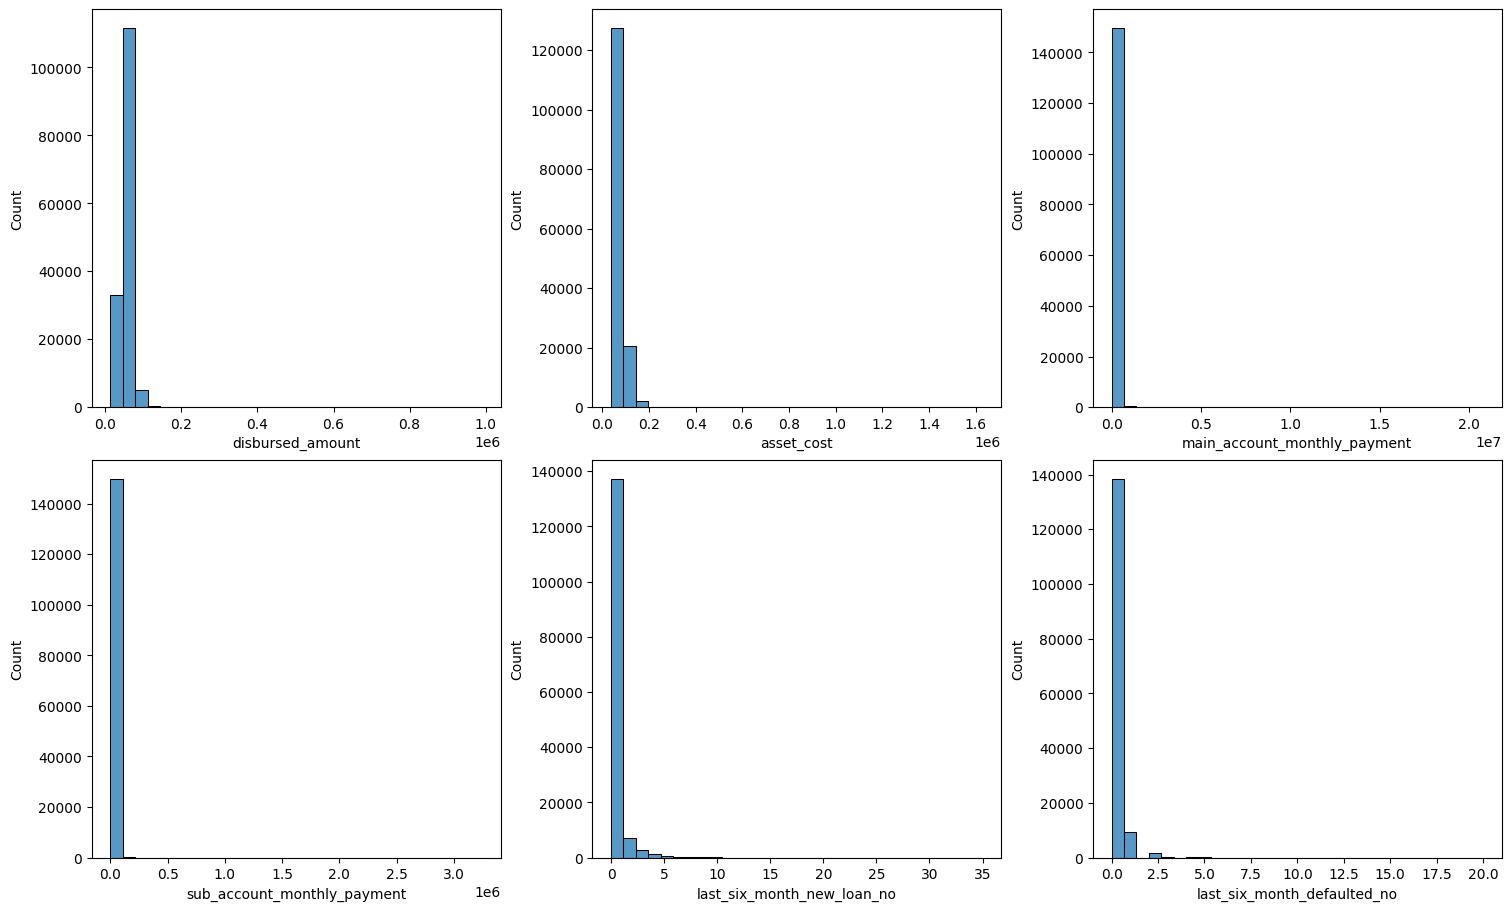

In [22]:
fig, axs =plt.subplots(2,3,constrained_layout=True, figsize=(15, 9))
for i in range(2):
     for j in range(3):
         axesSub = sns.histplot(data[feature_int[i*3+j+12]],ax=axs[(i,j)],bins=30)
plt.show()

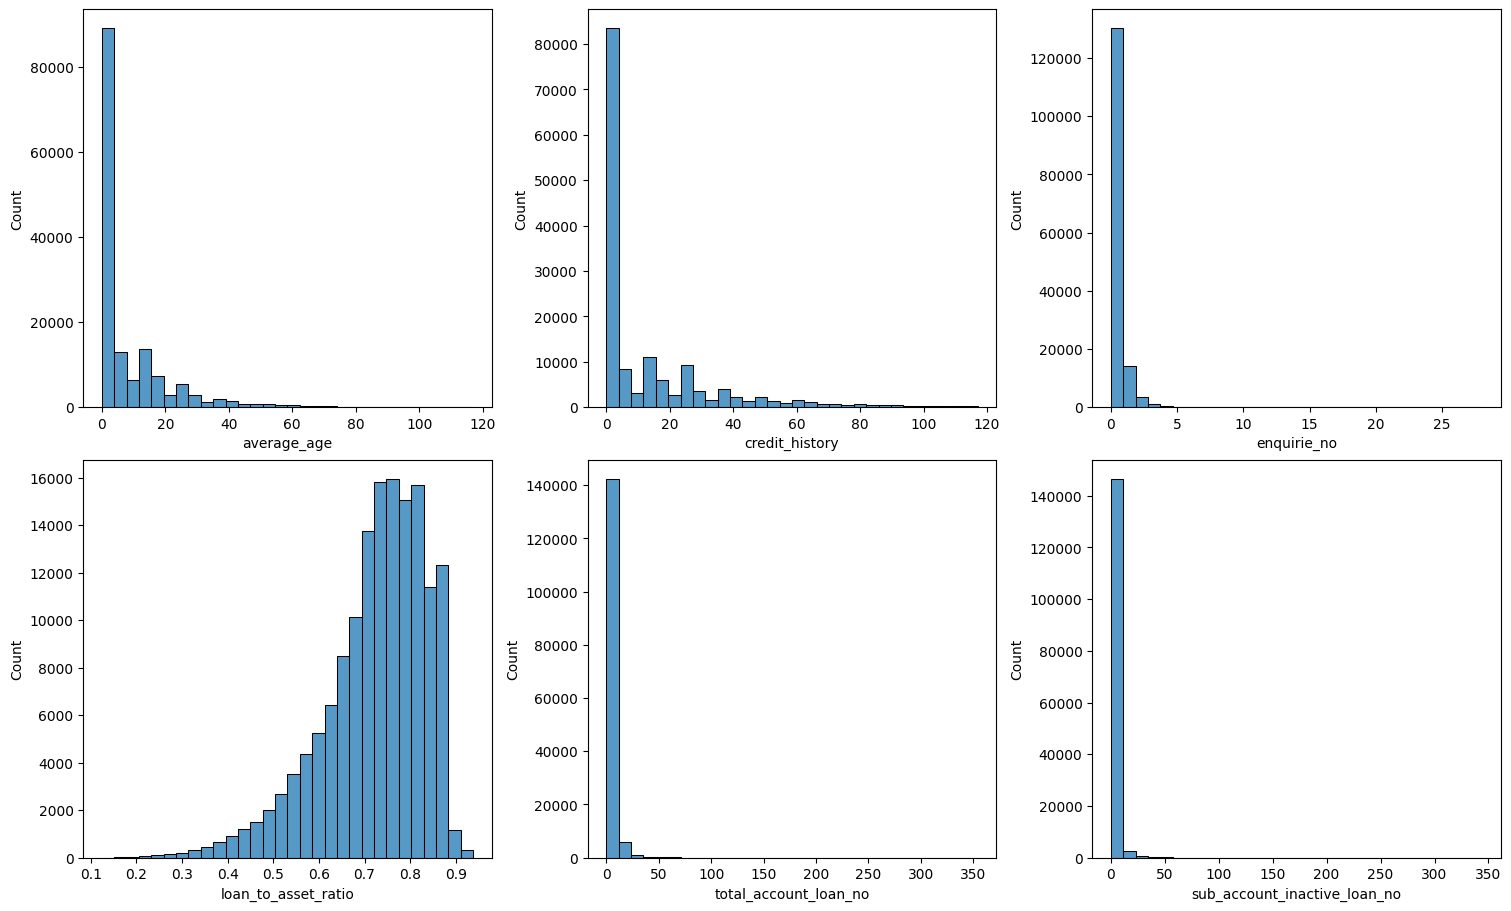

In [24]:
fig, axs =plt.subplots(2,3,constrained_layout=True, figsize=(15, 9))
for i in range(2):
     for j in range(3):
         axesSub = sns.histplot(data[feature_int[i*3+j+18]],ax=axs[(i,j)],bins=30)
plt.show()

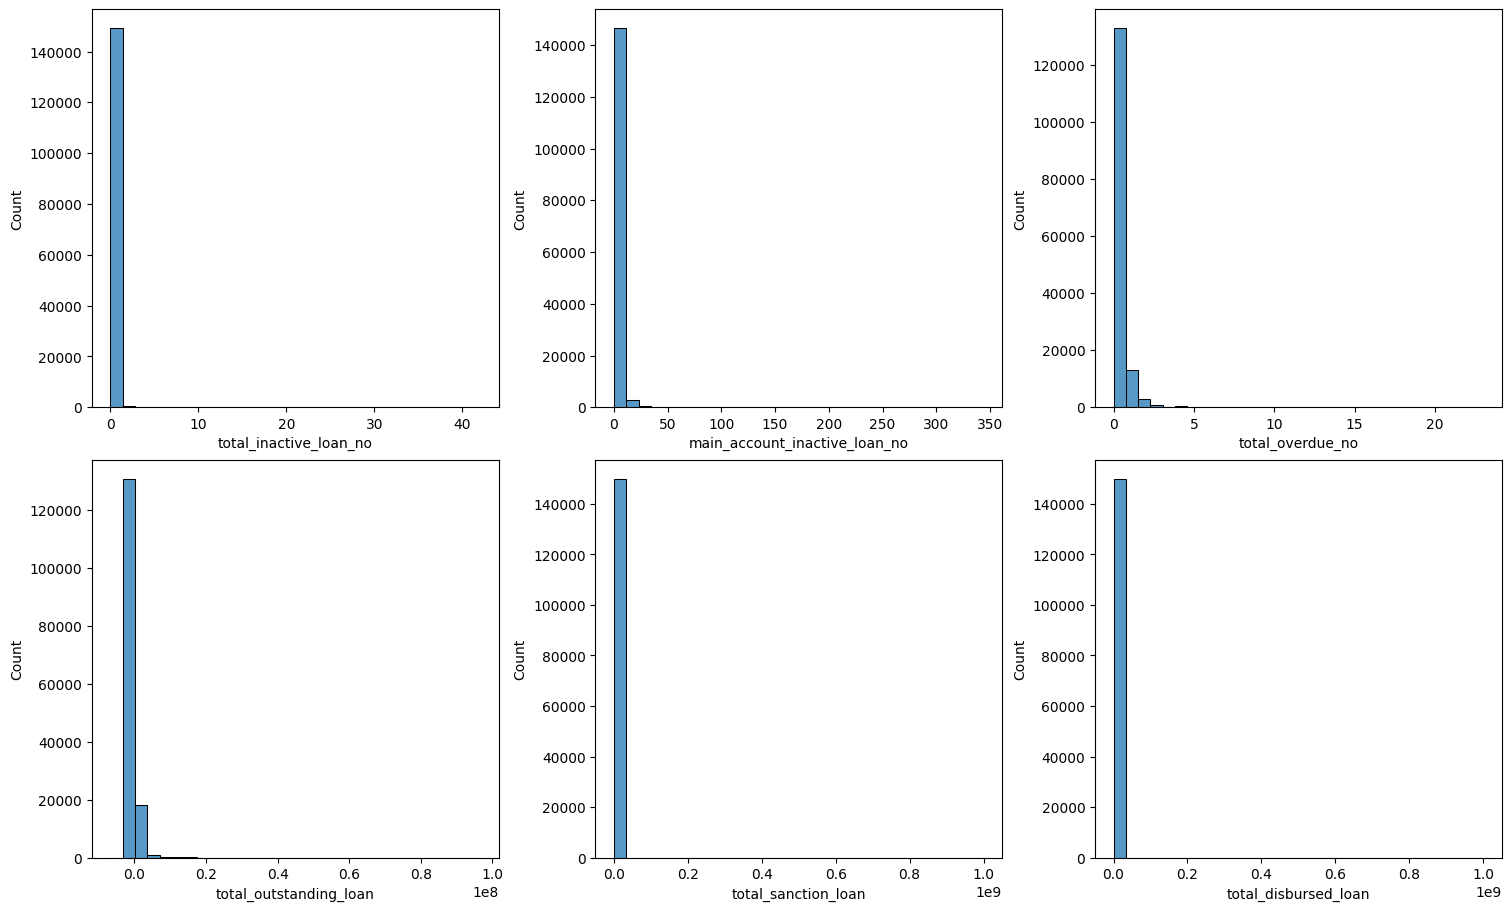

In [25]:
fig, axs =plt.subplots(2,3,constrained_layout=True, figsize=(15, 9))
for i in range(2):
     for j in range(3):
         axesSub = sns.histplot(data[feature_int[i*3+j+24]],ax=axs[(i,j)],bins=30)
plt.show()

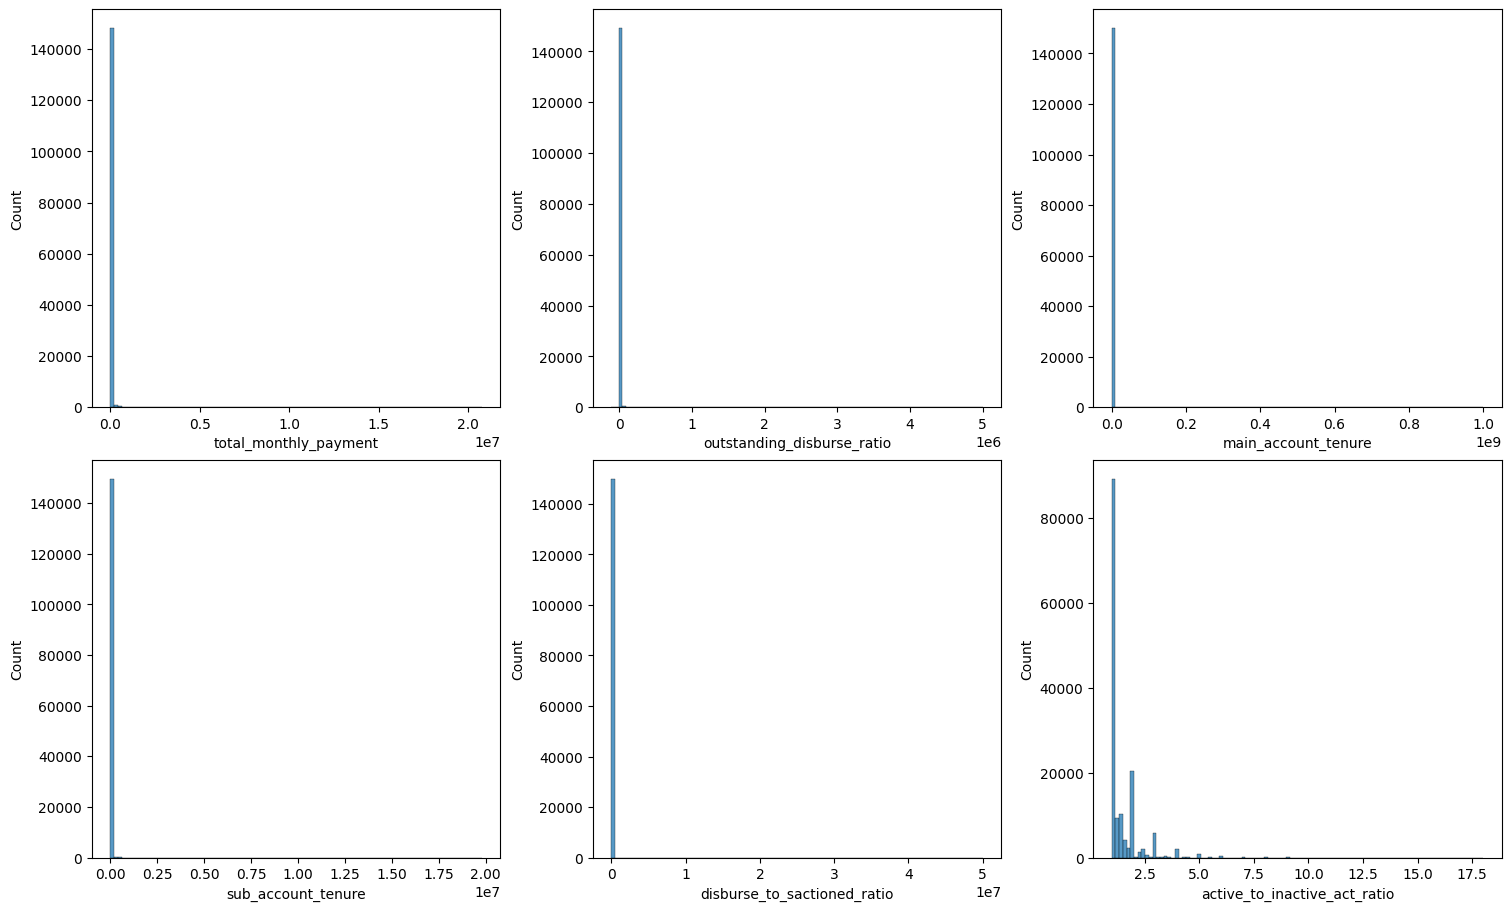

In [59]:
fig, axs =plt.subplots(2,3,constrained_layout=True, figsize=(15, 9))
for i in range(2):
     for j in range(3):
         axesSub = sns.histplot(data[feature_int[i*3+j+30]],ax=axs[(i,j)],bins=100)
plt.show()

In [26]:

data=data.drop(['age','credit_score'],axis=1)

In [27]:
#正则化处理 method1
for i in feature_int:
    data[i]=(data[i]-data[i].mean())/data[i].std()


In [28]:
new_columns_names=feature_int+feature_category[:-1]+feature_credit
data = data.reindex(columns=new_columns_names)

In [29]:
data.head()

,main_account_loan_no,main_account_active_loan_no,main_account_overdue_no,main_account_outstanding_loan,main_account_sanction_loan,main_account_disbursed_loan,sub_account_loan_no,sub_account_active_loan_no,sub_account_overdue_no,sub_account_outstanding_loan,sub_account_sanction_loan,sub_account_disbursed_loan,disbursed_amount,asset_cost,main_account_monthly_payment,sub_account_monthly_payment,last_six_month_new_loan_no,last_six_month_defaulted_no,average_age,credit_history,enquirie_no,loan_to_asset_ratio,total_account_loan_no,sub_account_inactive_loan_no,total_inactive_loan_no,main_account_inactive_loan_no,total_overdue_no,total_outstanding_loan,total_sanction_loan,total_disbursed_loan,total_monthly_payment,outstanding_disburse_ratio,main_account_tenure,sub_account_tenure,disburse_to_sactioned_ratio,active_to_inactive_act_ratio,branch_id,supplier_id,manufacturer_id,area_id,employee_code_id,Driving_flag,passport_flag,employment_type,Credit_level,credit_groups,age_groups,loan_default
0,0.298791,1.000918,-0.282816,-0.153437,-0.067500,-0.067275,-0.0921,-0.086002,-0.065566,-0.033488,-0.042379,-0.041872,0.313235,1.563830,-0.085908,-0.022522,2.715924,-0.250254,-0.508092,0.798652,-0.292042,-1.494142,0.283079,-0.102352,-0.074954,-0.109418,-0.288143,-0.156399,-0.069929,-0.069662,-0.087472,-0.032791,-0.007979,-0.026572,-0.00495,1.343631,0,0,0,0,0,0,0,0,11,4,1,0
1,-0.086034,-0.535410,-0.282816,-0.170343,-0.078357,-0.078118,-0.0921,-0.086002,-0.065566,-0.033488,-0.042379,-0.041872,-0.770481,-0.468999,-0.085908,-0.022522,-0.399740,-0.250254,0.359563,0.041261,-0.292042,-0.541400,-0.096197,0.152487,-0.074954,0.142814,-0.288143,-0.173032,-0.080760,-0.080479,-0.087472,-0.032807,-0.019773,-0.026572,-0.00495,-0.555477,1,1,1,1,1,0,0,1,13,5,2,0
2,-0.470859,-0.535410,-0.282816,-0.170343,-0.078357,-0.078118,-0.0921,-0.086002,-0.065566,-0.033488,-0.042379,-0.041872,0.443188,0.522838,-0.085908,-0.022522,-0.399740,-0.250254,-0.580396,-0.621456,-0.292042,-0.208923,-0.475473,-0.357190,-0.074954,-0.361650,-0.288143,-0.173032,-0.080760,-0.080479,-0.087472,-0.032807,-0.019773,-0.026572,-0.00495,-0.555477,2,2,2,2,2,0,0,1,-1,1,2,0
3,-0.470859,-0.535410,-0.282816,-0.170343,-0.078357,-0.078118,-0.0921,-0.086002,-0.065566,-0.033488,-0.042379,-0.041872,0.448642,-0.372975,-0.085908,-0.022522,-0.399740,-0.250254,-0.580396,-0.621456,-0.292042,1.307685,-0.475473,-0.357190,-0.074954,-0.361650,-0.288143,-0.173032,-0.080760,-0.080479,-0.087472,-0.032807,-0.019773,-0.026572,-0.00495,-0.555477,3,3,1,1,3,0,0,1,-1,1,3,0
4,-0.470859,-0.535410,-0.282816,-0.170343,-0.078357,-0.078118,-0.0921,-0.086002,-0.065566,-0.033488,-0.042379,-0.041872,0.327882,0.305148,-0.085908,-0.022522,-0.399740,-0.250254,-0.580396,-0.621456,-0.292042,-0.059574,-0.475473,-0.357190,-0.074954,-0.361650,-0.288143,-0.173032,-0.080760,-0.080479,-0.087472,-0.032807,-0.019773,-0.026572,-0.00495,-0.555477,5,5,3,2,5,0,0,0,-1,1,2,0


<Axes: >

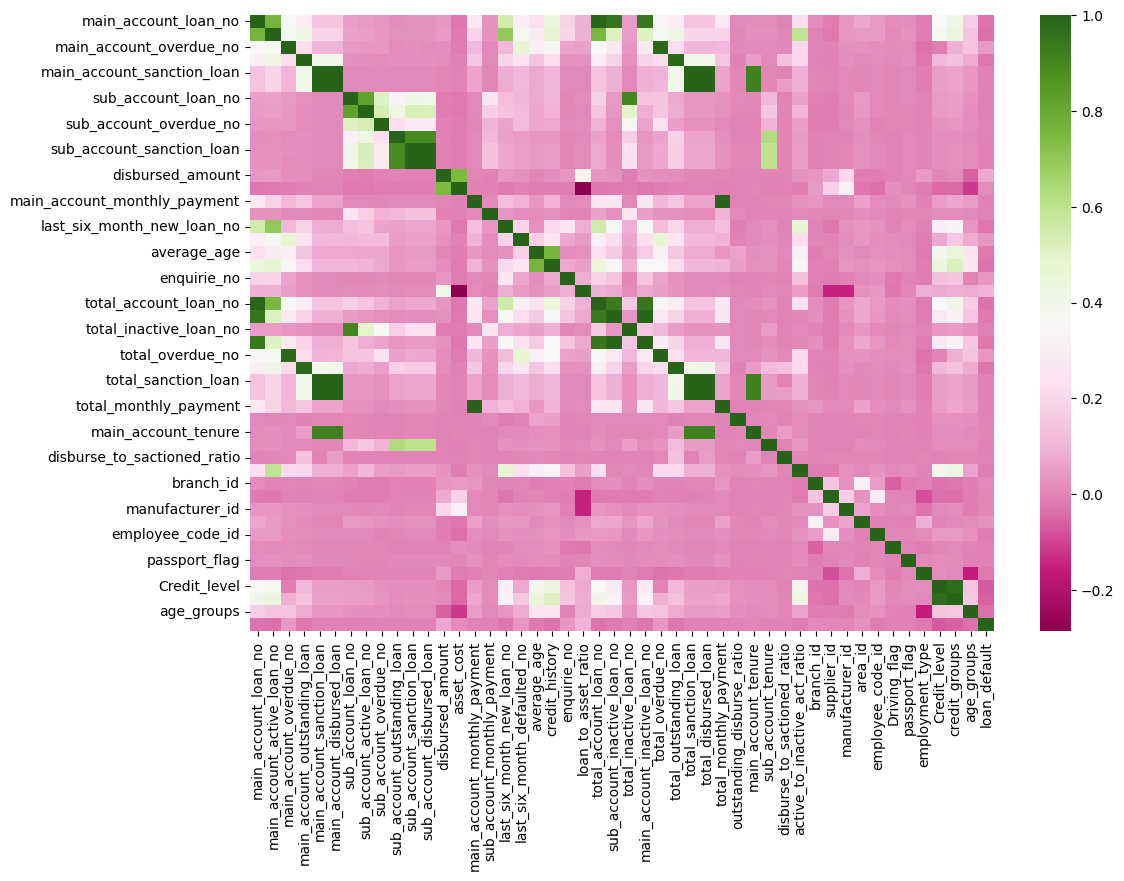

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),cmap="PiYG")

In [31]:
data.corr()['loan_default']

main_account_loan_no            -0.032305
main_account_active_loan_no     -0.036846
main_account_overdue_no          0.041032
main_account_outstanding_loan   -0.024558
main_account_sanction_loan      -0.006458
main_account_disbursed_loan     -0.006333
sub_account_loan_no             -0.008648
sub_account_active_loan_no      -0.006359
sub_account_overdue_no          -0.002136
sub_account_outstanding_loan    -0.004365
sub_account_sanction_loan       -0.004746
sub_account_disbursed_loan      -0.004661
disbursed_amount                 0.073612
asset_cost                       0.012481
main_account_monthly_payment    -0.008386
sub_account_monthly_payment     -0.001197
last_six_month_new_loan_no      -0.026363
last_six_month_defaulted_no      0.034904
average_age                     -0.022180
credit_history                  -0.032522
enquirie_no                      0.040296
loan_to_asset_ratio              0.091999
total_account_loan_no           -0.032910
sub_account_inactive_loan_no    -0

In [ ]:
# fig, axs =plt.subplots(3,6,constrained_layout=True, figsize=(15, 9))
# for i in range(3):
#     for j in range(6):
#         axesSub = sns.histplot(data[feature_int[i*6+j]],ax=axs[(i,j)])
# plt.show()

In [ ]:
#自定义箱体

In [81]:
from sklearn.model_selection import train_test_split
X, y=data.iloc[:,:-1],data['loan_default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# add new features
#interest rate
#data['main_account_interest_rate']=data['main_account_monthly_payment']*12/data['main_account_outstanding_loan']
#data['sub_account_interest_rate']=data['sub_account_monthly_payment']*12/data['sub_account_outstanding_loan']
#data['total_interest_rate']=data['total_monthly_payment']*12/data['total_outstanding_loan']

In [82]:
#model
def save_pkl(obj, path):
    with open(path, 'wb') as f:
        pickle.dump(obj, f)


def load_pkl(path):
    with open(path, 'rb') as f:
        obj = pickle.load(f)
    return obj


def gen_thres_new(df_train, oof_preds):
    df_train['oof_preds'] = oof_preds
    quantile_point = df_train['loan_default'].mean()
    thres = df_train['oof_preds'].quantile(1 - quantile_point)

    _thresh = []
    for thres_item in np.arange(thres - 0.2, thres + 0.2, 0.01):
        _thresh.append(
            [thres_item, f1_score(df_train['loan_default'], np.where(oof_preds > thres_item, 1, 0), average='macro')])

    _thresh = np.array(_thresh)
    best_id = _thresh[:, 1].argmax()
    best_thresh = _thresh[best_id][0]

    print("阈值: {}\n训练集的f1: {}".format(best_thresh, _thresh[best_id][1]))
    return best_thresh


def gen_submit_file(df_test, test_preds, thres, save_path):
    df_test['test_preds_binary'] = np.where(test_preds > thres, 1, 0)
    df_test_submit = df_test[['customer_id', 'test_preds_binary']]
    df_test_submit.columns = ['customer_id', 'loan_default']
    print(f'saving result to: {save_path}')
    df_test_submit.to_csv(save_path, index=False)
    print('done!')
    return df_test_submit


def train_lgb_kfold(X_train, y_train, X_test, n_fold=5):
    '''train lightgbm with k-fold split'''
    gbms = []
    kfold = StratifiedKFold(n_splits=n_fold, random_state=1024, shuffle=True)
    oof_preds = np.zeros((X_train.shape[0],))
    test_preds = np.zeros((X_test.shape[0],))

    for fold, (train_index, val_index) in enumerate(kfold.split(X_train, y_train)):
        logging.info(f'############ fold {fold} ###########')
        X_tr, X_val, y_tr, y_val = X_train.iloc[train_index], X_train.iloc[val_index], y_train[train_index], y_train[val_index]
        dtrain = lgb.Dataset(X_tr, y_tr)
        dvalid = lgb.Dataset(X_val, y_val, reference=dtrain)

        params = {
            'objective': 'binary',
            'metric': 'auc',
            'num_leaves': 64,
            'learning_rate': 0.02,
            'min_data_in_leaf': 150,
            'feature_fraction': 0.8,
            'bagging_fraction': 0.7,
            'n_jobs': -1,
            'seed': 1024
        }

        gbm = lgb.train(params,
                        dtrain,
                        num_boost_round=1000,
                        valid_sets=[dtrain, dvalid],
                        verbose_eval=50,
                        early_stopping_rounds=20)

        oof_preds[val_index] = gbm.predict(X_val, num_iteration=gbm.best_iteration)
        test_preds += gbm.predict(X_test, num_iteration=gbm.best_iteration) / kfold.n_splits
        gbms.append(gbm)

    return gbms, oof_preds, test_preds



def train_xgb_kfold(X_train, y_train, X_test, n_fold=5):
    '''train xgboost with k-fold split'''
    gbms = []
    kfold = StratifiedKFold(n_splits=10, random_state=1024, shuffle=True)
    oof_preds = np.zeros((X_train.shape[0],))
    test_preds = np.zeros((X_test.shape[0],))

    for fold, (train_index, val_index) in enumerate(kfold.split(X_train, y_train)):
        logging.info(f'############ fold {fold} ###########')
        X_tr, X_val, y_tr, y_val = X_train.iloc[train_index], X_train.iloc[val_index], y_train[train_index], y_train[val_index]
        dtrain = xgb.DMatrix(X_tr, y_tr)
        dvalid = xgb.DMatrix(X_val, y_val)
        dtest = xgb.DMatrix(X_test)

        params={
            'booster':'gbtree',
            'objective': 'binary:logistic',
            'eval_metric': ['logloss', 'auc'],
            'max_depth': 8,
            'subsample':0.9,
            'min_child_weight': 10,
            'colsample_bytree':0.85,
            'lambda': 10,
            'eta': 0.02,
            'seed': 1024
        }

        watchlist = [(dtrain, 'train'), (dvalid, 'test')]

        gbm = xgb.train(params,
                        dtrain,
                        num_boost_round=1000,
                        evals=watchlist,
                        verbose_eval=50,
                        early_stopping_rounds=20)

        oof_preds[val_index] = gbm.predict(dvalid, iteration_range=(0, gbm.best_iteration))
        test_preds += gbm.predict(dtest, iteration_range=(0, gbm.best_iteration)) / kfold.n_splits
        gbms.append(gbm)
    return gbms, oof_preds, test_preds

In [83]:
#using model
train_xgb_kfold(X_train,y_train,X_test)

2023-10-12 17:20:15,662 : INFO : ############ fold 0 ###########


KeyError: '[0, 4, 12, 20, 23, 33, 34, 35, 39, 42, 44, 57, 62, 70, 76, 77, 79, 86, 87, 90, 97, 108, 110, 115, 117, 119, 121, 127, 128, 129, 135, 139, 142, 144, 149, 154, 161, 162, 171, 175, 176, 180, 182, 186, 195, 196, 197, 198, 201, 206, 211, 213, 225, 237, 238, 256, 260, 262, 264, 271, 274, 285, 291, 295, 297, 298, 301, 303, 304, 306, 307, 309, 314, 317, 323, 324, 326, 328, 333, 342, 358, 359, 362, 366, 378, 379, 385, 391, 394, 396, 399, 400, 401, 413, 422, 428, 430, 431, 436, 437, 438, 441, 442, 445, 447, 452, 457, 460, 466, 470, 472, 476, 478, 479, 488, 490, 491, 498, 502, 505, 508, 509, 512, 516, 519, 520, 522, 543, 548, 549, 550, 565, 567, 572, 573, 575, 577, 582, 585, 589, 593, 602, 609, 616, 625, 628, 632, 634, 644, 646, 647, 651, 655, 659, 662, 663, 664, 668, 669, 671, 673, 674, 675, 684, 686, 687, 690, 698, 700, 704, 708, 712, 713, 716, 724, 758, 759, 773, 775, 779, 782, 784, 787, 798, 803, 804, 809, 811, 812, 813, 821, 830, 854, 856, 857, 861, 862, 866, 867, 868, 875, 876, 878, 880, 884, 886, 896, 905, 906, 920, 923, 931, 933, 936, 940, 943, 947, 949, 951, 954, 962, 963, 964, 966, 970, 974, 979, 980, 981, 985, 986, 989, 991, 1002, 1009, 1020, 1025, 1027, 1030, 1031, 1032, 1034, 1036, 1041, 1043, 1045, 1047, 1054, 1059, 1064, 1068, 1069, 1078, 1079, 1081, 1088, 1089, 1090, 1105, 1107, 1108, 1116, 1126, 1131, 1134, 1137, 1139, 1143, 1146, 1150, 1151, 1155, 1160, 1164, 1165, 1166, 1171, 1176, 1181, 1182, 1185, 1189, 1199, 1202, 1205, 1213, 1224, 1230, 1235, 1242, 1246, 1256, 1261, 1263, 1273, 1275, 1276, 1278, 1279, 1284, 1285, 1300, 1303, 1309, 1313, 1315, 1318, 1325, 1330, 1332, 1343, 1346, 1348, 1349, 1361, 1362, 1366, 1370, 1371, 1372, 1380, 1384, 1388, 1397, 1405, 1411, 1412, 1413, 1419, 1424, 1427, 1430, 1441, 1447, 1450, 1452, 1454, 1457, 1463, 1472, 1478, 1482, 1491, 1499, 1501, 1507, 1516, 1517, 1519, 1522, 1538, 1540, 1543, 1549, 1550, 1560, 1567, 1570, 1571, 1574, 1576, 1581, 1582, 1584, 1586, 1589, 1592, 1595, 1598, 1599, 1608, 1618, 1623, 1624, 1630, 1635, 1637, 1641, 1644, 1648, 1651, 1652, 1656, 1679, 1681, 1682, 1684, 1689, 1692, 1704, 1709, 1717, 1718, 1721, 1728, 1741, 1747, 1749, 1761, 1762, 1763, 1764, 1765, 1768, 1770, 1772, 1779, 1784, 1786, 1790, 1792, 1795, 1799, 1802, 1807, 1810, 1812, 1815, 1820, 1824, 1827, 1841, 1846, 1847, 1848, 1852, 1857, 1860, 1861, 1862, 1863, 1864, 1866, 1876, 1878, 1879, 1880, 1895, 1897, 1900, 1910, 1922, 1928, 1929, 1938, 1941, 1943, 1945, 1948, 1949, 1952, 1954, 1956, 1958, 1965, 1966, 1968, 1970, 1972, 1974, 1983, 1990, 1993, 1999, 2002, 2009, 2014, 2029, 2033, 2034, 2037, 2038, 2040, 2044, 2047, 2058, 2062, 2071, 2072, 2073, 2086, 2088, 2091, 2092, 2097, 2103, 2104, 2107, 2108, 2110, 2111, 2113, 2115, 2119, 2122, 2129, 2130, 2132, 2133, 2136, 2137, 2143, 2144, 2152, 2154, 2158, 2165, 2167, 2168, 2173, 2174, 2184, 2186, 2189, 2194, 2200, 2201, 2211, 2212, 2223, 2227, 2230, 2231, 2244, 2246, 2255, 2258, 2259, 2264, 2271, 2280, 2285, 2286, 2290, 2296, 2297, 2298, 2315, 2320, 2323, 2324, 2327, 2328, 2338, 2339, 2340, 2343, 2344, 2348, 2361, 2362, 2367, 2371, 2372, 2375, 2385, 2391, 2392, 2394, 2401, 2406, 2408, 2409, 2425, 2426, 2437, 2439, 2442, 2447, 2448, 2449, 2450, 2451, 2483, 2484, 2490, 2494, 2495, 2498, 2502, 2504, 2505, 2507, 2510, 2514, 2515, 2518, 2530, 2538, 2540, 2542, 2547, 2550, 2551, 2556, 2557, 2569, 2571, 2572, 2581, 2582, 2584, 2588, 2591, 2592, 2603, 2605, 2609, 2616, 2621, 2633, 2636, 2643, 2657, 2660, 2662, 2683, 2685, 2687, 2688, 2694, 2702, 2707, 2715, 2718, 2721, 2722, 2726, 2731, 2734, 2735, 2736, 2737, 2739, 2740, 2741, 2744, 2746, 2750, 2756, 2758, 2769, 2771, 2773, 2776, 2782, 2783, 2784, 2785, 2787, 2788, 2796, 2797, 2800, 2801, 2807, 2811, 2813, 2815, 2818, 2820, 2826, 2827, 2831, 2832, 2841, 2854, 2861, 2872, 2873, 2874, 2875, 2888, 2891, 2893, 2903, 2912, 2937, 2938, 2941, 2945, 2950, 2956, 2957, 2960, 2964, 2968, 2971, 2975, 2989, 2992, 2996, 2997, 3000, 3007, 3010, 3011, 3014, 3015, 3021, 3022, 3026, 3029, 3030, 3041, 3049, 3050, 3054, 3056, 3057, 3059, 3064, 3071, 3073, 3076, 3077, 3085, 3086, 3090, 3095, 3099, 3102, 3112, 3113, 3115, 3116, 3117, 3118, 3128, 3129, 3130, 3132, 3137, 3142, 3149, 3150, 3153, 3156, 3161, 3166, 3167, 3171, 3182, 3194, 3199, 3200, 3206, 3210, 3211, 3214, 3215, 3220, 3221, 3222, 3227, 3235, 3238, 3241, 3242, 3245, 3248, 3254, 3275, 3282, 3287, 3288, 3289, 3292, 3296, 3299, 3304, 3308, 3310, 3312, 3313, 3319, 3325, 3328, 3329, 3335, 3337, 3344, 3351, 3354, 3357, 3365, 3367, 3377, 3381, 3392, 3395, 3406, 3414, 3416, 3418, 3419, 3426, 3427, 3429, 3430, 3451, 3461, 3465, 3469, 3478, 3479, 3483, 3484, 3491, 3494, 3496, 3506, 3509, 3511, 3533, 3548, 3556, 3557, 3559, 3561, 3564, 3568, 3580, 3581, 3584, 3585, 3592, 3594, 3600, 3605, 3614, 3615, 3616, 3617, 3624, 3627, 3633, 3655, 3656, 3660, 3674, 3676, 3686, 3695, 3697, 3701, 3713, 3714, 3725, 3733, 3737, 3738, 3742, 3761, 3773, 3782, 3785, 3786, 3787, 3790, 3791, 3795, 3798, 3800, 3802, 3804, 3807, 3818, 3821, 3822, 3826, 3833, 3836, 3837, 3840, 3842, 3845, 3848, 3870, 3878, 3882, 3885, 3896, 3898, 3899, 3903, 3908, 3912, 3915, 3918, 3921, 3923, 3935, 3940, 3945, 3947, 3951, 3952, 3955, 3957, 3959, 3962, 3963, 3975, 3976, 3980, 3982, 3987, 3992, 3994, 3995, 3997, 4004, 4007, 4009, 4012, 4019, 4021, 4022, 4033, 4039, 4040, 4046, 4049, 4050, 4051, 4052, 4058, 4060, 4065, 4068, 4077, 4078, 4079, 4080, 4081, 4082, 4083, 4087, 4093, 4095, 4100, 4104, 4106, 4107, 4113, 4116, 4118, 4129, 4143, 4144, 4147, 4148, 4154, 4155, 4157, 4159, 4172, 4175, 4184, 4189, 4190, 4193, 4196, 4198, 4204, 4210, 4212, 4215, 4217, 4218, 4224, 4229, 4232, 4243, 4244, 4248, 4250, 4252, 4253, 4269, 4270, 4272, 4274, 4280, 4281, 4287, 4292, 4293, 4298, 4306, 4313, 4314, 4328, 4335, 4337, 4338, 4339, 4346, 4362, 4374, 4375, 4378, 4392, 4393, 4395, 4397, 4402, 4404, 4415, 4417, 4419, 4421, 4422, 4440, 4441, 4444, 4446, 4449, 4451, 4467, 4468, 4469, 4474, 4478, 4492, 4493, 4495, 4498, 4506, 4508, 4510, 4513, 4515, 4519, 4523, 4524, 4526, 4535, 4537, 4541, 4545, 4548, 4550, 4556, 4557, 4559, 4563, 4568, 4575, 4594, 4597, 4598, 4599, 4603, 4604, 4609, 4615, 4623, 4624, 4629, 4634, 4639, 4643, 4645, 4656, 4658, 4660, 4663, 4665, 4678, 4679, 4685, 4688, 4689, 4691, 4699, 4704, 4710, 4723, 4727, 4728, 4733, 4738, 4741, 4745, 4749, 4750, 4751, 4760, 4764, 4772, 4773, 4779, 4788, 4790, 4792, 4795, 4801, 4802, 4810, 4813, 4816, 4818, 4820, 4822, 4830, 4845, 4851, 4859, 4871, 4872, 4874, 4877, 4890, 4896, 4900, 4903, 4911, 4919, 4927, 4929, 4939, 4940, 4941, 4947, 4961, 4969, 4971, 4975, 4981, 4988, 4989, 4998, 5003, 5011, 5013, 5015, 5027, 5038, 5047, 5049, 5052, 5055, 5059, 5061, 5066, 5067, 5069, 5071, 5072, 5073, 5082, 5089, 5090, 5095, 5098, 5104, 5106, 5112, 5114, 5120, 5122, 5131, 5133, 5137, 5146, 5154, 5168, 5170, 5171, 5173, 5175, 5178, 5181, 5185, 5198, 5210, 5211, 5215, 5216, 5219, 5222, 5223, 5232, 5240, 5241, 5254, 5255, 5264, 5266, 5286, 5299, 5300, 5303, 5308, 5314, 5317, 5324, 5326, 5330, 5343, 5344, 5346, 5348, 5352, 5354, 5366, 5372, 5374, 5381, 5385, 5393, 5396, 5399, 5401, 5406, 5415, 5418, 5419, 5422, 5424, 5428, 5431, 5432, 5438, 5448, 5449, 5458, 5466, 5467, 5471, 5476, 5488, 5491, 5498, 5503, 5510, 5512, 5519, 5533, 5534, 5537, 5540, 5541, 5542, 5545, 5548, 5549, 5551, 5554, 5561, 5562, 5567, 5579, 5582, 5588, 5595, 5600, 5601, 5604, 5614, 5616, 5624, 5625, 5627, 5629, 5638, 5641, 5649, 5651, 5652, 5658, 5667, 5669, 5671, 5672, 5677, 5684, 5705, 5707, 5709, 5726, 5735, 5737, 5739, 5743, 5746, 5748, 5752, 5757, 5759, 5761, 5763, 5766, 5772, 5779, 5789, 5794, 5799, 5813, 5818, 5821, 5823, 5824, 5827, 5828, 5832, 5843, 5845, 5851, 5852, 5855, 5864, 5865, 5866, 5874, 5875, 5879, 5881, 5884, 5890, 5895, 5903, 5908, 5929, 5930, 5946, 5950, 5952, 5954, 5955, 5957, 5964, 5965, 5966, 5968, 5979, 5991, 5992, 5995, 5996, 5997, 5999, 6002, 6006, 6009, 6014, 6019, 6025, 6031, 6034, 6039, 6047, 6048, 6052, 6054, 6059, 6062, 6065, 6067, 6071, 6072, 6075, 6077, 6084, 6085, 6091, 6092, 6095, 6096, 6098, 6104, 6108, 6110, 6114, 6117, 6118, 6120, 6135, 6143, 6148, 6151, 6152, 6165, 6172, 6177, 6181, 6184, 6191, 6192, 6194, 6199, 6203, 6208, 6209, 6211, 6213, 6216, 6219, 6231, 6232, 6234, 6235, 6236, 6237, 6245, 6256, 6262, 6266, 6270, 6273, 6274, 6284, 6288, 6290, 6297, 6298, 6299, 6302, 6323, 6324, 6330, 6340, 6342, 6347, 6351, 6355, 6359, 6360, 6361, 6363, 6367, 6370, 6378, 6386, 6388, 6389, 6391, 6396, 6399, 6404, 6409, 6411, 6413, 6417, 6418, 6422, 6423, 6425, 6426, 6432, 6433, 6439, 6442, 6443, 6448, 6452, 6454, 6456, 6465, 6467, 6468, 6469, 6478, 6483, 6488, 6491, 6496, 6498, 6502, 6506, 6510, 6516, 6517, 6526, 6527, 6540, 6541, 6543, 6552, 6555, 6559, 6561, 6569, 6576, 6578, 6579, 6582, 6595, 6597, 6602, 6606, 6610, 6633, 6637, 6650, 6657, 6664, 6667, 6678, 6683, 6684, 6692, 6695, 6696, 6697, 6700, 6708, 6717, 6718, 6728, 6729, 6730, 6733, 6738, 6743, 6748, 6756, 6757, 6760, 6763, 6766, 6767, 6770, 6781, 6785, 6792, 6799, 6804, 6806, 6811, 6818, 6821, 6827, 6832, 6840, 6843, 6847, 6848, 6851, 6852, 6865, 6872, 6873, 6882, 6899, 6903, 6908, 6912, 6913, 6915, 6916, 6919, 6921, 6924, 6933, 6936, 6940, 6946, 6947, 6956, 6965, 6969, 6974, 6976, 6979, 6980, 6985, 6986, 7007, 7013, 7019, 7024, 7027, 7028, 7031, 7037, 7040, 7041, 7047, 7049, 7052, 7057, 7058, 7059, 7060, 7064, 7066, 7073, 7077, 7090, 7092, 7095, 7104, 7105, 7107, 7108, 7112, 7117, 7119, 7123, 7128, 7132, 7137, 7141, 7149, 7156, 7162, 7164, 7168, 7178, 7187, 7191, 7200, 7201, 7214, 7215, 7217, 7222, 7225, 7230, 7242, 7243, 7251, 7255, 7259, 7260, 7264, 7266, 7268, 7271, 7277, 7283, 7284, 7290, 7291, 7298, 7299, 7300, 7301, 7315, 7316, 7319, 7320, 7321, 7326, 7327, 7329, 7331, 7335, 7336, 7339, 7340, 7350, 7351, 7354, 7355, 7363, 7365, 7367, 7372, 7381, 7382, 7384, 7389, 7390, 7395, 7397, 7398, 7412, 7416, 7418, 7423, 7427, 7431, 7433, 7438, 7443, 7445, 7446, 7448, 7453, 7459, 7462, 7467, 7470, 7473, 7476, 7483, 7487, 7492, 7494, 7502, 7507, 7513, 7515, 7516, 7518, 7519, 7520, 7523, 7524, 7525, 7528, 7532, 7547, 7550, 7576, 7583, 7588, 7593, 7598, 7600, 7623, 7628, 7643, 7653, 7654, 7665, 7666, 7667, 7674, 7682, 7690, 7693, 7695, 7696, 7701, 7702, 7703, 7705, 7707, 7713, 7714, 7715, 7718, 7726, 7733, 7740, 7748, 7750, 7751, 7756, 7763, 7765, 7767, 7781, 7794, 7796, 7801, 7819, 7820, 7823, 7828, 7832, 7833, 7834, 7842, 7843, 7847, 7864, 7867, 7870, 7876, 7878, 7881, 7884, 7890, 7908, 7911, 7916, 7922, 7923, 7929, 7941, 7947, 7950, 7959, 7960, 7962, 7968, 7969, 7978, 7981, 7994, 7995, 8008, 8018, 8022, 8027, 8032, 8033, 8034, 8035, 8042, 8045, 8046, 8050, 8051, 8053, 8059, 8062, 8075, 8080, 8082, 8085, 8091, 8092, 8098, 8099, 8105, 8106, 8113, 8114, 8118, 8121, 8122, 8130, 8138, 8158, 8160, 8169, 8179, 8180, 8185, 8191, 8215, 8216, 8218, 8222, 8224, 8230, 8231, 8233, 8236, 8241, 8242, 8244, 8245, 8248, 8256, 8257, 8262, 8270, 8271, 8275, 8277, 8279, 8284, 8286, 8288, 8289, 8291, 8295, 8296, 8306, 8309, 8311, 8318, 8319, 8325, 8340, 8341, 8343, 8345, 8347, 8350, 8362, 8363, 8368, 8379, 8395, 8396, 8397, 8398, 8399, 8401, 8405, 8409, 8411, 8435, 8437, 8440, 8442, 8443, 8447, 8449, 8464, 8470, 8472, 8473, 8479, 8492, 8497, 8503, 8506, 8517, 8518, 8523, 8529, 8535, 8540, 8546, 8547, 8551, 8557, 8558, 8559, 8561, 8563, 8566, 8569, 8579, 8581, 8588, 8596, 8599, 8601, 8608, 8613, 8617, 8619, 8620, 8626, 8636, 8643, 8653, 8655, 8658, 8667, 8676, 8680, 8682, 8683, 8684, 8686, 8690, 8693, 8696, 8700, 8703, 8708, 8710, 8713, 8725, 8736, 8739, 8740, 8745, 8748, 8750, 8753, 8754, 8764, 8766, 8768, 8771, 8773, 8775, 8776, 8777, 8788, 8804, 8811, 8822, 8825, 8827, 8832, 8838, 8841, 8844, 8849, 8850, 8851, 8859, 8861, 8864, 8865, 8875, 8880, 8891, 8893, 8898, 8906, 8913, 8917, 8919, 8924, 8926, 8931, 8939, 8943, 8945, 8950, 8953, 8959, 8960, 8965, 8966, 8968, 8970, 8978, 8988, 8994, 8995, 8999, 9024, 9025, 9026, 9030, 9035, 9043, 9057, 9059, 9061, 9067, 9069, 9080, 9090, 9105, 9122, 9137, 9138, 9140, 9146, 9150, 9155, 9158, 9161, 9163, 9169, 9177, 9181, 9187, 9188, 9189, 9193, 9197, 9202, 9203, 9206, 9208, 9209, 9214, 9220, 9231, 9237, 9245, 9249, 9253, 9255, 9258, 9259, 9261, 9263, 9274, 9278, 9281, 9286, 9288, 9293, 9296, 9298, 9314, 9317, 9320, 9329, 9338, 9339, 9341, 9342, 9351, 9355, 9358, 9360, 9364, 9371, 9384, 9385, 9392, 9400, 9410, 9411, 9419, 9420, 9430, 9434, 9444, 9447, 9451, 9454, 9456, 9459, 9461, 9463, 9464, 9481, 9482, 9485, 9502, 9508, 9516, 9517, 9518, 9521, 9524, 9526, 9531, 9541, 9548, 9555, 9558, 9561, 9562, 9566, 9573, 9580, 9582, 9588, 9590, 9594, 9598, 9600, 9602, 9606, 9616, 9624, 9626, 9630, 9631, 9639, 9641, 9649, 9652, 9656, 9660, 9663, 9669, 9679, 9683, 9687, 9688, 9694, 9697, 9699, 9700, 9709, 9720, 9728, 9730, 9732, 9739, 9741, 9749, 9750, 9751, 9753, 9755, 9758, 9760, 9762, 9763, 9770, 9771, 9774, 9777, 9789, 9794, 9798, 9801, 9804, 9810, 9820, 9828, 9830, 9833, 9835, 9871, 9878, 9882, 9887, 9889, 9895, 9898, 9900, 9901, 9902, 9904, 9908, 9911, 9914, 9915, 9920, 9925, 9929, 9935, 9937, 9954, 9956, 9957, 9959, 9961, 9969, 9970, 9975, 9976, 9979, 9980, 9984, 9985, 9986, 9989, 9991, 9994, 9995, 9998, 10003, 10005, 10012, 10020, 10025, 10026, 10029, 10032, 10036, 10039, 10045, 10048, 10049, 10055, 10056, 10063, 10064, 10066, 10082, 10084, 10085, 10089, 10092, 10095, 10102, 10106, 10107, 10116, 10118, 10120, 10123, 10131, 10140, 10141, 10145, 10148, 10154, 10157, 10160, 10162, 10163, 10164, 10169, 10178, 10180, 10189, 10191, 10193, 10195, 10197, 10201, 10202, 10206, 10213, 10216, 10220, 10221, 10222, 10224, 10228, 10240, 10243, 10254, 10256, 10276, 10288, 10293, 10294, 10299, 10303, 10306, 10324, 10326, 10330, 10340, 10351, 10373, 10374, 10380, 10383, 10384, 10389, 10393, 10395, 10406, 10407, 10408, 10409, 10415, 10416, 10418, 10424, 10425, 10430, 10431, 10434, 10436, 10439, 10449, 10454, 10456, 10457, 10463, 10464, 10472, 10474, 10484, 10493, 10501, 10504, 10507, 10511, 10512, 10513, 10521, 10543, 10550, 10553, 10557, 10565, 10570, 10572, 10574, 10576, 10577, 10583, 10585, 10596, 10609, 10612, 10615, 10618, 10627, 10628, 10630, 10631, 10640, 10641, 10644, 10645, 10649, 10653, 10654, 10665, 10666, 10667, 10670, 10671, 10672, 10676, 10693, 10696, 10697, 10702, 10706, 10708, 10717, 10720, 10733, 10740, 10744, 10750, 10752, 10757, 10762, 10765, 10766, 10767, 10776, 10782, 10790, 10791, 10801, 10813, 10815, 10816, 10817, 10824, 10825, 10826, 10835, 10841, 10848, 10849, 10852, 10867, 10870, 10874, 10881, 10888, 10890, 10894, 10896, 10898, 10899, 10902, 10903, 10905, 10912, 10918, 10922, 10925, 10926, 10927, 10929, 10936, 10940, 10942, 10947, 10949, 10950, 10958, 10963, 10964, 10969, 10972, 10975, 10979, 10984, 10993, 10999, 11006, 11010, 11014, 11026, 11033, 11035, 11043, 11045, 11051, 11052, 11056, 11057, 11059, 11062, 11066, 11071, 11074, 11076, 11080, 11081, 11082, 11087, 11088, 11096, 11097, 11098, 11101, 11103, 11114, 11118, 11122, 11124, 11129, 11130, 11131, 11132, 11141, 11145, 11146, 11157, 11168, 11177, 11180, 11185, 11186, 11200, 11203, 11206, 11212, 11216, 11232, 11234, 11241, 11250, 11252, 11265, 11272, 11278, 11283, 11286, 11287, 11293, 11296, 11307, 11314, 11315, 11318, 11321, 11328, 11334, 11335, 11337, 11343, 11348, 11362, 11381, 11387, 11401, 11402, 11404, 11405, 11407, 11415, 11417, 11421, 11425, 11439, 11445, 11446, 11449, 11456, 11458, 11459, 11461, 11464, 11466, 11469, 11471, 11483, 11490, 11491, 11500, 11501, 11505, 11515, 11518, 11525, 11527, 11533, 11535, 11541, 11542, 11547, 11554, 11558, 11562, 11566, 11567, 11568, 11572, 11574, 11581, 11589, 11597, 11599, 11601, 11607, 11616, 11617, 11620, 11626, 11627, 11644, 11650, 11661, 11668, 11671, 11673, 11680, 11686, 11687, 11698, 11699, 11701, 11704, 11719, 11720, 11728, 11731, 11732, 11733, 11735, 11737, 11749, 11751, 11761, 11762, 11765, 11778, 11785, 11786, 11796, 11799, 11803, 11811, 11816, 11832, 11833, 11835, 11846, 11847, 11848, 11854, 11863, 11864, 11872, 11880, 11883, 11886, 11888, 11892, 11895, 11903, 11906, 11910, 11914, 11915, 11919, 11925, 11934, 11935, 11942, 11946, 11951, 11959, 11968, 11976, 11979, 11980, 11983, 11985, 11987, 11995, 12000, 12001, 12002, 12004, 12012, 12024, 12028, 12033, 12035, 12038, 12046, 12049, 12053, 12060, 12066, 12070, 12071, 12072, 12074, 12075, 12078, 12079, 12091, 12104, 12110, 12111, 12116, 12118, 12121, 12123, 12124, 12127, 12136, 12139, 12156, 12160, 12162, 12168, 12172, 12176, 12181, 12184, 12186, 12187, 12196, 12201, 12212, 12233, 12238, 12240, 12245, 12246, 12253, 12255, 12257, 12258, 12269, 12270, 12274, 12283, 12284, 12290, 12292, 12298, 12320, 12321, 12325, 12328, 12330, 12331, 12338, 12345, 12346, 12347, 12351, 12355, 12358, 12364, 12387, 12399, 12401, 12403, 12407, 12421, 12423, 12424, 12432, 12436, 12455, 12457, 12469, 12474, 12475, 12476, 12479, 12481, 12482, 12484, 12490, 12492, 12494, 12503, 12509, 12514, 12527, 12528, 12532, 12533, 12537, 12538, 12539, 12544, 12545, 12548, 12551, 12552, 12557, 12563, 12575, 12576, 12579, 12581, 12584, 12586, 12590, 12599, 12603, 12604, 12608, 12616, 12619, 12622, 12632, 12633, 12635, 12638, 12640, 12647, 12650, 12655, 12675, 12676, 12677, 12678, 12682, 12683, 12684, 12690, 12692, 12698, 12702, 12706, 12711, 12714, 12716, 12723, 12724, 12728, 12731, 12732, 12733, 12734, 12739, 12742, 12750, 12751, 12752, 12753, 12765, 12774, 12781, 12786, 12789, 12794, 12799, 12804, 12814, 12816, 12819, 12829, 12846, 12847, 12851, 12853, 12859, 12866, 12868, 12870, 12878, 12881, 12883, 12885, 12886, 12887, 12889, 12895, 12896, 12898, 12908, 12909, 12915, 12916, 12925, 12931, 12932, 12933, 12942, 12944, 12947, 12948, 12950, 12951, 12966, 12968, 12969, 12970, 12977, 12981, 12990, 12991, 12993, 12994, 13020, 13022, 13032, 13033, 13035, 13038, 13041, 13043, 13053, 13059, 13071, 13072, 13073, 13075, 13083, 13087, 13089, 13098, 13101, 13108, 13109, 13114, 13123, 13125, 13126, 13130, 13131, 13134, 13136, 13139, 13141, 13145, 13152, 13154, 13165, 13166, 13179, 13183, 13192, 13198, 13202, 13203, 13205, 13206, 13210, 13212, 13215, 13216, 13222, 13228, 13235, 13238, 13240, 13243, 13244, 13247, 13249, 13253, 13262, 13273, 13274, 13279, 13282, 13283, 13290, 13291, 13308, 13312, 13314, 13320, 13321, 13324, 13327, 13340, 13345, 13361, 13370, 13380, 13383, 13387, 13391, 13395, 13396, 13401, 13402, 13413, 13419, 13420, 13433, 13443, 13458, 13462, 13464, 13468, 13470, 13471, 13479, 13480, 13481, 13482, 13491, 13493, 13504, 13513, 13519, 13523, 13524, 13529, 13535, 13540, 13542, 13547, 13550, 13551, 13557, 13563, 13564, 13566, 13572, 13575, 13577, 13585, 13590, 13592, 13600, 13610, 13614, 13618, 13619, 13620, 13631, 13637, 13640, 13645, 13646, 13656, 13658, 13659, 13664, 13666, 13667, 13668, 13670, 13674, 13677, 13678, 13679, 13684, 13688, 13691, 13700, 13705, 13711, 13717, 13723, 13726, 13732, 13735, 13738, 13741, 13752, 13753, 13756, 13757, 13765, 13766, 13768, 13770, 13775, 13776, 13782, 13797, 13800, 13812, 13814, 13816, 13819, 13821, 13822, 13829, 13836, 13838, 13845, 13846, 13858, 13860, 13861, 13864, 13867, 13879, 13881, 13884, 13896, 13897, 13900, 13909, 13912, 13915, 13921, 13922, 13924, 13938, 13941, 13946, 13948, 13951, 13957, 13968, 13973, 13974, 13994, 13996, 14002, 14004, 14005, 14009, 14010, 14011, 14019, 14024, 14029, 14035, 14037, 14039, 14041, 14044, 14050, 14051, 14054, 14061, 14074, 14077, 14085, 14086, 14090, 14094, 14098, 14106, 14107, 14109, 14112, 14117, 14120, 14121, 14131, 14136, 14137, 14144, 14146, 14149, 14151, 14154, 14159, 14161, 14165, 14173, 14178, 14179, 14180, 14186, 14194, 14196, 14203, 14215, 14217, 14218, 14221, 14222, 14224, 14229, 14230, 14231, 14238, 14244, 14246, 14247, 14252, 14259, 14261, 14266, 14267, 14270, 14277, 14278, 14288, 14291, 14292, 14298, 14299, 14300, 14304, 14310, 14311, 14321, 14324, 14327, 14330, 14333, 14339, 14341, 14342, 14343, 14345, 14346, 14355, 14361, 14369, 14370, 14377, 14385, 14391, 14398, 14399, 14400, 14404, 14409, 14420, 14423, 14424, 14430, 14437, 14438, 14442, 14451, 14455, 14460, 14461, 14468, 14471, 14474, 14475, 14476, 14479, 14483, 14486, 14488, 14490, 14499, 14503, 14505, 14510, 14514, 14515, 14516, 14524, 14529, 14535, 14545, 14555, 14556, 14558, 14569, 14579, 14581, 14592, 14594, 14597, 14598, 14599, 14603, 14605, 14609, 14613, 14616, 14617, 14619, 14621, 14622, 14625, 14634, 14637, 14638, 14639, 14643, 14651, 14657, 14659, 14660, 14663, 14664, 14666, 14667, 14680, 14682, 14685, 14686, 14701, 14704, 14708, 14712, 14724, 14727, 14731, 14733, 14737, 14747, 14755, 14765, 14766, 14771, 14773, 14776, 14777, 14784, 14785, 14792, 14793, 14796, 14804, 14805, 14806, 14809, 14818, 14825, 14827, 14843, 14845, 14846, 14870, 14875, 14887, 14888, 14889, 14894, 14900, 14902, 14912, 14918, 14937, 14948, 14949, 14956, 14957, 14960, 14961, 14967, 14982, 14985, 14986, 14991, 14993, 14994, 14998, 15001, 15006, 15008, 15031, 15035, 15041, 15042, 15044, 15054, 15059, 15069, 15070, 15082, 15083, 15087, 15093, 15102, 15107, 15110, 15113, 15114, 15122, 15124, 15125, 15127, 15131, 15138, 15152, 15156, 15174, 15177, 15182, 15186, 15192, 15196, 15197, 15199, 15200, 15207, 15209, 15215, 15217, 15226, 15236, 15240, 15245, 15247, 15258, 15267, 15270, 15272, 15276, 15278, 15280, 15283, 15288, 15291, 15296, 15299, 15301, 15304, 15311, 15313, 15315, 15324, 15333, 15334, 15337, 15338, 15340, 15342, 15343, 15346, 15351, 15354, 15355, 15359, 15370, 15392, 15393, 15394, 15404, 15407, 15415, 15435, 15439, 15442, 15450, 15460, 15463, 15464, 15465, 15466, 15470, 15477, 15483, 15486, 15496, 15500, 15501, 15502, 15509, 15510, 15512, 15513, 15514, 15516, 15525, 15527, 15530, 15533, 15537, 15539, 15547, 15557, 15558, 15567, 15570, 15572, 15579, 15585, 15594, 15595, 15600, 15601, 15602, 15610, 15613, 15614, 15617, 15621, 15626, 15627, 15635, 15643, 15644, 15645, 15651, 15654, 15657, 15661, 15663, 15666, 15667, 15669, 15671, 15673, 15680, 15686, 15692, 15693, 15694, 15695, 15696, 15697, 15714, 15720, 15721, 15724, 15725, 15727, 15728, 15737, 15742, 15749, 15750, 15752, 15760, 15761, 15766, 15774, 15780, 15782, 15790, 15794, 15799, 15808, 15815, 15818, 15820, 15822, 15827, 15829, 15831, 15832, 15835, 15837, 15841, 15842, 15844, 15846, 15850, 15858, 15862, 15863, 15866, 15872, 15874, 15881, 15885, 15888, 15894, 15899, 15901, 15902, 15906, 15911, 15920, 15937, 15939, 15940, 15943, 15946, 15947, 15962, 15968, 15969, 15974, 15975, 15977, 15978, 15983, 15985, 15991, 15996, 16001, 16006, 16011, 16016, 16018, 16042, 16044, 16045, 16054, 16062, 16068, 16072, 16075, 16076, 16078, 16086, 16089, 16095, 16103, 16107, 16111, 16113, 16117, 16121, 16126, 16133, 16143, 16144, 16150, 16152, 16162, 16183, 16187, 16188, 16200, 16206, 16209, 16210, 16212, 16218, 16222, 16232, 16233, 16245, 16246, 16249, 16252, 16253, 16254, 16266, 16275, 16277, 16280, 16286, 16289, 16293, 16298, 16299, 16301, 16302, 16306, 16307, 16314, 16316, 16319, 16337, 16340, 16343, 16345, 16349, 16353, 16363, 16370, 16379, 16380, 16381, 16382, 16383, 16386, 16391, 16400, 16404, 16408, 16412, 16414, 16420, 16421, 16422, 16426, 16429, 16431, 16432, 16434, 16435, 16436, 16441, 16443, 16446, 16450, 16458, 16461, 16475, 16477, 16499, 16503, 16506, 16510, 16511, 16512, 16513, 16514, 16516, 16517, 16520, 16521, 16522, 16523, 16528, 16536, 16540, 16543, 16547, 16559, 16561, 16563, 16567, 16569, 16574, 16578, 16579, 16581, 16584, 16591, 16593, 16594, 16598, 16601, 16604, 16606, 16607, 16610, 16615, 16617, 16622, 16624, 16628, 16633, 16638, 16649, 16654, 16655, 16666, 16667, 16670, 16672, 16676, 16678, 16686, 16688, 16694, 16701, 16704, 16706, 16717, 16718, 16724, 16726, 16742, 16744, 16755, 16757, 16759, 16765, 16769, 16774, 16780, 16783, 16785, 16789, 16790, 16795, 16797, 16815, 16816, 16824, 16831, 16836, 16842, 16846, 16861, 16866, 16874, 16878, 16883, 16884, 16885, 16886, 16889, 16895, 16897, 16901, 16902, 16904, 16913, 16922, 16925, 16929, 16930, 16949, 16957, 16962, 16970, 16981, 16986, 16987, 16990, 16991, 16995, 16998, 17001, 17002, 17006, 17012, 17029, 17033, 17037, 17045, 17049, 17053, 17055, 17056, 17063, 17065, 17068, 17074, 17078, 17089, 17090, 17091, 17095, 17108, 17109, 17112, 17115, 17117, 17119, 17122, 17123, 17130, 17136, 17138, 17148, 17149, 17154, 17162, 17164, 17169, 17172, 17174, 17182, 17185, 17188, 17201, 17209, 17210, 17214, 17219, 17222, 17233, 17234, 17238, 17240, 17245, 17246, 17247, 17250, 17252, 17267, 17268, 17269, 17281, 17284, 17289, 17293, 17301, 17303, 17318, 17324, 17327, 17337, 17339, 17342, 17346, 17351, 17359, 17364, 17369, 17380, 17382, 17384, 17385, 17387, 17389, 17392, 17394, 17403, 17405, 17409, 17411, 17415, 17419, 17425, 17437, 17438, 17443, 17450, 17454, 17468, 17478, 17479, 17486, 17488, 17495, 17496, 17497, 17502, 17514, 17518, 17524, 17537, 17541, 17546, 17549, 17553, 17554, 17555, 17556, 17562, 17571, 17573, 17575, 17583, 17587, 17589, 17590, 17594, 17599, 17600, 17605, 17612, 17613, 17617, 17626, 17635, 17642, 17648, 17649, 17653, 17656, 17679, 17680, 17683, 17689, 17691, 17696, 17699, 17703, 17706, 17709, 17712, 17719, 17723, 17724, 17729, 17732, 17735, 17749, 17765, 17766, 17768, 17781, 17785, 17788, 17792, 17793, 17794, 17796, 17799, 17803, 17805, 17810, 17818, 17819, 17832, 17835, 17846, 17848, 17849, 17859, 17860, 17864, 17865, 17872, 17876, 17892, 17896, 17899, 17902, 17904, 17911, 17917, 17919, 17923, 17929, 17930, 17933, 17936, 17947, 17953, 17954, 17964, 17965, 17968, 17969, 17971, 17972, 17975, 17978, 17980, 17981, 17983, 17989, 17992, 17994, 17995, 17996, 18000, 18005, 18008, 18021, 18022, 18024, 18028, 18037, 18040, 18041, 18042, 18045, 18046, 18048, 18054, 18057, 18060, 18063, 18066, 18071, 18078, 18084, 18086, 18094, 18102, 18106, 18107, 18108, 18110, 18111, 18116, 18118, 18120, 18122, 18125, 18128, 18142, 18145, 18147, 18158, 18159, 18169, 18182, 18183, 18185, 18190, 18194, 18197, 18198, 18216, 18218, 18237, 18239, 18247, 18250, 18258, 18259, 18260, 18270, 18271, 18275, 18285, 18294, 18296, 18301, 18314, 18321, 18329, 18331, 18337, 18341, 18342, 18346, 18349, 18352, 18353, 18355, 18359, 18364, 18365, 18366, 18367, 18370, 18379, 18387, 18391, 18396, 18398, 18410, 18411, 18412, 18413, 18418, 18421, 18431, 18432, 18437, 18442, 18443, 18446, 18453, 18460, 18469, 18478, 18483, 18490, 18491, 18492, 18495, 18499, 18509, 18519, 18522, 18526, 18527, 18530, 18533, 18536, 18538, 18539, 18542, 18544, 18550, 18551, 18553, 18562, 18563, 18571, 18574, 18594, 18598, 18599, 18600, 18607, 18612, 18625, 18626, 18631, 18633, 18649, 18651, 18652, 18653, 18657, 18662, 18664, 18670, 18675, 18682, 18684, 18685, 18690, 18692, 18694, 18704, 18713, 18720, 18726, 18728, 18730, 18734, 18739, 18742, 18749, 18751, 18762, 18765, 18775, 18777, 18779, 18783, 18786, 18789, 18791, 18795, 18797, 18812, 18814, 18818, 18820, 18821, 18822, 18828, 18829, 18832, 18838, 18842, 18843, 18844, 18845, 18848, 18849, 18850, 18857, 18858, 18871, 18873, 18875, 18878, 18880, 18881, 18900, 18901, 18902, 18905, 18906, 18912, 18922, 18924, 18926, 18928, 18938, 18939, 18944, 18959, 18960, 18965, 18967, 18977, 18994, 18995, 18997, 19000, 19002, 19007, 19010, 19018, 19020, 19022, 19025, 19030, 19031, 19034, 19035, 19036, 19051, 19055, 19057, 19059, 19066, 19068, 19071, 19077, 19078, 19080, 19082, 19083, 19089, 19101, 19108, 19111, 19112, 19113, 19117, 19124, 19127, 19135, 19138, 19141, 19142, 19143, 19145, 19152, 19161, 19179, 19181, 19185, 19187, 19200, 19203, 19204, 19211, 19212, 19217, 19218, 19221, 19240, 19241, 19242, 19254, 19260, 19261, 19264, 19265, 19271, 19272, 19273, 19275, 19277, 19280, 19286, 19289, 19291, 19293, 19296, 19297, 19298, 19300, 19308, 19315, 19331, 19336, 19339, 19341, 19342, 19356, 19373, 19379, 19381, 19382, 19384, 19390, 19392, 19393, 19394, 19406, 19408, 19410, 19418, 19419, 19424, 19428, 19437, 19438, 19443, 19444, 19447, 19452, 19454, 19456, 19458, 19461, 19466, 19468, 19479, 19482, 19483, 19492, 19502, 19509, 19516, 19518, 19520, 19527, 19529, 19537, 19543, 19547, 19548, 19550, 19555, 19559, 19561, 19570, 19572, 19574, 19577, 19581, 19591, 19598, 19605, 19609, 19620, 19625, 19647, 19648, 19653, 19655, 19663, 19664, 19670, 19686, 19687, 19690, 19697, 19707, 19716, 19720, 19721, 19727, 19729, 19732, 19735, 19736, 19737, 19741, 19751, 19756, 19759, 19766, 19767, 19768, 19772, 19774, 19775, 19776, 19778, 19791, 19792, 19794, 19795, 19805, 19807, 19813, 19815, 19827, 19833, 19835, 19836, 19839, 19845, 19849, 19850, 19858, 19861, 19863, 19869, 19872, 19877, 19881, 19890, 19893, 19900, 19901, 19903, 19908, 19914, 19915, 19918, 19919, 19927, 19930, 19936, 19949, 19957, 19968, 19974, 19980, 19985, 19998, 20000, 20007, 20014, 20015, 20019, 20031, 20034, 20035, 20037, 20040, 20048, 20051, 20066, 20067, 20068, 20070, 20072, 20073, 20078, 20086, 20090, 20094, 20097, 20105, 20109, 20114, 20120, 20127, 20130, 20133, 20136, 20138, 20145, 20153, 20158, 20160, 20166, 20170, 20171, 20173, 20174, 20175, 20179, 20182, 20184, 20188, 20189, 20198, 20201, 20205, 20206, 20209, 20210, 20216, 20218, 20225, 20228, 20231, 20235, 20248, 20251, 20252, 20259, 20265, 20266, 20269, 20271, 20278, 20280, 20281, 20284, 20291, 20294, 20297, 20299, 20306, 20307, 20318, 20326, 20327, 20330, 20332, 20334, 20337, 20338, 20340, 20346, 20347, 20350, 20351, 20352, 20355, 20356, 20361, 20362, 20364, 20383, 20395, 20397, 20399, 20401, 20408, 20409, 20414, 20415, 20423, 20425, 20427, 20429, 20430, 20434, 20441, 20445, 20452, 20455, 20468, 20473, 20475, 20482, 20485, 20489, 20492, 20496, 20503, 20506, 20507, 20511, 20513, 20514, 20518, 20524, 20526, 20527, 20534, 20546, 20549, 20552, 20554, 20573, 20574, 20579, 20584, 20587, 20590, 20591, 20602, 20612, 20613, 20621, 20629, 20630, 20632, 20644, 20648, 20651, 20658, 20669, 20670, 20671, 20675, 20677, 20682, 20683, 20685, 20686, 20689, 20690, 20692, 20697, 20698, 20725, 20728, 20747, 20748, 20756, 20763, 20765, 20769, 20772, 20774, 20777, 20785, 20787, 20788, 20796, 20798, 20801, 20805, 20814, 20818, 20821, 20824, 20825, 20831, 20832, 20844, 20849, 20859, 20864, 20865, 20870, 20871, 20886, 20890, 20894, 20900, 20901, 20915, 20920, 20921, 20928, 20933, 20944, 20947, 20949, 20959, 20963, 20965, 20969, 20972, 20976, 20977, 20980, 20983, 20986, 21002, 21003, 21004, 21010, 21030, 21032, 21036, 21038, 21039, 21040, 21041, 21049, 21054, 21059, 21064, 21069, 21072, 21075, 21079, 21081, 21082, 21084, 21089, 21092, 21093, 21106, 21110, 21111, 21115, 21117, 21127, 21132, 21136, 21142, 21146, 21148, 21154, 21156, 21163, 21165, 21176, 21188, 21189, 21191, 21192, 21196, 21197, 21211, 21212, 21222, 21224, 21225, 21233, 21239, 21240, 21243, 21250, 21254, 21255, 21260, 21269, 21271, 21273, 21285, 21286, 21290, 21317, 21321, 21330, 21332, 21336, 21337, 21343, 21346, 21349, 21350, 21355, 21356, 21358, 21359, 21362, 21367, 21371, 21372, 21379, 21385, 21393, 21396, 21397, 21403, 21404, 21411, 21417, 21421, 21423, 21428, 21429, 21430, 21431, 21436, 21437, 21442, 21445, 21448, 21453, 21454, 21468, 21475, 21476, 21486, 21493, 21502, 21503, 21504, 21507, 21513, 21517, 21519, 21523, 21537, 21538, 21540, 21543, 21546, 21560, 21562, 21564, 21567, 21569, 21580, 21587, 21588, 21590, 21591, 21592, 21594, 21597, 21606, 21608, 21609, 21611, 21615, 21620, 21623, 21627, 21632, 21634, 21647, 21648, 21656, 21659, 21671, 21675, 21678, 21679, 21680, 21684, 21695, 21697, 21699, 21700, 21701, 21704, 21705, 21714, 21722, 21724, 21729, 21731, 21737, 21738, 21744, 21748, 21756, 21757, 21761, 21765, 21766, 21767, 21769, 21772, 21774, 21776, 21782, 21785, 21790, 21793, 21794, 21800, 21805, 21806, 21807, 21820, 21822, 21827, 21837, 21838, 21846, 21848, 21851, 21853, 21854, 21862, 21872, 21884, 21885, 21894, 21895, 21897, 21898, 21900, 21908, 21914, 21917, 21920, 21921, 21926, 21928, 21934, 21941, 21944, 21967, 21977, 21978, 21979, 21980, 21981, 21989, 21995, 22001, 22005, 22017, 22018, 22023, 22032, 22033, 22034, 22045, 22047, 22048, 22049, 22051, 22052, 22056, 22058, 22059, 22070, 22071, 22079, 22082, 22086, 22087, 22088, 22095, 22100, 22110, 22119, 22124, 22125, 22130, 22136, 22139, 22142, 22155, 22160, 22171, 22173, 22174, 22175, 22176, 22180, 22181, 22198, 22200, 22204, 22214, 22225, 22230, 22233, 22239, 22249, 22251, 22252, 22253, 22256, 22257, 22260, 22261, 22265, 22268, 22271, 22273, 22274, 22281, 22285, 22286, 22296, 22302, 22318, 22321, 22324, 22326, 22327, 22330, 22332, 22339, 22341, 22342, 22349, 22350, 22363, 22364, 22372, 22374, 22379, 22384, 22387, 22395, 22396, 22399, 22400, 22401, 22404, 22408, 22409, 22422, 22428, 22432, 22440, 22445, 22446, 22448, 22450, 22457, 22459, 22461, 22465, 22471, 22475, 22481, 22492, 22494, 22496, 22505, 22509, 22512, 22519, 22526, 22527, 22530, 22533, 22538, 22543, 22544, 22550, 22556, 22563, 22570, 22571, 22573, 22576, 22587, 22599, 22602, 22605, 22613, 22618, 22619, 22626, 22628, 22629, 22634, 22636, 22637, 22638, 22644, 22648, 22651, 22653, 22655, 22658, 22661, 22663, 22668, 22672, 22675, 22684, 22685, 22688, 22691, 22693, 22696, 22697, 22711, 22714, 22718, 22723, 22725, 22726, 22728, 22739, 22745, 22749, 22751, 22758, 22760, 22762, 22764, 22767, 22768, 22771, 22776, 22780, 22786, 22790, 22793, 22796, 22801, 22803, 22811, 22819, 22823, 22833, 22835, 22843, 22850, 22858, 22875, 22877, 22884, 22886, 22889, 22892, 22895, 22899, 22918, 22922, 22926, 22929, 22932, 22934, 22938, 22946, 22956, 22961, 22962, 22963, 22964, 22965, 22977, 22982, 22983, 22984, 22987, 22988, 22990, 22992, 22994, 22998, 23001, 23003, 23017, 23021, 23025, 23026, 23028, 23029, 23034, 23035, 23037, 23040, 23041, 23044, 23046, 23048, 23058, 23064, 23072, 23073, 23077, 23078, 23080, 23082, 23083, 23090, 23102, 23111, 23117, 23121, 23124, 23125, 23129, 23132, 23136, 23137, 23141, 23143, 23145, 23146, 23148, 23155, 23159, 23163, 23164, 23168, 23170, 23172, 23183, 23188, 23192, 23205, 23208, 23213, 23219, 23223, 23229, 23231, 23232, 23234, 23243, 23252, 23256, 23260, 23273, 23274, 23278, 23280, 23286, 23287, 23288, 23292, 23295, 23296, 23297, 23299, 23305, 23310, 23314, 23315, 23317, 23319, 23322, 23324, 23325, 23333, 23337, 23343, 23344, 23353, 23355, 23367, 23371, 23373, 23379, 23381, 23389, 23392, 23394, 23405, 23414, 23417, 23420, 23433, 23443, 23444, 23445, 23450, 23455, 23456, 23459, 23463, 23464, 23465, 23469, 23475, 23476, 23485, 23487, 23491, 23493, 23494, 23495, 23500, 23507, 23512, 23515, 23523, 23526, 23530, 23533, 23546, 23552, 23563, 23568, 23573, 23587, 23594, 23595, 23597, 23598, 23604, 23605, 23617, 23621, 23623, 23626, 23628, 23635, 23637, 23640, 23642, 23643, 23657, 23661, 23662, 23663, 23669, 23673, 23678, 23684, 23686, 23692, 23693, 23698, 23716, 23732, 23733, 23739, 23745, 23748, 23750, 23751, 23754, 23757, 23766, 23770, 23779, 23787, 23791, 23796, 23797, 23803, 23811, 23821, 23822, 23832, 23843, 23844, 23850, 23852, 23857, 23858, 23861, 23870, 23873, 23879, 23893, 23895, 23897, 23904, 23905, 23911, 23914, 23917, 23928, 23934, 23935, 23939, 23944, 23945, 23947, 23962, 23967, 23971, 23974, 23976, 23977, 23979, 23981, 23994, 24005, 24011, 24012, 24020, 24023, 24027, 24035, 24036, 24037, 24040, 24059, 24068, 24069, 24072, 24075, 24079, 24080, 24088, 24090, 24096, 24097, 24111, 24112, 24114, 24117, 24125, 24127, 24134, 24135, 24138, 24139, 24147, 24151, 24153, 24157, 24159, 24162, 24167, 24173, 24177, 24179, 24181, 24183, 24184, 24186, 24196, 24202, 24205, 24207, 24237, 24239, 24246, 24250, 24257, 24258, 24261, 24263, 24266, 24283, 24289, 24301, 24314, 24327, 24332, 24337, 24339, 24341, 24342, 24345, 24348, 24351, 24364, 24366, 24368, 24369, 24370, 24375, 24378, 24380, 24382, 24383, 24387, 24388, 24390, 24391, 24393, 24396, 24403, 24417, 24418, 24431, 24436, 24445, 24452, 24469, 24470, 24473, 24474, 24477, 24480, 24481, 24492, 24494, 24498, 24499, 24500, 24511, 24515, 24523, 24528, 24534, 24536, 24537, 24540, 24542, 24545, 24563, 24565, 24572, 24573, 24581, 24582, 24585, 24588, 24595, 24602, 24611, 24614, 24617, 24625, 24627, 24635, 24639, 24643, 24645, 24653, 24659, 24661, 24665, 24674, 24677, 24679, 24683, 24684, 24690, 24695, 24699, 24705, 24706, 24712, 24719, 24728, 24733, 24740, 24748, 24751, 24752, 24756, 24760, 24762, 24763, 24767, 24773, 24775, 24777, 24778, 24784, 24786, 24788, 24800, 24801, 24803, 24812, 24823, 24824, 24828, 24840, 24842, 24845, 24846, 24848, 24850, 24852, 24856, 24868, 24874, 24883, 24895, 24898, 24901, 24906, 24907, 24908, 24912, 24926, 24929, 24933, 24938, 24945, 24948, 24950, 24952, 24953, 24954, 24963, 24968, 24973, 24979, 24983, 24986, 24991, 24994, 24998, 25003, 25007, 25014, 25023, 25024, 25026, 25027, 25031, 25033, 25042, 25043, 25047, 25057, 25058, 25064, 25066, 25074, 25077, 25079, 25084, 25087, 25093, 25100, 25109, 25110, 25129, 25134, 25138, 25141, 25142, 25144, 25148, 25149, 25152, 25170, 25172, 25173, 25174, 25175, 25189, 25193, 25197, 25206, 25215, 25220, 25224, 25227, 25228, 25245, 25248, 25253, 25255, 25260, 25264, 25267, 25271, 25272, 25277, 25283, 25284, 25285, 25287, 25291, 25297, 25305, 25311, 25318, 25324, 25326, 25327, 25330, 25332, 25340, 25341, 25347, 25359, 25360, 25366, 25371, 25375, 25385, 25388, 25389, 25400, 25405, 25417, 25418, 25421, 25422, 25426, 25427, 25431, 25432, 25434, 25447, 25450, 25452, 25459, 25461, 25462, 25466, 25468, 25469, 25481, 25486, 25487, 25488, 25489, 25493, 25495, 25496, 25504, 25506, 25515, 25518, 25521, 25522, 25535, 25540, 25543, 25573, 25574, 25575, 25580, 25582, 25584, 25585, 25603, 25611, 25612, 25614, 25616, 25621, 25623, 25625, 25635, 25638, 25643, 25646, 25647, 25653, 25655, 25660, 25662, 25664, 25665, 25668, 25670, 25671, 25674, 25676, 25679, 25683, 25686, 25687, 25691, 25700, 25701, 25705, 25706, 25707, 25716, 25719, 25730, 25731, 25749, 25756, 25758, 25763, 25768, 25770, 25771, 25779, 25781, 25783, 25788, 25794, 25799, 25802, 25810, 25813, 25827, 25830, 25834, 25838, 25840, 25845, 25855, 25856, 25857, 25859, 25865, 25866, 25876, 25878, 25879, 25881, 25882, 25883, 25889, 25891, 25894, 25898, 25900, 25911, 25913, 25914, 25915, 25928, 25946, 25964, 25967, 25969, 25971, 25974, 25985, 25987, 25995, 26002, 26016, 26027, 26030, 26031, 26034, 26037, 26040, 26043, 26044, 26045, 26058, 26059, 26063, 26072, 26075, 26077, 26092, 26094, 26103, 26106, 26118, 26127, 26130, 26131, 26135, 26137, 26141, 26146, 26148, 26153, 26159, 26163, 26164, 26168, 26169, 26174, 26180, 26182, 26183, 26184, 26186, 26189, 26191, 26193, 26194, 26200, 26202, 26203, 26205, 26210, 26217, 26224, 26227, 26229, 26236, 26239, 26241, 26252, 26256, 26259, 26262, 26276, 26278, 26280, 26288, 26289, 26302, 26306, 26320, 26327, 26330, 26331, 26334, 26355, 26356, 26369, 26379, 26384, 26386, 26388, 26391, 26394, 26397, 26406, 26409, 26410, 26411, 26420, 26423, 26426, 26429, 26438, 26441, 26446, 26448, 26450, 26454, 26456, 26459, 26476, 26481, 26486, 26492, 26494, 26504, 26512, 26516, 26519, 26522, 26524, 26526, 26528, 26537, 26538, 26541, 26545, 26548, 26555, 26561, 26563, 26565, 26566, 26569, 26570, 26578, 26580, 26581, 26582, 26584, 26586, 26587, 26588, 26591, 26609, 26618, 26621, 26625, 26626, 26647, 26650, 26652, 26653, 26667, 26669, 26677, 26683, 26686, 26688, 26692, 26694, 26697, 26701, 26704, 26707, 26709, 26721, 26723, 26724, 26729, 26733, 26735, 26740, 26748, 26753, 26754, 26757, 26759, 26764, 26772, 26774, 26776, 26778, 26779, 26784, 26785, 26791, 26792, 26801, 26802, 26804, 26807, 26821, 26822, 26827, 26830, 26835, 26845, 26846, 26847, 26856, 26860, 26864, 26867, 26869, 26871, 26876, 26892, 26910, 26911, 26912, 26925, 26927, 26940, 26955, 26960, 26963, 26967, 26970, 26973, 26976, 26978, 26983, 26984, 26988, 26995, 27002, 27008, 27021, 27022, 27029, 27031, 27053, 27056, 27058, 27059, 27060, 27061, 27065, 27067, 27070, 27081, 27085, 27088, 27093, 27101, 27104, 27107, 27116, 27137, 27144, 27145, 27148, 27152, 27153, 27155, 27159, 27165, 27168, 27169, 27170, 27176, 27185, 27187, 27191, 27193, 27198, 27211, 27218, 27223, 27227, 27234, 27236, 27244, 27246, 27249, 27252, 27263, 27267, 27269, 27271, 27273, 27280, 27286, 27295, 27299, 27300, 27303, 27308, 27310, 27311, 27314, 27316, 27317, 27323, 27327, 27334, 27335, 27336, 27345, 27346, 27348, 27349, 27363, 27367, 27373, 27379, 27380, 27383, 27389, 27401, 27407, 27409, 27417, 27420, 27427, 27434, 27441, 27444, 27445, 27448, 27449, 27456, 27457, 27459, 27463, 27466, 27469, 27470, 27471, 27477, 27480, 27484, 27489, 27498, 27512, 27513, 27516, 27519, 27520, 27523, 27530, 27536, 27538, 27540, 27542, 27543, 27545, 27547, 27549, 27556, 27558, 27566, 27576, 27581, 27587, 27594, 27598, 27600, 27602, 27604, 27613, 27614, 27625, 27628, 27630, 27637, 27638, 27643, 27644, 27645, 27647, 27649, 27651, 27652, 27656, 27657, 27660, 27661, 27665, 27666, 27667, 27674, 27686, 27688, 27693, 27707, 27709, 27717, 27718, 27719, 27724, 27726, 27735, 27741, 27748, 27756, 27758, 27759, 27761, 27772, 27783, 27784, 27787, 27801, 27804, 27806, 27812, 27813, 27815, 27824, 27825, 27829, 27833, 27834, 27835, 27836, 27839, 27842, 27850, 27853, 27858, 27872, 27878, 27882, 27887, 27889, 27890, 27893, 27894, 27895, 27896, 27897, 27899, 27904, 27906, 27919, 27920, 27923, 27925, 27930, 27940, 27942, 27953, 27954, 27956, 27958, 27964, 27965, 27972, 27975, 27977, 27983, 27991, 27996, 27998, 28001, 28003, 28006, 28010, 28011, 28017, 28018, 28027, 28030, 28034, 28041, 28043, 28044, 28045, 28046, 28047, 28052, 28053, 28056, 28057, 28061, 28064, 28065, 28075, 28076, 28078, 28086, 28089, 28096, 28097, 28101, 28102, 28104, 28105, 28109, 28111, 28112, 28113, 28114, 28116, 28119, 28126, 28131, 28132, 28134, 28137, 28139, 28144, 28146, 28150, 28159, 28167, 28168, 28169, 28173, 28177, 28180, 28182, 28186, 28192, 28193, 28196, 28201, 28203, 28209, 28211, 28225, 28246, 28249, 28254, 28255, 28256, 28260, 28272, 28274, 28275, 28278, 28290, 28291, 28292, 28294, 28297, 28306, 28311, 28312, 28315, 28319, 28320, 28322, 28323, 28330, 28346, 28347, 28348, 28349, 28350, 28354, 28362, 28366, 28367, 28368, 28383, 28384, 28396, 28399, 28406, 28408, 28410, 28411, 28413, 28414, 28415, 28416, 28417, 28418, 28423, 28427, 28435, 28437, 28441, 28446, 28450, 28455, 28458, 28466, 28469, 28472, 28479, 28487, 28490, 28492, 28494, 28499, 28502, 28508, 28510, 28513, 28516, 28518, 28528, 28529, 28533, 28542, 28550, 28551, 28553, 28561, 28565, 28574, 28576, 28578, 28588, 28589, 28596, 28597, 28600, 28607, 28614, 28621, 28622, 28624, 28632, 28640, 28641, 28642, 28644, 28648, 28649, 28654, 28655, 28659, 28661, 28665, 28666, 28674, 28676, 28679, 28685, 28697, 28710, 28713, 28719, 28720, 28723, 28729, 28739, 28743, 28749, 28759, 28762, 28763, 28765, 28771, 28774, 28785, 28789, 28793, 28796, 28802, 28808, 28811, 28814, 28815, 28816, 28817, 28825, 28826, 28827, 28828, 28829, 28838, 28840, 28844, 28847, 28850, 28862, 28863, 28864, 28869, 28882, 28889, 28891, 28893, 28898, 28904, 28916, 28921, 28924, 28925, 28945, 28951, 28955, 28956, 28958, 28966, 28970, 28971, 28977, 28978, 28988, 28991, 28993, 28995, 28996, 28998, 29002, 29005, 29006, 29007, 29009, 29013, 29019, 29032, 29033, 29034, 29037, 29040, 29041, 29049, 29054, 29057, 29061, 29064, 29065, 29071, 29073, 29078, 29082, 29112, 29113, 29115, 29116, 29119, 29120, 29122, 29127, 29128, 29133, 29135, 29141, 29143, 29154, 29156, 29158, 29169, 29176, 29177, 29180, 29182, 29183, 29186, 29188, 29189, 29198, 29199, 29202, 29209, 29216, 29217, 29219, 29221, 29222, 29226, 29238, 29239, 29240, 29242, 29245, 29246, 29247, 29253, 29262, 29267, 29268, 29273, 29275, 29276, 29281, 29291, 29292, 29298, 29299, 29305, 29313, 29318, 29321, 29337, 29338, 29341, 29343, 29353, 29358, 29360, 29361, 29363, 29368, 29369, 29376, 29384, 29385, 29387, 29389, 29401, 29406, 29410, 29411, 29412, 29413, 29416, 29417, 29419, 29423, 29427, 29429, 29434, 29435, 29440, 29441, 29451, 29453, 29454, 29455, 29463, 29465, 29474, 29478, 29479, 29485, 29486, 29489, 29498, 29505, 29507, 29508, 29521, 29524, 29525, 29528, 29531, 29537, 29539, 29542, 29549, 29555, 29559, 29562, 29569, 29573, 29586, 29588, 29595, 29599, 29606, 29618, 29620, 29624, 29630, 29634, 29635, 29636, 29637, 29639, 29646, 29648, 29650, 29657, 29667, 29668, 29690, 29691, 29694, 29701, 29702, 29710, 29718, 29719, 29721, 29724, 29728, 29744, 29747, 29751, 29753, 29754, 29755, 29758, 29759, 29761, 29762, 29771, 29774, 29787, 29789, 29798, 29807, 29814, 29815, 29816, 29820, 29823, 29826, 29827, 29833, 29835, 29841, 29845, 29848, 29849, 29869, 29876, 29880, 29885, 29891, 29892, 29894, 29896, 29900, 29901, 29902, 29909, 29916, 29919, 29926, 29932, 29933, 29935, 29939, 29946, 29950, 29952, 29953, 29961, 29962, 29964, 29966, 29972, 29973, 29975, 29976, 29978, 29979, 29981, 29982, 29988, 29990, 29991, 29997, 30002, 30004, 30014, 30016, 30018, 30019, 30021, 30023, 30031, 30044, 30061, 30065, 30069, 30076, 30077, 30079, 30081, 30082, 30094, 30096, 30097, 30102, 30115, 30116, 30123, 30124, 30125, 30126, 30130, 30140, 30147, 30154, 30157, 30160, 30162, 30167, 30174, 30176, 30178, 30181, 30187, 30198, 30200, 30204, 30205, 30209, 30211, 30220, 30223, 30227, 30228, 30230, 30234, 30250, 30251, 30259, 30275, 30277, 30282, 30293, 30302, 30303, 30305, 30310, 30315, 30316, 30317, 30318, 30320, 30321, 30324, 30327, 30329, 30333, 30334, 30337, 30345, 30349, 30350, 30351, 30356, 30357, 30362, 30371, 30385, 30386, 30390, 30391, 30394, 30397, 30402, 30403, 30404, 30406, 30409, 30414, 30418, 30423, 30430, 30433, 30440, 30443, 30444, 30458, 30462, 30463, 30464, 30468, 30471, 30476, 30479, 30481, 30485, 30490, 30492, 30495, 30499, 30502, 30503, 30509, 30510, 30511, 30520, 30523, 30524, 30526, 30542, 30546, 30555, 30561, 30563, 30575, 30576, 30577, 30578, 30594, 30602, 30608, 30625, 30626, 30629, 30630, 30633, 30635, 30637, 30647, 30650, 30654, 30662, 30663, 30665, 30668, 30670, 30672, 30673, 30679, 30683, 30686, 30687, 30690, 30692, 30696, 30698, 30699, 30706, 30707, 30708, 30712, 30719, 30720, 30725, 30739, 30747, 30758, 30764, 30774, 30787, 30790, 30806, 30811, 30812, 30818, 30820, 30822, 30823, 30829, 30830, 30835, 30839, 30840, 30843, 30849, 30853, 30854, 30855, 30857, 30863, 30868, 30874, 30877, 30883, 30886, 30890, 30902, 30903, 30904, 30910, 30912, 30913, 30914, 30918, 30919, 30922, 30925, 30930, 30933, 30935, 30940, 30942, 30943, 30945, 30946, 30948, 30952, 30953, 30954, 30958, 30962, 30963, 30965, 30967, 30969, 30983, 30986, 30989, 30990, 30994, 31003, 31005, 31006, 31009, 31014, 31015, 31016, 31019, 31026, 31038, 31045, 31047, 31049, 31053, 31069, 31071, 31073, 31078, 31091, 31102, 31118, 31120, 31121, 31123, 31124, 31125, 31128, 31129, 31133, 31134, 31138, 31148, 31150, 31154, 31162, 31165, 31166, 31168, 31170, 31173, 31177, 31183, 31193, 31200, 31206, 31209, 31216, 31221, 31223, 31224, 31228, 31230, 31231, 31235, 31239, 31240, 31241, 31243, 31248, 31253, 31255, 31258, 31261, 31268, 31272, 31273, 31278, 31287, 31290, 31294, 31295, 31302, 31303, 31308, 31311, 31312, 31317, 31324, 31326, 31329, 31333, 31338, 31341, 31344, 31372, 31380, 31381, 31387, 31390, 31392, 31395, 31396, 31397, 31398, 31399, 31400, 31402, 31409, 31410, 31413, 31418, 31423, 31426, 31438, 31441, 31442, 31447, 31450, 31458, 31463, 31465, 31469, 31476, 31478, 31484, 31486, 31495, 31499, 31502, 31504, 31506, 31508, 31517, 31520, 31527, 31532, 31538, 31539, 31540, 31548, 31549, 31555, 31557, 31561, 31564, 31567, 31569, 31574, 31587, 31590, 31596, 31597, 31599, 31607, 31612, 31616, 31617, 31621, 31631, 31637, 31641, 31647, 31652, 31662, 31665, 31666, 31669, 31677, 31680, 31681, 31683, 31684, 31685, 31689, 31690, 31702, 31710, 31719, 31721, 31724, 31729, 31731, 31735, 31737, 31743, 31744, 31754, 31755, 31762, 31769, 31773, 31776, 31777, 31794, 31799, 31800, 31810, 31813, 31814, 31815, 31824, 31833, 31835, 31837, 31838, 31841, 31847, 31853, 31862, 31865, 31867, 31875, 31876, 31878, 31886, 31889, 31893, 31894, 31895, 31899, 31904, 31906, 31918, 31922, 31925, 31931, 31936, 31939, 31940, 31948, 31950, 31951, 31955, 31956, 31958, 31962, 31963, 31968, 31981, 31982, 31985, 31987, 31988, 31991, 31992, 31997, 32002, 32005, 32008, 32013, 32015, 32019, 32020, 32025, 32032, 32033, 32041, 32042, 32043, 32044, 32048, 32049, 32055, 32056, 32057, 32060, 32062, 32067, 32072, 32075, 32090, 32092, 32102, 32114, 32115, 32117, 32118, 32123, 32127, 32129, 32133, 32139, 32141, 32145, 32149, 32151, 32153, 32156, 32163, 32164, 32168, 32169, 32178, 32180, 32181, 32182, 32184, 32188, 32189, 32190, 32193, 32196, 32200, 32211, 32213, 32220, 32221, 32224, 32226, 32231, 32236, 32237, 32238, 32240, 32243, 32248, 32257, 32262, 32275, 32277, 32280, 32282, 32288, 32290, 32296, 32301, 32306, 32308, 32311, 32318, 32324, 32327, 32333, 32335, 32339, 32340, 32342, 32345, 32352, 32354, 32358, 32362, 32366, 32370, 32375, 32377, 32379, 32384, 32385, 32386, 32394, 32404, 32410, 32418, 32422, 32427, 32428, 32431, 32433, 32434, 32435, 32436, 32443, 32444, 32447, 32449, 32452, 32459, 32461, 32462, 32466, 32468, 32471, 32475, 32483, 32486, 32487, 32489, 32496, 32500, 32502, 32503, 32505, 32508, 32510, 32513, 32516, 32517, 32521, 32526, 32529, 32530, 32531, 32533, 32534, 32537, 32538, 32540, 32546, 32549, 32550, 32560, 32565, 32575, 32579, 32580, 32581, 32582, 32584, 32587, 32589, 32592, 32594, 32595, 32608, 32610, 32618, 32621, 32623, 32625, 32626, 32632, 32645, 32652, 32655, 32661, 32670, 32677, 32685, 32690, 32694, 32702, 32708, 32709, 32718, 32722, 32726, 32728, 32730, 32738, 32741, 32742, 32745, 32747, 32754, 32760, 32761, 32762, 32763, 32764, 32773, 32778, 32788, 32792, 32809, 32810, 32816, 32820, 32824, 32830, 32832, 32838, 32841, 32842, 32849, 32854, 32855, 32859, 32865, 32874, 32878, 32883, 32886, 32896, 32901, 32902, 32906, 32909, 32913, 32923, 32926, 32932, 32936, 32939, 32946, 32950, 32957, 32960, 32965, 32971, 32972, 32982, 32986, 32987, 32988, 32989, 32993, 32995, 32998, 32999, 33002, 33008, 33011, 33019, 33022, 33023, 33024, 33031, 33041, 33042, 33045, 33046, 33054, 33060, 33068, 33070, 33072, 33073, 33075, 33078, 33088, 33091, 33093, 33097, 33100, 33104, 33109, 33110, 33115, 33116, 33119, 33122, 33127, 33131, 33134, 33140, 33141, 33150, 33163, 33165, 33171, 33175, 33176, 33181, 33185, 33191, 33192, 33194, 33195, 33200, 33210, 33211, 33212, 33213, 33214, 33220, 33222, 33225, 33228, 33230, 33233, 33237, 33242, 33251, 33252, 33253, 33255, 33261, 33265, 33266, 33270, 33277, 33278, 33279, 33294, 33295, 33297, 33300, 33304, 33309, 33315, 33327, 33331, 33332, 33343, 33352, 33358, 33360, 33364, 33374, 33389, 33392, 33396, 33400, 33402, 33404, 33409, 33413, 33414, 33417, 33419, 33421, 33423, 33425, 33438, 33442, 33447, 33449, 33456, 33467, 33471, 33473, 33475, 33476, 33478, 33482, 33491, 33497, 33504, 33505, 33506, 33517, 33535, 33544, 33548, 33553, 33555, 33561, 33562, 33564, 33567, 33570, 33577, 33582, 33584, 33586, 33589, 33594, 33598, 33600, 33603, 33604, 33607, 33608, 33612, 33614, 33616, 33620, 33631, 33633, 33634, 33636, 33639, 33642, 33649, 33651, 33654, 33656, 33657, 33659, 33661, 33664, 33671, 33679, 33680, 33687, 33702, 33707, 33716, 33720, 33721, 33723, 33731, 33735, 33739, 33740, 33745, 33752, 33759, 33764, 33765, 33769, 33770, 33774, 33778, 33784, 33788, 33789, 33802, 33803, 33810, 33813, 33816, 33820, 33824, 33825, 33833, 33834, 33840, 33854, 33858, 33861, 33865, 33869, 33873, 33877, 33879, 33880, 33881, 33883, 33887, 33898, 33902, 33903, 33905, 33906, 33920, 33925, 33931, 33932, 33936, 33940, 33942, 33944, 33946, 33947, 33949, 33954, 33967, 33979, 33987, 33989, 33998, 34007, 34013, 34014, 34015, 34019, 34020, 34023, 34035, 34038, 34039, 34049, 34050, 34065, 34068, 34079, 34080, 34081, 34082, 34088, 34095, 34097, 34102, 34107, 34108, 34110, 34113, 34115, 34119, 34122, 34123, 34127, 34132, 34137, 34138, 34141, 34154, 34156, 34158, 34165, 34181, 34182, 34183, 34188, 34190, 34192, 34196, 34199, 34205, 34211, 34215, 34217, 34220, 34222, 34223, 34231, 34240, 34241, 34242, 34244, 34246, 34248, 34254, 34257, 34264, 34267, 34269, 34272, 34276, 34290, 34291, 34292, 34297, 34300, 34301, 34305, 34310, 34313, 34317, 34327, 34331, 34338, 34342, 34344, 34346, 34350, 34351, 34355, 34386, 34391, 34399, 34400, 34410, 34412, 34419, 34420, 34423, 34427, 34428, 34431, 34437, 34438, 34439, 34440, 34443, 34445, 34454, 34455, 34460, 34461, 34464, 34468, 34471, 34472, 34476, 34481, 34491, 34493, 34496, 34498, 34502, 34513, 34517, 34535, 34538, 34544, 34549, 34552, 34565, 34573, 34590, 34592, 34603, 34605, 34606, 34619, 34624, 34628, 34632, 34651, 34652, 34659, 34660, 34661, 34662, 34665, 34666, 34669, 34672, 34678, 34695, 34697, 34705, 34706, 34709, 34715, 34720, 34721, 34724, 34731, 34735, 34736, 34739, 34741, 34746, 34748, 34750, 34752, 34756, 34765, 34766, 34767, 34772, 34774, 34776, 34779, 34784, 34786, 34789, 34802, 34803, 34805, 34809, 34810, 34818, 34823, 34824, 34827, 34834, 34840, 34841, 34847, 34848, 34853, 34854, 34858, 34866, 34871, 34876, 34878, 34881, 34886, 34893, 34896, 34899, 34900, 34901, 34903, 34906, 34910, 34916, 34919, 34921, 34925, 34926, 34928, 34941, 34943, 34947, 34950, 34953, 34957, 34960, 34965, 34966, 34972, 34977, 34978, 34981, 34982, 34983, 34987, 34988, 34989, 35000, 35004, 35005, 35012, 35015, 35019, 35020, 35032, 35038, 35039, 35040, 35041, 35045, 35054, 35057, 35058, 35060, 35062, 35066, 35067, 35072, 35073, 35089, 35090, 35100, 35103, 35106, 35111, 35117, 35123, 35129, 35134, 35136, 35137, 35142, 35153, 35154, 35157, 35161, 35167, 35170, 35182, 35188, 35195, 35202, 35203, 35204, 35209, 35211, 35213, 35223, 35226, 35227, 35244, 35254, 35267, 35269, 35270, 35273, 35275, 35277, 35288, 35290, 35291, 35293, 35298, 35302, 35307, 35309, 35312, 35323, 35325, 35336, 35347, 35349, 35350, 35351, 35354, 35359, 35360, 35361, 35366, 35372, 35373, 35376, 35390, 35396, 35404, 35408, 35412, 35414, 35418, 35420, 35424, 35425, 35426, 35432, 35449, 35456, 35458, 35459, 35462, 35467, 35474, 35477, 35479, 35480, 35485, 35487, 35491, 35493, 35506, 35510, 35522, 35527, 35529, 35532, 35533, 35545, 35550, 35551, 35555, 35559, 35566, 35586, 35589, 35598, 35599, 35600, 35602, 35604, 35606, 35615, 35619, 35622, 35625, 35636, 35637, 35641, 35642, 35647, 35649, 35652, 35659, 35660, 35667, 35674, 35676, 35678, 35683, 35684, 35685, 35694, 35703, 35707, 35711, 35718, 35721, 35722, 35724, 35726, 35728, 35735, 35736, 35741, 35746, 35750, 35752, 35756, 35758, 35759, 35769, 35782, 35787, 35792, 35795, 35798, 35801, 35803, 35806, 35808, 35811, 35817, 35818, 35821, 35827, 35832, 35835, 35836, 35843, 35846, 35857, 35858, 35859, 35871, 35872, 35881, 35882, 35905, 35907, 35909, 35910, 35912, 35924, 35926, 35936, 35937, 35941, 35943, 35947, 35955, 35956, 35960, 35962, 35963, 35964, 35970, 35973, 35977, 35978, 35982, 35984, 35986, 35989, 35990, 35991, 35997, 36000, 36007, 36009, 36010, 36013, 36031, 36037, 36038, 36040, 36053, 36056, 36065, 36068, 36073, 36074, 36078, 36082, 36083, 36090, 36092, 36093, 36096, 36117, 36118, 36120, 36129, 36140, 36147, 36149, 36151, 36154, 36161, 36170, 36173, 36178, 36202, 36205, 36206, 36209, 36211, 36215, 36216, 36218, 36220, 36226, 36231, 36234, 36238, 36249, 36254, 36255, 36262, 36270, 36280, 36285, 36290, 36297, 36305, 36314, 36319, 36325, 36330, 36333, 36341, 36343, 36348, 36353, 36358, 36364, 36385, 36390, 36399, 36400, 36402, 36407, 36414, 36415, 36420, 36428, 36430, 36433, 36448, 36455, 36456, 36459, 36463, 36467, 36471, 36477, 36485, 36486, 36488, 36501, 36503, 36505, 36508, 36511, 36518, 36521, 36532, 36535, 36542, 36543, 36550, 36556, 36557, 36560, 36563, 36567, 36570, 36572, 36578, 36583, 36586, 36588, 36611, 36614, 36621, 36625, 36633, 36637, 36641, 36649, 36651, 36657, 36663, 36664, 36665, 36666, 36667, 36675, 36679, 36682, 36689, 36695, 36702, 36703, 36711, 36714, 36717, 36723, 36725, 36728, 36729, 36732, 36733, 36737, 36741, 36747, 36755, 36762, 36765, 36768, 36769, 36770, 36771, 36773, 36778, 36781, 36789, 36790, 36792, 36796, 36802, 36805, 36808, 36810, 36814, 36816, 36824, 36835, 36837, 36838, 36840, 36841, 36846, 36849, 36858, 36860, 36862, 36864, 36865, 36873, 36878, 36887, 36889, 36897, 36904, 36907, 36908, 36909, 36921, 36925, 36926, 36930, 36931, 36932, 36934, 36952, 36957, 36962, 36990, 36991, 36995, 36997, 37000, 37007, 37012, 37017, 37021, 37027, 37028, 37032, 37041, 37048, 37050, 37053, 37055, 37059, 37061, 37071, 37072, 37074, 37076, 37089, 37090, 37091, 37100, 37105, 37108, 37110, 37114, 37125, 37127, 37134, 37135, 37144, 37147, 37152, 37155, 37157, 37159, 37163, 37164, 37176, 37183, 37184, 37186, 37188, 37189, 37193, 37197, 37204, 37221, 37224, 37229, 37231, 37240, 37244, 37247, 37255, 37263, 37266, 37270, 37278, 37280, 37283, 37284, 37287, 37291, 37294, 37300, 37303, 37313, 37314, 37324, 37328, 37330, 37332, 37337, 37346, 37347, 37353, 37354, 37359, 37360, 37366, 37369, 37376, 37377, 37378, 37390, 37392, 37398, 37410, 37413, 37414, 37418, 37427, 37450, 37451, 37452, 37457, 37464, 37466, 37490, 37494, 37498, 37507, 37514, 37518, 37526, 37534, 37537, 37538, 37546, 37552, 37561, 37563, 37574, 37576, 37578, 37579, 37585, 37587, 37592, 37593, 37598, 37601, 37604, 37614, 37618, 37627, 37629, 37632, 37635, 37636, 37647, 37651, 37663, 37665, 37679, 37682, 37686, 37687, 37688, 37691, 37699, 37701, 37712, 37715, 37720, 37724, 37725, 37726, 37747, 37749, 37750, 37753, 37756, 37764, 37765, 37766, 37771, 37774, 37776, 37777, 37778, 37781, 37789, 37790, 37791, 37793, 37794, 37797, 37800, 37801, 37802, 37803, 37809, 37811, 37813, 37816, 37818, 37826, 37829, 37831, 37832, 37837, 37842, 37859, 37866, 37868, 37870, 37882, 37883, 37885, 37895, 37897, 37899, 37900, 37906, 37908, 37910, 37913, 37914, 37915, 37920, 37922, 37925, 37927, 37937, 37940, 37943, 37946, 37949, 37954, 37961, 37978, 37983, 37984, 37989, 37990, 38001, 38004, 38012, 38017, 38030, 38040, 38045, 38046, 38051, 38053, 38058, 38065, 38068, 38070, 38072, 38080, 38091, 38093, 38094, 38101, 38103, 38104, 38109, 38113, 38115, 38117, 38122, 38125, 38129, 38133, 38139, 38141, 38142, 38149, 38158, 38160, 38162, 38163, 38166, 38175, 38183, 38198, 38208, 38212, 38218, 38220, 38223, 38228, 38232, 38238, 38241, 38248, 38249, 38251, 38256, 38257, 38265, 38266, 38267, 38268, 38269, 38271, 38273, 38277, 38279, 38285, 38292, 38307, 38309, 38317, 38323, 38335, 38339, 38340, 38347, 38348, 38356, 38357, 38358, 38361, 38362, 38364, 38370, 38373, 38375, 38376, 38378, 38384, 38386, 38387, 38388, 38393, 38395, 38396, 38404, 38406, 38417, 38420, 38421, 38425, 38427, 38431, 38436, 38443, 38452, 38453, 38456, 38466, 38472, 38473, 38475, 38476, 38477, 38479, 38487, 38491, 38496, 38497, 38500, 38505, 38511, 38530, 38536, 38549, 38553, 38556, 38561, 38571, 38580, 38583, 38586, 38587, 38590, 38592, 38600, 38601, 38606, 38614, 38622, 38625, 38626, 38631, 38642, 38644, 38647, 38650, 38653, 38656, 38663, 38666, 38668, 38669, 38670, 38676, 38679, 38683, 38695, 38704, 38706, 38711, 38713, 38720, 38726, 38749, 38750, 38751, 38757, 38758, 38762, 38766, 38772, 38773, 38774, 38775, 38783, 38784, 38788, 38796, 38797, 38806, 38813, 38825, 38834, 38837, 38839, 38842, 38843, 38845, 38849, 38853, 38854, 38855, 38857, 38876, 38882, 38883, 38884, 38896, 38898, 38901, 38903, 38911, 38925, 38936, 38943, 38944, 38945, 38952, 38954, 38956, 38957, 38965, 38974, 38978, 38979, 38981, 38987, 38988, 38993, 38995, 38999, 39000, 39002, 39010, 39011, 39014, 39018, 39019, 39033, 39039, 39042, 39045, 39053, 39057, 39074, 39078, 39079, 39084, 39094, 39098, 39100, 39105, 39108, 39111, 39115, 39116, 39124, 39138, 39143, 39144, 39145, 39147, 39152, 39153, 39155, 39157, 39160, 39161, 39166, 39167, 39171, 39176, 39179, 39180, 39186, 39187, 39193, 39200, 39203, 39216, 39217, 39219, 39223, 39230, 39243, 39249, 39251, 39256, 39257, 39261, 39262, 39275, 39281, 39285, 39287, 39291, 39292, 39294, 39295, 39296, 39301, 39304, 39319, 39327, 39329, 39333, 39336, 39340, 39344, 39354, 39359, 39360, 39362, 39363, 39376, 39382, 39386, 39390, 39393, 39400, 39406, 39408, 39419, 39421, 39424, 39425, 39436, 39439, 39445, 39449, 39450, 39453, 39456, 39458, 39461, 39462, 39463, 39465, 39485, 39486, 39492, 39493, 39503, 39507, 39508, 39514, 39516, 39535, 39540, 39544, 39545, 39546, 39549, 39556, 39557, 39567, 39570, 39572, 39575, 39576, 39578, 39580, 39584, 39586, 39588, 39590, 39594, 39598, 39604, 39608, 39611, 39616, 39617, 39618, 39628, 39635, 39643, 39649, 39656, 39667, 39672, 39676, 39677, 39681, 39684, 39686, 39693, 39699, 39700, 39706, 39707, 39717, 39719, 39721, 39722, 39725, 39729, 39731, 39741, 39742, 39743, 39747, 39748, 39751, 39762, 39765, 39776, 39784, 39785, 39786, 39788, 39789, 39797, 39798, 39803, 39810, 39822, 39830, 39831, 39839, 39858, 39863, 39864, 39868, 39870, 39874, 39881, 39888, 39890, 39896, 39898, 39902, 39905, 39910, 39915, 39918, 39921, 39924, 39929, 39931, 39936, 39937, 39938, 39940, 39942, 39943, 39944, 39949, 39955, 39960, 39961, 39962, 39969, 39972, 39973, 39981, 39982, 39985, 39990, 39993, 39997, 39998, 40006, 40008, 40009, 40012, 40016, 40026, 40031, 40034, 40040, 40041, 40044, 40049, 40053, 40055, 40060, 40061, 40065, 40066, 40075, 40076, 40082, 40084, 40091, 40092, 40097, 40101, 40110, 40111, 40117, 40125, 40129, 40138, 40145, 40146, 40152, 40154, 40156, 40157, 40159, 40164, 40166, 40168, 40174, 40178, 40188, 40189, 40191, 40195, 40199, 40201, 40202, 40206, 40207, 40208, 40212, 40216, 40220, 40232, 40233, 40234, 40237, 40243, 40245, 40249, 40250, 40257, 40258, 40260, 40261, 40267, 40271, 40277, 40279, 40280, 40283, 40287, 40288, 40292, 40298, 40313, 40315, 40319, 40320, 40331, 40333, 40339, 40346, 40347, 40349, 40350, 40352, 40357, 40359, 40360, 40367, 40371, 40374, 40383, 40386, 40393, 40398, 40401, 40410, 40414, 40416, 40417, 40419, 40421, 40432, 40437, 40438, 40445, 40455, 40465, 40471, 40473, 40479, 40481, 40483, 40485, 40489, 40493, 40498, 40500, 40501, 40505, 40514, 40516, 40523, 40525, 40534, 40535, 40543, 40560, 40561, 40572, 40575, 40576, 40589, 40600, 40607, 40611, 40617, 40618, 40620, 40630, 40650, 40651, 40660, 40661, 40662, 40665, 40672, 40682, 40690, 40700, 40707, 40712, 40714, 40716, 40719, 40722, 40732, 40737, 40741, 40746, 40748, 40750, 40762, 40766, 40773, 40783, 40788, 40792, 40793, 40795, 40796, 40805, 40810, 40811, 40812, 40815, 40817, 40818, 40820, 40825, 40826, 40842, 40843, 40864, 40866, 40872, 40885, 40886, 40889, 40890, 40892, 40895, 40899, 40904, 40911, 40913, 40917, 40921, 40922, 40929, 40930, 40932, 40940, 40941, 40942, 40945, 40947, 40948, 40949, 40951, 40952, 40960, 40964, 40973, 40974, 40979, 40981, 40984, 40987, 40997, 40998, 40999, 41002, 41014, 41016, 41018, 41023, 41024, 41027, 41028, 41029, 41062, 41065, 41068, 41075, 41077, 41079, 41080, 41082, 41088, 41093, 41101, 41105, 41107, 41109, 41110, 41117, 41118, 41124, 41130, 41134, 41137, 41141, 41146, 41149, 41151, 41161, 41162, 41165, 41169, 41173, 41186, 41191, 41192, 41194, 41195, 41201, 41202, 41211, 41212, 41213, 41217, 41222, 41236, 41238, 41246, 41251, 41260, 41267, 41270, 41272, 41275, 41278, 41285, 41286, 41288, 41289, 41293, 41294, 41297, 41319, 41320, 41322, 41324, 41326, 41332, 41341, 41344, 41346, 41356, 41359, 41363, 41368, 41369, 41370, 41374, 41383, 41386, 41398, 41402, 41403, 41406, 41408, 41413, 41414, 41415, 41416, 41418, 41431, 41439, 41440, 41441, 41468, 41469, 41471, 41475, 41479, 41480, 41483, 41485, 41488, 41492, 41493, 41494, 41495, 41497, 41509, 41512, 41513, 41515, 41517, 41518, 41521, 41524, 41527, 41529, 41531, 41535, 41536, 41539, 41542, 41544, 41545, 41550, 41551, 41553, 41557, 41558, 41569, 41578, 41591, 41593, 41595, 41597, 41601, 41605, 41615, 41622, 41627, 41628, 41636, 41639, 41642, 41643, 41650, 41651, 41653, 41660, 41661, 41663, 41668, 41676, 41678, 41681, 41687, 41700, 41701, 41710, 41711, 41714, 41727, 41748, 41749, 41754, 41756, 41757, 41758, 41759, 41761, 41766, 41771, 41776, 41778, 41779, 41782, 41791, 41793, 41796, 41797, 41801, 41802, 41806, 41814, 41820, 41823, 41826, 41827, 41828, 41840, 41847, 41855, 41859, 41861, 41874, 41881, 41883, 41888, 41890, 41891, 41896, 41902, 41903, 41909, 41910, 41912, 41916, 41925, 41926, 41931, 41937, 41944, 41959, 41960, 41962, 41977, 41980, 41981, 41987, 41996, 41997, 41998, 42002, 42003, 42004, 42006, 42007, 42014, 42027, 42032, 42034, 42037, 42047, 42054, 42061, 42062, 42063, 42066, 42069, 42074, 42091, 42093, 42096, 42097, 42102, 42104, 42107, 42110, 42111, 42117, 42118, 42119, 42121, 42122, 42126, 42128, 42130, 42138, 42141, 42143, 42151, 42160, 42163, 42165, 42166, 42172, 42173, 42188, 42196, 42197, 42198, 42199, 42200, 42205, 42206, 42209, 42210, 42211, 42216, 42218, 42224, 42226, 42234, 42236, 42244, 42246, 42247, 42253, 42265, 42266, 42272, 42274, 42277, 42282, 42289, 42292, 42304, 42312, 42333, 42334, 42335, 42336, 42338, 42340, 42343, 42348, 42349, 42355, 42357, 42375, 42390, 42403, 42404, 42405, 42409, 42431, 42433, 42441, 42444, 42445, 42454, 42456, 42457, 42458, 42463, 42469, 42471, 42473, 42474, 42487, 42490, 42492, 42496, 42498, 42499, 42501, 42506, 42509, 42512, 42518, 42522, 42526, 42528, 42538, 42539, 42544, 42545, 42548, 42553, 42562, 42566, 42569, 42570, 42572, 42573, 42575, 42577, 42578, 42584, 42589, 42603, 42609, 42610, 42611, 42613, 42614, 42619, 42620, 42622, 42624, 42626, 42627, 42633, 42641, 42650, 42654, 42660, 42669, 42671, 42672, 42681, 42682, 42684, 42685, 42699, 42700, 42705, 42708, 42710, 42713, 42714, 42729, 42735, 42737, 42739, 42740, 42741, 42748, 42751, 42752, 42754, 42762, 42763, 42764, 42766, 42777, 42784, 42785, 42787, 42795, 42798, 42800, 42806, 42813, 42815, 42817, 42820, 42824, 42826, 42827, 42832, 42833, 42835, 42838, 42841, 42848, 42854, 42856, 42857, 42859, 42860, 42868, 42870, 42872, 42888, 42893, 42895, 42896, 42897, 42902, 42907, 42909, 42916, 42917, 42927, 42944, 42952, 42953, 42955, 42960, 42962, 42965, 42969, 42975, 42976, 42978, 42984, 42989, 43004, 43005, 43006, 43014, 43017, 43029, 43033, 43035, 43040, 43044, 43045, 43049, 43052, 43053, 43055, 43057, 43062, 43063, 43069, 43076, 43078, 43080, 43081, 43083, 43089, 43091, 43099, 43104, 43107, 43110, 43111, 43112, 43119, 43121, 43132, 43133, 43134, 43138, 43143, 43151, 43152, 43156, 43157, 43178, 43191, 43198, 43203, 43204, 43205, 43208, 43214, 43222, 43225, 43234, 43236, 43242, 43245, 43248, 43254, 43259, 43260, 43267, 43268, 43270, 43272, 43276, 43277, 43296, 43306, 43308, 43312, 43317, 43321, 43323, 43325, 43332, 43337, 43342, 43345, 43349, 43353, 43355, 43362, 43363, 43370, 43371, 43396, 43405, 43409, 43416, 43427, 43429, 43431, 43433, 43440, 43443, 43444, 43446, 43447, 43448, 43451, 43454, 43455, 43456, 43458, 43460, 43466, 43467, 43483, 43490, 43493, 43494, 43495, 43501, 43505, 43506, 43509, 43516, 43521, 43529, 43530, 43531, 43538, 43546, 43554, 43556, 43561, 43566, 43572, 43573, 43577, 43581, 43589, 43592, 43593, 43594, 43598, 43603, 43607, 43609, 43610, 43621, 43623, 43624, 43626, 43633, 43643, 43646, 43648, 43650, 43651, 43652, 43653, 43665, 43680, 43682, 43684, 43685, 43688, 43690, 43695, 43696, 43697, 43699, 43700, 43706, 43708, 43712, 43715, 43716, 43717, 43726, 43730, 43737, 43738, 43741, 43742, 43746, 43747, 43756, 43759, 43762, 43767, 43777, 43797, 43799, 43802, 43803, 43804, 43806, 43808, 43810, 43811, 43814, 43818, 43821, 43823, 43828, 43829, 43830, 43833, 43834, 43841, 43842, 43843, 43849, 43852, 43854, 43855, 43859, 43863, 43874, 43877, 43886, 43893, 43895, 43896, 43901, 43909, 43917, 43920, 43924, 43928, 43934, 43936, 43946, 43947, 43948, 43956, 43958, 43965, 43966, 43975, 43979, 43986, 43990, 43993, 43994, 43999, 44002, 44010, 44011, 44015, 44017, 44018, 44025, 44026, 44027, 44030, 44032, 44033, 44037, 44039, 44043, 44045, 44058, 44060, 44062, 44065, 44071, 44073, 44080, 44081, 44085, 44091, 44095, 44097, 44098, 44106, 44110, 44114, 44117, 44118, 44129, 44141, 44144, 44145, 44147, 44148, 44149, 44157, 44162, 44163, 44165, 44167, 44171, 44172, 44177, 44179, 44190, 44192, 44206, 44208, 44212, 44218, 44224, 44226, 44229, 44231, 44232, 44243, 44255, 44256, 44260, 44267, 44272, 44274, 44283, 44284, 44286, 44287, 44290, 44292, 44297, 44302, 44309, 44313, 44317, 44336, 44355, 44365, 44368, 44378, 44381, 44383, 44384, 44385, 44396, 44399, 44411, 44413, 44419, 44421, 44427, 44433, 44442, 44455, 44461, 44463, 44464, 44465, 44466, 44468, 44469, 44470, 44478, 44479, 44481, 44483, 44485, 44490, 44496, 44499, 44503, 44513, 44517, 44519, 44526, 44529, 44535, 44538, 44539, 44543, 44564, 44570, 44571, 44583, 44585, 44589, 44595, 44596, 44611, 44612, 44625, 44626, 44636, 44642, 44644, 44647, 44652, 44658, 44670, 44672, 44676, 44680, 44681, 44682, 44684, 44691, 44694, 44701, 44702, 44706, 44707, 44708, 44709, 44712, 44715, 44716, 44717, 44721, 44725, 44731, 44735, 44740, 44748, 44759, 44761, 44762, 44768, 44771, 44781, 44786, 44794, 44795, 44798, 44820, 44822, 44833, 44839, 44847, 44848, 44853, 44854, 44856, 44861, 44873, 44875, 44876, 44893, 44897, 44909, 44910, 44920, 44921, 44923, 44926, 44931, 44937, 44950, 44951, 44954, 44966, 44969, 44972, 44975, 44979, 44983, 44987, 44991, 44994, 44996, 44997, 45010, 45020, 45035, 45042, 45044, 45045, 45049, 45062, 45063, 45067, 45068, 45069, 45071, 45074, 45075, 45086, 45089, 45093, 45103, 45112, 45130, 45136, 45140, 45142, 45145, 45152, 45153, 45155, 45159, 45163, 45189, 45193, 45198, 45199, 45202, 45208, 45214, 45218, 45220, 45222, 45234, 45235, 45236, 45247, 45249, 45257, 45260, 45267, 45268, 45274, 45287, 45296, 45314, 45315, 45323, 45324, 45328, 45339, 45349, 45353, 45356, 45358, 45361, 45365, 45366, 45368, 45385, 45390, 45392, 45394, 45396, 45398, 45403, 45404, 45405, 45407, 45408, 45410, 45413, 45416, 45422, 45431, 45443, 45445, 45448, 45451, 45454, 45459, 45462, 45466, 45481, 45483, 45488, 45492, 45495, 45496, 45501, 45502, 45512, 45521, 45526, 45529, 45531, 45533, 45539, 45550, 45553, 45554, 45555, 45558, 45560, 45566, 45568, 45571, 45576, 45584, 45586, 45587, 45590, 45593, 45611, 45613, 45616, 45617, 45624, 45625, 45626, 45632, 45633, 45634, 45637, 45644, 45645, 45651, 45658, 45669, 45671, 45674, 45675, 45685, 45686, 45691, 45695, 45700, 45709, 45710, 45717, 45719, 45724, 45733, 45735, 45739, 45744, 45754, 45755, 45758, 45762, 45764, 45768, 45773, 45789, 45790, 45799, 45818, 45827, 45829, 45831, 45835, 45837, 45843, 45851, 45852, 45857, 45861, 45864, 45867, 45886, 45887, 45888, 45892, 45894, 45895, 45903, 45912, 45917, 45918, 45920, 45925, 45934, 45937, 45947, 45951, 45956, 45961, 45966, 45971, 45980, 45987, 45989, 45993, 45997, 45998, 46001, 46004, 46011, 46020, 46030, 46034, 46040, 46041, 46048, 46050, 46055, 46056, 46071, 46078, 46080, 46081, 46082, 46090, 46092, 46102, 46112, 46117, 46118, 46124, 46130, 46135, 46139, 46143, 46146, 46155, 46160, 46168, 46177, 46179, 46182, 46183, 46184, 46186, 46187, 46188, 46189, 46202, 46203, 46204, 46224, 46226, 46227, 46236, 46237, 46238, 46245, 46247, 46251, 46254, 46256, 46259, 46263, 46266, 46279, 46282, 46284, 46288, 46297, 46298, 46301, 46302, 46308, 46309, 46317, 46319, 46321, 46322, 46325, 46331, 46338, 46342, 46351, 46354, 46362, 46367, 46368, 46370, 46373, 46380, 46382, 46383, 46384, 46387, 46393, 46395, 46397, 46398, 46399, 46407, 46409, 46420, 46425, 46426, 46440, 46445, 46446, 46449, 46455, 46462, 46469, 46472, 46483, 46491, 46495, 46499, 46502, 46504, 46505, 46506, 46507, 46510, 46519, 46524, 46533, 46544, 46551, 46564, 46565, 46570, 46572, 46581, 46582, 46583, 46586, 46591, 46592, 46593, 46609, 46613, 46616, 46623, 46624, 46633, 46634, 46636, 46641, 46643, 46644, 46645, 46646, 46655, 46656, 46657, 46658, 46663, 46672, 46673, 46677, 46685, 46693, 46697, 46704, 46706, 46709, 46711, 46717, 46723, 46724, 46732, 46735, 46738, 46740, 46742, 46744, 46749, 46757, 46759, 46761, 46765, 46773, 46777, 46781, 46785, 46807, 46808, 46810, 46812, 46813, 46816, 46821, 46823, 46829, 46832, 46833, 46842, 46844, 46856, 46859, 46860, 46862, 46863, 46864, 46866, 46867, 46869, 46871, 46874, 46878, 46881, 46882, 46884, 46890, 46909, 46910, 46912, 46920, 46930, 46933, 46934, 46938, 46941, 46942, 46945, 46946, 46949, 46953, 46955, 46958, 46966, 46968, 46971, 46974, 46975, 46985, 46987, 46997, 47000, 47005, 47007, 47010, 47012, 47026, 47028, 47033, 47040, 47041, 47044, 47045, 47063, 47064, 47069, 47072, 47074, 47079, 47082, 47085, 47088, 47094, 47095, 47115, 47116, 47122, 47123, 47132, 47134, 47137, 47138, 47142, 47146, 47151, 47157, 47158, 47159, 47160, 47161, 47167, 47168, 47169, 47170, 47174, 47180, 47183, 47190, 47194, 47195, 47199, 47200, 47203, 47208, 47211, 47215, 47216, 47222, 47224, 47225, 47226, 47228, 47231, 47233, 47239, 47248, 47251, 47253, 47256, 47261, 47263, 47267, 47268, 47269, 47272, 47286, 47294, 47297, 47301, 47314, 47316, 47317, 47321, 47330, 47332, 47334, 47360, 47375, 47393, 47396, 47398, 47400, 47407, 47408, 47409, 47414, 47421, 47426, 47432, 47433, 47436, 47439, 47446, 47449, 47453, 47454, 47463, 47464, 47466, 47469, 47474, 47475, 47482, 47484, 47485, 47490, 47492, 47494, 47495, 47500, 47503, 47506, 47513, 47525, 47532, 47534, 47537, 47552, 47557, 47559, 47569, 47570, 47579, 47581, 47584, 47586, 47597, 47603, 47605, 47610, 47619, 47621, 47639, 47643, 47648, 47658, 47663, 47667, 47675, 47676, 47681, 47682, 47695, 47702, 47705, 47706, 47712, 47713, 47714, 47716, 47721, 47726, 47732, 47738, 47744, 47745, 47748, 47755, 47760, 47763, 47765, 47772, 47775, 47784, 47790, 47793, 47795, 47796, 47799, 47804, 47817, 47822, 47824, 47826, 47828, 47832, 47840, 47843, 47845, 47847, 47849, 47858, 47861, 47863, 47868, 47876, 47882, 47884, 47886, 47894, 47896, 47899, 47902, 47903, 47906, 47909, 47910, 47912, 47916, 47921, 47933, 47936, 47943, 47944, 47945, 47957, 47966, 47967, 47970, 47973, 47977, 47985, 47987, 47992, 47994, 47996, 48000, 48004, 48006, 48018, 48021, 48023, 48025, 48026, 48031, 48034, 48036, 48040, 48044, 48057, 48072, 48076, 48079, 48082, 48084, 48085, 48089, 48092, 48094, 48103, 48117, 48118, 48120, 48124, 48125, 48127, 48132, 48134, 48138, 48143, 48148, 48150, 48151, 48154, 48156, 48158, 48163, 48166, 48168, 48173, 48178, 48184, 48185, 48204, 48209, 48212, 48213, 48218, 48219, 48223, 48224, 48226, 48236, 48237, 48246, 48252, 48253, 48256, 48257, 48259, 48262, 48269, 48273, 48285, 48288, 48300, 48304, 48305, 48307, 48310, 48313, 48314, 48315, 48319, 48323, 48327, 48335, 48348, 48349, 48350, 48361, 48369, 48371, 48395, 48399, 48400, 48418, 48420, 48427, 48432, 48436, 48439, 48441, 48452, 48463, 48466, 48467, 48468, 48471, 48472, 48476, 48482, 48490, 48494, 48496, 48497, 48501, 48502, 48504, 48510, 48518, 48521, 48523, 48525, 48540, 48541, 48546, 48549, 48550, 48551, 48552, 48558, 48568, 48569, 48571, 48592, 48594, 48595, 48596, 48600, 48602, 48607, 48608, 48612, 48614, 48622, 48632, 48633, 48636, 48641, 48655, 48662, 48663, 48666, 48668, 48677, 48678, 48679, 48682, 48685, 48687, 48690, 48691, 48692, 48693, 48701, 48705, 48706, 48708, 48711, 48716, 48724, 48729, 48730, 48746, 48748, 48751, 48758, 48766, 48772, 48782, 48794, 48796, 48800, 48801, 48806, 48812, 48818, 48821, 48824, 48830, 48832, 48836, 48837, 48839, 48856, 48858, 48859, 48862, 48869, 48873, 48884, 48892, 48897, 48903, 48909, 48911, 48914, 48919, 48927, 48930, 48931, 48936, 48942, 48947, 48952, 48955, 48958, 48959, 48963, 48969, 48973, 48976, 48981, 48986, 48988, 48997, 49003, 49005, 49010, 49011, 49013, 49016, 49017, 49018, 49023, 49024, 49034, 49035, 49041, 49042, 49043, 49049, 49053, 49062, 49064, 49065, 49068, 49080, 49083, 49087, 49090, 49093, 49095, 49096, 49099, 49100, 49106, 49122, 49124, 49125, 49129, 49133, 49134, 49137, 49140, 49142, 49143, 49144, 49154, 49163, 49169, 49177, 49182, 49183, 49187, 49189, 49193, 49194, 49196, 49197, 49204, 49209, 49218, 49219, 49222, 49232, 49234, 49235, 49243, 49244, 49254, 49263, 49276, 49281, 49288, 49289, 49290, 49291, 49292, 49295, 49300, 49301, 49306, 49315, 49321, 49324, 49328, 49329, 49331, 49335, 49341, 49343, 49344, 49367, 49370, 49371, 49378, 49380, 49386, 49392, 49397, 49400, 49403, 49422, 49435, 49439, 49443, 49445, 49447, 49448, 49450, 49453, 49458, 49465, 49471, 49478, 49479, 49482, 49490, 49492, 49497, 49501, 49509, 49517, 49523, 49524, 49526, 49530, 49537, 49542, 49551, 49563, 49564, 49569, 49578, 49580, 49583, 49586, 49590, 49601, 49608, 49613, 49618, 49619, 49622, 49626, 49627, 49628, 49629, 49634, 49636, 49637, 49638, 49640, 49642, 49646, 49657, 49661, 49667, 49669, 49673, 49680, 49682, 49685, 49687, 49692, 49701, 49705, 49709, 49721, 49734, 49735, 49742, 49751, 49758, 49762, 49763, 49770, 49774, 49779, 49784, 49785, 49788, 49791, 49799, 49802, 49804, 49805, 49809, 49815, 49819, 49821, 49822, 49841, 49845, 49846, 49850, 49856, 49880, 49881, 49882, 49883, 49888, 49889, 49893, 49895, 49900, 49908, 49929, 49931, 49947, 49961, 49963, 49970, 49971, 49978, 49979, 49980, 49981, 49982, 49992, 49996, 50005, 50008, 50020, 50025, 50028, 50030, 50033, 50035, 50038, 50039, 50041, 50042, 50043, 50045, 50050, 50055, 50059, 50072, 50076, 50077, 50078, 50079, 50080, 50084, 50086, 50089, 50090, 50099, 50116, 50119, 50122, 50124, 50127, 50130, 50133, 50137, 50145, 50152, 50155, 50161, 50163, 50166, 50168, 50173, 50176, 50183, 50194, 50195, 50196, 50198, 50205, 50208, 50223, 50225, 50242, 50243, 50244, 50252, 50260, 50263, 50264, 50265, 50270, 50274, 50279, 50282, 50284, 50285, 50310, 50311, 50312, 50316, 50318, 50319, 50323, 50327, 50329, 50330, 50339, 50340, 50349, 50361, 50363, 50365, 50367, 50369, 50371, 50376, 50381, 50384, 50395, 50405, 50409, 50410, 50418, 50427, 50432, 50436, 50444, 50446, 50449, 50452, 50454, 50455, 50463, 50470, 50474, 50475, 50480, 50484, 50485, 50487, 50488, 50490, 50495, 50500, 50501, 50507, 50518, 50523, 50529, 50536, 50537, 50538, 50549, 50554, 50559, 50561, 50563, 50567, 50582, 50597, 50598, 50600, 50602, 50614, 50621, 50630, 50631, 50635, 50638, 50642, 50643, 50644, 50649, 50655, 50659, 50663, 50668, 50675, 50679, 50688, 50690, 50691, 50698, 50706, 50714, 50725, 50731, 50742, 50743, 50745, 50751, 50752, 50753, 50754, 50766, 50769, 50777, 50779, 50781, 50788, 50801, 50811, 50813, 50814, 50823, 50827, 50829, 50830, 50831, 50833, 50838, 50839, 50848, 50849, 50853, 50858, 50863, 50866, 50868, 50870, 50871, 50875, 50877, 50878, 50881, 50883, 50884, 50887, 50900, 50909, 50925, 50931, 50945, 50947, 50948, 50949, 50957, 50963, 50965, 50972, 50977, 50979, 50981, 50987, 50988, 50991, 50993, 50994, 51002, 51008, 51009, 51010, 51016, 51019, 51021, 51034, 51037, 51040, 51049, 51051, 51054, 51064, 51066, 51070, 51073, 51082, 51083, 51085, 51099, 51100, 51101, 51112, 51115, 51118, 51120, 51133, 51144, 51145, 51148, 51152, 51153, 51154, 51156, 51161, 51174, 51182, 51190, 51204, 51205, 51211, 51212, 51215, 51225, 51228, 51229, 51230, 51240, 51251, 51252, 51260, 51261, 51266, 51276, 51278, 51281, 51283, 51285, 51288, 51294, 51300, 51307, 51311, 51320, 51323, 51324, 51326, 51334, 51336, 51342, 51355, 51357, 51364, 51365, 51371, 51373, 51375, 51386, 51387, 51388, 51389, 51390, 51395, 51398, 51401, 51404, 51410, 51420, 51423, 51424, 51426, 51429, 51433, 51434, 51437, 51441, 51443, 51448, 51456, 51457, 51462, 51463, 51473, 51475, 51480, 51487, 51490, 51493, 51495, 51501, 51504, 51506, 51509, 51513, 51520, 51521, 51525, 51526, 51530, 51532, 51547, 51549, 51554, 51561, 51562, 51564, 51565, 51582, 51585, 51587, 51601, 51603, 51605, 51607, 51608, 51609, 51611, 51612, 51619, 51626, 51629, 51634, 51635, 51639, 51640, 51643, 51654, 51655, 51666, 51677, 51680, 51682, 51683, 51685, 51688, 51695, 51709, 51710, 51727, 51728, 51729, 51733, 51735, 51737, 51743, 51744, 51748, 51749, 51752, 51757, 51760, 51770, 51773, 51778, 51788, 51789, 51795, 51800, 51801, 51805, 51815, 51817, 51821, 51822, 51829, 51830, 51834, 51835, 51841, 51858, 51859, 51869, 51872, 51878, 51886, 51895, 51904, 51909, 51914, 51917, 51918, 51923, 51926, 51930, 51937, 51951, 51953, 51957, 51960, 51963, 51967, 51971, 51989, 52000, 52001, 52007, 52011, 52013, 52014, 52024, 52029, 52033, 52036, 52039, 52040, 52043, 52045, 52048, 52049, 52058, 52065, 52070, 52074, 52076, 52080, 52090, 52101, 52111, 52112, 52114, 52115, 52124, 52125, 52126, 52128, 52130, 52134, 52138, 52144, 52146, 52156, 52160, 52162, 52167, 52174, 52178, 52180, 52185, 52187, 52188, 52189, 52192, 52193, 52199, 52205, 52206, 52207, 52209, 52212, 52228, 52230, 52240, 52246, 52249, 52250, 52252, 52258, 52261, 52271, 52272, 52277, 52279, 52280, 52293, 52294, 52295, 52297, 52298, 52302, 52312, 52315, 52316, 52317, 52319, 52322, 52323, 52333, 52351, 52352, 52353, 52356, 52358, 52359, 52361, 52363, 52365, 52366, 52370, 52371, 52373, 52380, 52386, 52395, 52405, 52416, 52417, 52427, 52429, 52433, 52438, 52441, 52447, 52450, 52457, 52467, 52468, 52469, 52471, 52472, 52481, 52488, 52490, 52493, 52509, 52516, 52517, 52522, 52525, 52526, 52530, 52535, 52536, 52537, 52538, 52539, 52542, 52548, 52554, 52559, 52560, 52561, 52564, 52565, 52570, 52575, 52578, 52583, 52586, 52588, 52593, 52597, 52602, 52609, 52610, 52612, 52613, 52615, 52619, 52626, 52629, 52637, 52639, 52640, 52641, 52643, 52649, 52654, 52655, 52660, 52661, 52662, 52665, 52666, 52671, 52675, 52676, 52687, 52690, 52696, 52698, 52699, 52700, 52701, 52702, 52706, 52708, 52710, 52714, 52716, 52722, 52728, 52735, 52738, 52743, 52750, 52751, 52764, 52770, 52771, 52773, 52780, 52789, 52792, 52795, 52796, 52805, 52806, 52809, 52815, 52816, 52820, 52826, 52833, 52836, 52840, 52841, 52844, 52847, 52851, 52860, 52863, 52866, 52873, 52880, 52882, 52888, 52898, 52911, 52920, 52927, 52928, 52932, 52933, 52935, 52938, 52948, 52950, 52961, 52964, 52977, 52988, 52993, 52997, 53004, 53005, 53007, 53008, 53009, 53011, 53016, 53021, 53026, 53030, 53031, 53036, 53040, 53045, 53052, 53056, 53058, 53059, 53060, 53061, 53063, 53066, 53067, 53069, 53070, 53071, 53078, 53081, 53082, 53083, 53086, 53089, 53091, 53097, 53099, 53110, 53119, 53122, 53125, 53128, 53138, 53148, 53151, 53152, 53153, 53157, 53163, 53177, 53178, 53181, 53182, 53185, 53188, 53190, 53208, 53211, 53221, 53224, 53225, 53226, 53230, 53231, 53234, 53236, 53241, 53247, 53248, 53261, 53265, 53272, 53277, 53278, 53279, 53280, 53286, 53289, 53298, 53299, 53307, 53308, 53309, 53310, 53313, 53315, 53321, 53332, 53337, 53338, 53340, 53344, 53351, 53353, 53357, 53358, 53359, 53367, 53369, 53373, 53375, 53376, 53381, 53384, 53385, 53389, 53393, 53395, 53398, 53400, 53402, 53410, 53412, 53417, 53419, 53422, 53423, 53427, 53431, 53432, 53435, 53440, 53455, 53456, 53470, 53474, 53476, 53477, 53485, 53486, 53500, 53507, 53511, 53512, 53515, 53518, 53519, 53528, 53540, 53547, 53549, 53552, 53553, 53555, 53557, 53558, 53560, 53562, 53571, 53573, 53575, 53578, 53579, 53582, 53584, 53587, 53599, 53600, 53601, 53607, 53612, 53614, 53616, 53620, 53623, 53630, 53643, 53650, 53656, 53657, 53659, 53666, 53667, 53668, 53669, 53670, 53676, 53681, 53684, 53686, 53701, 53708, 53710, 53712, 53713, 53714, 53716, 53717, 53724, 53727, 53731, 53742, 53746, 53748, 53757, 53771, 53772, 53774, 53782, 53795, 53807, 53812, 53813, 53823, 53827, 53837, 53838, 53843, 53844, 53851, 53860, 53863, 53870, 53872, 53873, 53874, 53876, 53877, 53887, 53889, 53898, 53899, 53911, 53922, 53925, 53926, 53929, 53933, 53938, 53939, 53941, 53942, 53946, 53958, 53960, 53964, 53966, 53977, 53978, 53992, 53996, 54008, 54019, 54033, 54035, 54041, 54046, 54050, 54052, 54054, 54055, 54060, 54062, 54064, 54065, 54066, 54067, 54075, 54103, 54105, 54106, 54119, 54123, 54133, 54134, 54135, 54136, 54138, 54140, 54141, 54143, 54145, 54158, 54163, 54164, 54167, 54176, 54177, 54178, 54180, 54185, 54192, 54193, 54198, 54201, 54204, 54207, 54216, 54218, 54224, 54228, 54229, 54230, 54231, 54233, 54234, 54242, 54243, 54244, 54246, 54247, 54249, 54252, 54260, 54263, 54264, 54265, 54267, 54269, 54272, 54273, 54274, 54286, 54293, 54295, 54300, 54303, 54307, 54308, 54311, 54314, 54316, 54317, 54321, 54328, 54329, 54331, 54347, 54348, 54349, 54357, 54360, 54365, 54366, 54367, 54370, 54371, 54372, 54374, 54387, 54393, 54397, 54401, 54403, 54406, 54411, 54417, 54425, 54426, 54432, 54434, 54435, 54438, 54442, 54446, 54451, 54452, 54453, 54456, 54461, 54464, 54466, 54468, 54479, 54481, 54482, 54487, 54494, 54498, 54505, 54506, 54511, 54516, 54518, 54531, 54532, 54541, 54546, 54550, 54556, 54558, 54561, 54562, 54567, 54572, 54577, 54578, 54580, 54581, 54594, 54600, 54602, 54608, 54611, 54623, 54629, 54630, 54640, 54652, 54667, 54676, 54678, 54684, 54687, 54692, 54700, 54705, 54707, 54709, 54713, 54717, 54719, 54724, 54725, 54729, 54732, 54733, 54736, 54742, 54747, 54749, 54750, 54754, 54755, 54761, 54762, 54763, 54767, 54774, 54776, 54778, 54779, 54782, 54783, 54805, 54810, 54811, 54814, 54817, 54831, 54832, 54834, 54835, 54837, 54842, 54843, 54845, 54852, 54859, 54865, 54874, 54878, 54880, 54889, 54893, 54897, 54899, 54903, 54907, 54908, 54910, 54919, 54921, 54951, 54954, 54955, 54957, 54959, 54961, 54965, 54974, 54982, 54987, 54988, 54989, 54992, 54996, 55002, 55004, 55010, 55021, 55024, 55035, 55038, 55040, 55045, 55051, 55054, 55055, 55056, 55057, 55066, 55068, 55073, 55079, 55080, 55089, 55093, 55102, 55104, 55113, 55116, 55117, 55125, 55129, 55135, 55137, 55141, 55143, 55145, 55148, 55150, 55154, 55166, 55169, 55174, 55179, 55184, 55191, 55194, 55196, 55207, 55208, 55211, 55215, 55218, 55225, 55231, 55232, 55235, 55238, 55239, 55245, 55252, 55265, 55266, 55269, 55273, 55278, 55279, 55281, 55287, 55289, 55293, 55295, 55314, 55316, 55317, 55319, 55321, 55328, 55332, 55338, 55345, 55348, 55365, 55375, 55377, 55397, 55399, 55400, 55407, 55408, 55411, 55416, 55420, 55428, 55430, 55431, 55447, 55451, 55457, 55465, 55467, 55473, 55474, 55477, 55481, 55487, 55490, 55496, 55507, 55513, 55519, 55520, 55522, 55526, 55527, 55528, 55530, 55532, 55534, 55542, 55543, 55548, 55551, 55558, 55559, 55562, 55564, 55575, 55577, 55588, 55592, 55594, 55601, 55607, 55628, 55629, 55638, 55640, 55642, 55646, 55650, 55657, 55662, 55663, 55664, 55672, 55682, 55692, 55693, 55703, 55707, 55708, 55711, 55712, 55720, 55721, 55736, 55738, 55742, 55758, 55767, 55768, 55771, 55772, 55794, 55796, 55800, 55804, 55807, 55811, 55821, 55822, 55826, 55831, 55832, 55834, 55837, 55838, 55839, 55843, 55853, 55857, 55858, 55862, 55867, 55868, 55874, 55888, 55895, 55901, 55915, 55921, 55924, 55936, 55938, 55947, 55948, 55949, 55950, 55951, 55960, 55966, 55969, 55970, 55974, 55976, 55981, 55987, 55990, 55996, 55999, 56000, 56008, 56013, 56016, 56018, 56029, 56036, 56043, 56047, 56050, 56051, 56053, 56062, 56069, 56070, 56072, 56075, 56077, 56080, 56083, 56086, 56089, 56090, 56095, 56102, 56110, 56120, 56124, 56127, 56128, 56130, 56135, 56136, 56137, 56140, 56151, 56154, 56157, 56158, 56163, 56164, 56166, 56177, 56179, 56181, 56182, 56186, 56191, 56194, 56197, 56199, 56205, 56214, 56217, 56219, 56220, 56222, 56227, 56233, 56234, 56251, 56256, 56260, 56266, 56268, 56272, 56281, 56283, 56288, 56296, 56299, 56300, 56302, 56304, 56306, 56311, 56323, 56324, 56330, 56339, 56341, 56343, 56345, 56346, 56351, 56354, 56359, 56367, 56375, 56378, 56388, 56389, 56391, 56397, 56403, 56405, 56406, 56407, 56415, 56416, 56419, 56426, 56429, 56432, 56442, 56443, 56450, 56452, 56455, 56457, 56461, 56463, 56464, 56465, 56466, 56468, 56483, 56484, 56487, 56489, 56495, 56508, 56516, 56517, 56519, 56529, 56535, 56537, 56541, 56548, 56553, 56554, 56556, 56562, 56564, 56569, 56571, 56576, 56578, 56579, 56580, 56583, 56585, 56586, 56587, 56590, 56595, 56601, 56606, 56616, 56617, 56629, 56642, 56647, 56653, 56656, 56674, 56679, 56688, 56691, 56694, 56695, 56701, 56703, 56706, 56711, 56712, 56715, 56716, 56724, 56726, 56727, 56728, 56730, 56740, 56743, 56751, 56766, 56767, 56768, 56769, 56778, 56785, 56793, 56798, 56805, 56807, 56810, 56811, 56817, 56821, 56823, 56829, 56833, 56835, 56842, 56846, 56863, 56864, 56870, 56873, 56882, 56892, 56893, 56905, 56910, 56913, 56928, 56930, 56931, 56935, 56946, 56954, 56956, 56961, 56969, 56979, 56984, 56988, 57004, 57006, 57007, 57008, 57015, 57023, 57025, 57030, 57031, 57034, 57041, 57046, 57050, 57051, 57054, 57059, 57060, 57065, 57066, 57068, 57071, 57082, 57084, 57088, 57092, 57093, 57094, 57098, 57099, 57101, 57105, 57106, 57107, 57111, 57112, 57116, 57127, 57137, 57139, 57141, 57142, 57150, 57159, 57161, 57162, 57164, 57166, 57171, 57177, 57182, 57185, 57188, 57189, 57192, 57195, 57206, 57208, 57213, 57216, 57217, 57222, 57231, 57234, 57236, 57244, 57249, 57250, 57256, 57257, 57258, 57259, 57261, 57269, 57271, 57274, 57285, 57288, 57290, 57299, 57305, 57308, 57310, 57318, 57323, 57336, 57343, 57346, 57356, 57357, 57361, 57362, 57374, 57380, 57382, 57384, 57386, 57389, 57395, 57401, 57404, 57406, 57409, 57415, 57417, 57421, 57424, 57434, 57435, 57436, 57445, 57453, 57460, 57463, 57472, 57478, 57481, 57489, 57493, 57494, 57503, 57507, 57508, 57510, 57517, 57532, 57536, 57542, 57549, 57555, 57559, 57576, 57579, 57581, 57584, 57585, 57591, 57597, 57598, 57604, 57605, 57618, 57624, 57627, 57633, 57634, 57637, 57641, 57643, 57648, 57656, 57658, 57661, 57662, 57663, 57664, 57665, 57666, 57667, 57672, 57674, 57678, 57680, 57682, 57686, 57689, 57691, 57696, 57697, 57700, 57708, 57710, 57715, 57721, 57722, 57723, 57727, 57733, 57742, 57744, 57749, 57756, 57757, 57762, 57765, 57767, 57783, 57790, 57794, 57800, 57806, 57814, 57817, 57818, 57820, 57827, 57830, 57831, 57834, 57837, 57838, 57849, 57850, 57857, 57860, 57862, 57863, 57864, 57866, 57875, 57876, 57881, 57882, 57892, 57897, 57898, 57901, 57909, 57910, 57914, 57917, 57921, 57926, 57927, 57930, 57932, 57935, 57938, 57946, 57951, 57953, 57958, 57959, 57966, 57968, 57979, 57980, 57998, 58000, 58003, 58004, 58012, 58018, 58021, 58025, 58027, 58033, 58037, 58041, 58061, 58063, 58067, 58077, 58078, 58079, 58080, 58085, 58088, 58089, 58094, 58104, 58110, 58111, 58118, 58127, 58128, 58129, 58135, 58140, 58142, 58145, 58148, 58149, 58159, 58163, 58164, 58167, 58170, 58179, 58180, 58196, 58199, 58201, 58203, 58205, 58208, 58211, 58212, 58221, 58225, 58228, 58232, 58245, 58246, 58250, 58253, 58255, 58257, 58262, 58267, 58272, 58276, 58286, 58287, 58294, 58297, 58300, 58304, 58320, 58324, 58342, 58344, 58345, 58346, 58347, 58348, 58349, 58350, 58356, 58360, 58361, 58362, 58363, 58365, 58366, 58378, 58383, 58388, 58391, 58393, 58397, 58401, 58404, 58409, 58412, 58422, 58423, 58424, 58428, 58429, 58435, 58439, 58442, 58444, 58446, 58448, 58449, 58454, 58460, 58469, 58471, 58485, 58489, 58490, 58495, 58497, 58500, 58511, 58515, 58516, 58517, 58518, 58522, 58525, 58532, 58542, 58544, 58545, 58558, 58562, 58563, 58564, 58569, 58573, 58575, 58578, 58585, 58586, 58588, 58600, 58607, 58619, 58625, 58626, 58628, 58629, 58640, 58657, 58658, 58665, 58667, 58668, 58675, 58681, 58684, 58686, 58691, 58696, 58698, 58702, 58707, 58708, 58713, 58715, 58716, 58728, 58730, 58732, 58735, 58740, 58742, 58754, 58756, 58760, 58767, 58768, 58772, 58773, 58782, 58787, 58795, 58797, 58800, 58803, 58815, 58833, 58834, 58836, 58841, 58842, 58845, 58846, 58848, 58863, 58872, 58874, 58883, 58887, 58898, 58901, 58903, 58905, 58910, 58913, 58930, 58932, 58938, 58940, 58941, 58942, 58948, 58960, 58966, 58972, 58975, 58982, 58987, 58992, 58997, 59001, 59008, 59011, 59014, 59017, 59018, 59020, 59023, 59033, 59034, 59041, 59054, 59062, 59066, 59074, 59077, 59088, 59106, 59107, 59108, 59109, 59112, 59114, 59124, 59134, 59139, 59144, 59149, 59152, 59160, 59161, 59173, 59185, 59186, 59187, 59188, 59190, 59195, 59196, 59204, 59205, 59211, 59212, 59220, 59230, 59233, 59236, 59239, 59241, 59243, 59249, 59255, 59271, 59272, 59275, 59277, 59279, 59280, 59281, 59282, 59292, 59298, 59300, 59301, 59302, 59308, 59310, 59315, 59324, 59326, 59329, 59350, 59358, 59361, 59362, 59365, 59366, 59368, 59373, 59384, 59387, 59390, 59396, 59401, 59403, 59408, 59411, 59421, 59436, 59438, 59441, 59442, 59444, 59446, 59448, 59467, 59474, 59479, 59492, 59493, 59499, 59503, 59511, 59512, 59515, 59517, 59528, 59534, 59535, 59537, 59540, 59543, 59545, 59548, 59553, 59554, 59559, 59561, 59569, 59573, 59581, 59585, 59594, 59597, 59599, 59601, 59609, 59611, 59613, 59618, 59619, 59620, 59621, 59623, 59626, 59629, 59630, 59631, 59632, 59634, 59635, 59636, 59643, 59644, 59646, 59647, 59649, 59651, 59652, 59654, 59656, 59659, 59661, 59673, 59674, 59678, 59682, 59684, 59686, 59689, 59692, 59695, 59697, 59702, 59704, 59706, 59708, 59713, 59714, 59715, 59728, 59729, 59732, 59738, 59742, 59744, 59747, 59751, 59758, 59759, 59770, 59771, 59782, 59784, 59795, 59796, 59800, 59802, 59803, 59813, 59814, 59819, 59820, 59822, 59825, 59827, 59828, 59832, 59841, 59842, 59845, 59847, 59848, 59852, 59858, 59860, 59861, 59873, 59885, 59889, 59893, 59896, 59900, 59905, 59912, 59915, 59918, 59927, 59932, 59934, 59940, 59942, 59943, 59947, 59948, 59954, 59956, 59960, 59964, 59971, 59974, 59982, 59985, 59996, 60001, 60002, 60004, 60006, 60008, 60020, 60027, 60034, 60043, 60045, 60055, 60072, 60073, 60077, 60081, 60082, 60085, 60090, 60093, 60096, 60104, 60105, 60106, 60119, 60129, 60132, 60136, 60152, 60153, 60156, 60158, 60163, 60164, 60169, 60170, 60173, 60180, 60181, 60183, 60193, 60199, 60200, 60201, 60202, 60205, 60213, 60219, 60221, 60222, 60223, 60224, 60228, 60232, 60236, 60244, 60248, 60249, 60251, 60253, 60256, 60259, 60260, 60271, 60283, 60284, 60291, 60297, 60299, 60301, 60304, 60305, 60307, 60311, 60314, 60315, 60316, 60319, 60322, 60330, 60334, 60337, 60338, 60340, 60358, 60360, 60362, 60364, 60367, 60383, 60395, 60396, 60398, 60400, 60401, 60404, 60413, 60417, 60418, 60422, 60423, 60425, 60427, 60429, 60437, 60439, 60440, 60441, 60443, 60448, 60450, 60459, 60460, 60462, 60463, 60465, 60472, 60474, 60478, 60479, 60485, 60491, 60496, 60497, 60499, 60502, 60505, 60511, 60512, 60517, 60518, 60523, 60535, 60536, 60537, 60541, 60547, 60549, 60556, 60559, 60562, 60565, 60569, 60571, 60573, 60575, 60578, 60580, 60590, 60596, 60597, 60603, 60607, 60608, 60609, 60620, 60622, 60625, 60627, 60629, 60636, 60667, 60668, 60671, 60672, 60674, 60676, 60677, 60679, 60680, 60682, 60685, 60687, 60689, 60701, 60711, 60718, 60728, 60732, 60743, 60744, 60745, 60752, 60755, 60756, 60759, 60761, 60762, 60767, 60769, 60775, 60779, 60789, 60792, 60798, 60801, 60802, 60803, 60808, 60821, 60822, 60825, 60827, 60828, 60836, 60852, 60856, 60860, 60861, 60864, 60870, 60871, 60876, 60877, 60879, 60880, 60881, 60885, 60888, 60890, 60897, 60898, 60902, 60903, 60904, 60905, 60906, 60907, 60908, 60912, 60923, 60927, 60935, 60936, 60939, 60944, 60954, 60957, 60959, 60961, 60963, 60980, 60983, 60991, 61002, 61003, 61004, 61007, 61008, 61014, 61021, 61029, 61042, 61043, 61050, 61052, 61058, 61062, 61069, 61072, 61077, 61091, 61092, 61095, 61100, 61101, 61103, 61109, 61112, 61115, 61117, 61120, 61123, 61126, 61133, 61135, 61136, 61137, 61141, 61148, 61151, 61159, 61164, 61165, 61172, 61179, 61181, 61183, 61191, 61200, 61202, 61203, 61204, 61205, 61206, 61207, 61214, 61218, 61220, 61221, 61223, 61225, 61227, 61228, 61230, 61237, 61244, 61251, 61252, 61253, 61254, 61256, 61266, 61269, 61274, 61275, 61280, 61284, 61287, 61288, 61296, 61298, 61308, 61310, 61313, 61322, 61328, 61337, 61341, 61342, 61344, 61352, 61355, 61364, 61371, 61376, 61380, 61383, 61386, 61404, 61408, 61412, 61414, 61419, 61421, 61427, 61428, 61433, 61447, 61458, 61459, 61465, 61471, 61474, 61493, 61499, 61500, 61502, 61511, 61512, 61514, 61519, 61523, 61532, 61534, 61538, 61545, 61556, 61565, 61567, 61571, 61578, 61582, 61584, 61585, 61591, 61605, 61611, 61612, 61626, 61632, 61647, 61652, 61656, 61658, 61661, 61676, 61685, 61688, 61690, 61694, 61697, 61707, 61728, 61730, 61734, 61735, 61744, 61746, 61754, 61756, 61757, 61764, 61773, 61796, 61798, 61802, 61810, 61811, 61814, 61815, 61819, 61820, 61823, 61825, 61835, 61837, 61840, 61847, 61848, 61853, 61854, 61857, 61861, 61867, 61872, 61875, 61879, 61883, 61887, 61893, 61902, 61910, 61921, 61923, 61925, 61927, 61932, 61935, 61941, 61942, 61944, 61946, 61955, 61967, 61974, 61975, 61982, 61985, 61994, 61997, 61998, 62001, 62003, 62004, 62006, 62008, 62009, 62010, 62018, 62019, 62035, 62042, 62043, 62067, 62070, 62079, 62080, 62087, 62089, 62090, 62091, 62097, 62103, 62107, 62111, 62128, 62134, 62139, 62140, 62156, 62158, 62162, 62173, 62174, 62180, 62193, 62194, 62198, 62199, 62200, 62207, 62209, 62219, 62220, 62221, 62231, 62234, 62256, 62259, 62264, 62266, 62269, 62276, 62277, 62282, 62285, 62286, 62296, 62299, 62307, 62314, 62315, 62317, 62319, 62322, 62328, 62329, 62333, 62339, 62342, 62343, 62350, 62352, 62354, 62360, 62361, 62364, 62366, 62367, 62369, 62371, 62374, 62378, 62379, 62380, 62383, 62387, 62388, 62392, 62400, 62401, 62409, 62411, 62412, 62418, 62434, 62440, 62441, 62444, 62446, 62447, 62450, 62458, 62460, 62463, 62477, 62479, 62484, 62488, 62503, 62504, 62522, 62523, 62527, 62528, 62541, 62542, 62545, 62549, 62554, 62556, 62558, 62561, 62562, 62566, 62568, 62581, 62585, 62588, 62592, 62593, 62602, 62609, 62614, 62615, 62620, 62633, 62655, 62657, 62659, 62664, 62666, 62669, 62680, 62682, 62685, 62696, 62697, 62700, 62702, 62704, 62706, 62715, 62720, 62729, 62731, 62737, 62752, 62756, 62762, 62764, 62767, 62770, 62773, 62776, 62777, 62779, 62788, 62791, 62795, 62799, 62802, 62816, 62819, 62825, 62826, 62827, 62828, 62832, 62833, 62839, 62847, 62851, 62854, 62862, 62865, 62868, 62870, 62872, 62873, 62874, 62879, 62881, 62888, 62889, 62897, 62899, 62905, 62914, 62920, 62925, 62940, 62944, 62947, 62948, 62951, 62972, 62975, 62981, 62983, 62984, 62997, 63003, 63005, 63007, 63013, 63025, 63027, 63030, 63051, 63053, 63060, 63064, 63066, 63068, 63069, 63071, 63074, 63075, 63077, 63088, 63093, 63096, 63098, 63100, 63104, 63110, 63112, 63116, 63119, 63121, 63124, 63125, 63126, 63127, 63132, 63136, 63142, 63147, 63149, 63154, 63156, 63158, 63161, 63169, 63174, 63181, 63189, 63194, 63201, 63213, 63218, 63222, 63223, 63224, 63231, 63233, 63234, 63236, 63243, 63244, 63250, 63263, 63273, 63277, 63283, 63298, 63300, 63307, 63309, 63312, 63316, 63329, 63331, 63333, 63339, 63341, 63350, 63357, 63358, 63361, 63366, 63369, 63370, 63377, 63380, 63384, 63392, 63393, 63398, 63400, 63403, 63408, 63415, 63417, 63419, 63424, 63431, 63438, 63439, 63443, 63445, 63450, 63453, 63460, 63462, 63476, 63483, 63485, 63489, 63508, 63509, 63510, 63513, 63515, 63517, 63520, 63538, 63540, 63547, 63548, 63550, 63555, 63558, 63562, 63577, 63582, 63583, 63584, 63585, 63589, 63591, 63595, 63600, 63601, 63602, 63604, 63606, 63618, 63630, 63631, 63633, 63635, 63637, 63645, 63648, 63652, 63657, 63660, 63664, 63671, 63675, 63676, 63678, 63682, 63687, 63693, 63694, 63700, 63707, 63714, 63715, 63725, 63729, 63733, 63740, 63748, 63750, 63771, 63773, 63780, 63785, 63790, 63796, 63802, 63806, 63808, 63809, 63821, 63822, 63831, 63837, 63839, 63842, 63846, 63864, 63882, 63886, 63893, 63895, 63896, 63916, 63922, 63929, 63931, 63937, 63941, 63945, 63947, 63949, 63951, 63952, 63963, 63964, 63970, 63977, 63979, 63980, 63981, 63985, 63987, 63998, 63999, 64000, 64011, 64013, 64019, 64020, 64025, 64031, 64037, 64038, 64041, 64062, 64064, 64066, 64083, 64103, 64104, 64117, 64118, 64122, 64123, 64126, 64128, 64130, 64136, 64141, 64142, 64145, 64154, 64159, 64163, 64170, 64182, 64184, 64188, 64193, 64196, 64201, 64204, 64209, 64210, 64212, 64214, 64216, 64217, 64231, 64234, 64240, 64241, 64251, 64253, 64257, 64272, 64281, 64282, 64283, 64287, 64290, 64292, 64302, 64304, 64306, 64312, 64316, 64318, 64319, 64328, 64329, 64330, 64335, 64345, 64358, 64360, 64363, 64365, 64369, 64375, 64380, 64382, 64392, 64393, 64401, 64404, 64405, 64408, 64409, 64410, 64415, 64419, 64423, 64425, 64426, 64436, 64437, 64440, 64443, 64444, 64445, 64447, 64448, 64452, 64453, 64454, 64465, 64468, 64474, 64483, 64485, 64487, 64488, 64492, 64494, 64498, 64500, 64504, 64507, 64510, 64513, 64523, 64528, 64529, 64530, 64534, 64537, 64539, 64553, 64559, 64563, 64564, 64570, 64582, 64584, 64586, 64587, 64602, 64608, 64613, 64615, 64616, 64620, 64621, 64630, 64633, 64638, 64639, 64640, 64644, 64648, 64651, 64653, 64661, 64664, 64665, 64670, 64671, 64672, 64675, 64676, 64678, 64679, 64682, 64688, 64692, 64707, 64709, 64711, 64715, 64722, 64725, 64726, 64733, 64741, 64742, 64753, 64768, 64769, 64774, 64779, 64782, 64785, 64789, 64793, 64794, 64795, 64797, 64799, 64805, 64808, 64818, 64821, 64825, 64830, 64832, 64834, 64841, 64844, 64845, 64852, 64858, 64862, 64867, 64872, 64876, 64877, 64879, 64886, 64891, 64897, 64900, 64909, 64910, 64911, 64912, 64913, 64916, 64922, 64923, 64928, 64931, 64937, 64939, 64953, 64958, 64961, 64970, 64973, 64974, 64979, 64983, 64984, 64985, 64987, 65001, 65002, 65009, 65022, 65026, 65041, 65060, 65061, 65062, 65065, 65068, 65070, 65072, 65080, 65083, 65092, 65093, 65096, 65102, 65103, 65104, 65111, 65112, 65127, 65128, 65134, 65135, 65141, 65163, 65168, 65174, 65176, 65182, 65187, 65188, 65189, 65201, 65203, 65205, 65212, 65218, 65219, 65221, 65224, 65225, 65232, 65235, 65238, 65248, 65253, 65255, 65260, 65261, 65273, 65281, 65289, 65290, 65299, 65300, 65301, 65303, 65306, 65307, 65320, 65321, 65325, 65329, 65330, 65339, 65343, 65348, 65354, 65357, 65359, 65362, 65367, 65371, 65372, 65374, 65378, 65380, 65386, 65390, 65394, 65396, 65397, 65398, 65399, 65401, 65403, 65404, 65405, 65406, 65407, 65408, 65413, 65418, 65419, 65423, 65425, 65429, 65433, 65438, 65442, 65451, 65454, 65465, 65466, 65468, 65473, 65479, 65481, 65492, 65495, 65504, 65505, 65508, 65512, 65513, 65514, 65515, 65517, 65522, 65523, 65532, 65541, 65543, 65562, 65571, 65575, 65589, 65594, 65596, 65600, 65616, 65617, 65630, 65632, 65637, 65639, 65646, 65650, 65652, 65660, 65668, 65673, 65677, 65678, 65683, 65688, 65695, 65705, 65712, 65714, 65716, 65722, 65728, 65731, 65734, 65735, 65739, 65753, 65757, 65758, 65762, 65775, 65778, 65786, 65790, 65797, 65799, 65801, 65803, 65805, 65811, 65818, 65819, 65828, 65833, 65835, 65840, 65845, 65851, 65856, 65870, 65872, 65877, 65878, 65883, 65885, 65887, 65889, 65893, 65902, 65903, 65909, 65914, 65915, 65918, 65920, 65934, 65935, 65944, 65947, 65955, 65959, 65960, 65962, 65968, 65969, 65971, 65975, 65980, 65981, 65986, 66002, 66006, 66010, 66016, 66020, 66031, 66032, 66041, 66048, 66052, 66055, 66059, 66061, 66066, 66067, 66072, 66073, 66075, 66078, 66079, 66086, 66088, 66089, 66094, 66096, 66098, 66099, 66100, 66105, 66109, 66114, 66117, 66118, 66129, 66135, 66136, 66140, 66143, 66148, 66158, 66160, 66161, 66163, 66165, 66168, 66173, 66179, 66182, 66199, 66205, 66206, 66208, 66209, 66211, 66227, 66232, 66238, 66240, 66242, 66256, 66259, 66268, 66281, 66285, 66292, 66294, 66298, 66302, 66309, 66317, 66319, 66331, 66335, 66338, 66339, 66340, 66343, 66347, 66353, 66362, 66367, 66369, 66372, 66374, 66378, 66380, 66388, 66392, 66394, 66396, 66398, 66399, 66409, 66417, 66420, 66424, 66426, 66428, 66429, 66447, 66459, 66462, 66464, 66465, 66474, 66475, 66476, 66481, 66485, 66489, 66491, 66497, 66498, 66501, 66507, 66508, 66516, 66517, 66539, 66541, 66546, 66550, 66552, 66554, 66571, 66574, 66578, 66584, 66585, 66588, 66593, 66594, 66614, 66615, 66618, 66631, 66632, 66633, 66636, 66639, 66645, 66647, 66654, 66657, 66659, 66667, 66670, 66671, 66680, 66682, 66687, 66688, 66693, 66695, 66698, 66701, 66702, 66705, 66716, 66718, 66724, 66726, 66731, 66736, 66744, 66747, 66751, 66752, 66755, 66756, 66757, 66774, 66777, 66779, 66782, 66784, 66792, 66793, 66806, 66807, 66810, 66817, 66819, 66823, 66824, 66827, 66831, 66835, 66837, 66838, 66841, 66842, 66844, 66845, 66849, 66853, 66854, 66858, 66859, 66861, 66862, 66866, 66869, 66871, 66879, 66900, 66906, 66908, 66910, 66916, 66925, 66928, 66943, 66946, 66949, 66956, 66961, 66965, 66966, 66969, 66970, 66973, 66974, 66977, 66984, 66992, 67003, 67006, 67013, 67016, 67017, 67022, 67031, 67040, 67051, 67054, 67056, 67063, 67069, 67071, 67077, 67079, 67084, 67091, 67099, 67102, 67112, 67119, 67121, 67126, 67128, 67131, 67132, 67134, 67135, 67137, 67138, 67139, 67140, 67146, 67150, 67153, 67158, 67161, 67167, 67168, 67177, 67180, 67183, 67184, 67188, 67189, 67193, 67211, 67212, 67214, 67220, 67222, 67226, 67228, 67233, 67243, 67248, 67251, 67252, 67256, 67257, 67265, 67268, 67274, 67280, 67284, 67287, 67288, 67291, 67305, 67311, 67312, 67316, 67318, 67327, 67331, 67340, 67341, 67347, 67348, 67349, 67350, 67354, 67365, 67376, 67378, 67379, 67382, 67383, 67386, 67389, 67400, 67401, 67402, 67408, 67416, 67417, 67422, 67429, 67446, 67449, 67453, 67457, 67459, 67461, 67464, 67466, 67472, 67476, 67481, 67483, 67491, 67492, 67499, 67503, 67513, 67515, 67524, 67528, 67530, 67531, 67536, 67540, 67544, 67547, 67554, 67556, 67566, 67572, 67578, 67588, 67598, 67602, 67612, 67614, 67619, 67620, 67623, 67625, 67634, 67636, 67675, 67676, 67681, 67683, 67686, 67700, 67701, 67702, 67718, 67721, 67724, 67734, 67735, 67742, 67753, 67758, 67767, 67770, 67771, 67774, 67781, 67783, 67788, 67791, 67798, 67801, 67803, 67807, 67808, 67810, 67814, 67815, 67817, 67826, 67829, 67831, 67832, 67834, 67836, 67838, 67842, 67844, 67845, 67846, 67856, 67864, 67869, 67871, 67874, 67878, 67887, 67894, 67895, 67896, 67901, 67908, 67911, 67912, 67919, 67920, 67930, 67932, 67934, 67938, 67941, 67947, 67953, 67956, 67962, 67964, 67968, 67971, 67972, 67973, 67979, 67985, 67988, 67991, 67992, 68000, 68006, 68013, 68016, 68023, 68031, 68035, 68036, 68039, 68048, 68050, 68055, 68057, 68058, 68059, 68064, 68066, 68067, 68072, 68074, 68075, 68076, 68077, 68080, 68081, 68082, 68088, 68091, 68092, 68102, 68110, 68114, 68123, 68128, 68129, 68142, 68143, 68151, 68158, 68161, 68162, 68166, 68168, 68177, 68183, 68190, 68194, 68198, 68199, 68200, 68210, 68215, 68217, 68219, 68220, 68221, 68233, 68236, 68246, 68255, 68257, 68264, 68266, 68267, 68276, 68277, 68280, 68281, 68283, 68287, 68290, 68291, 68302, 68307, 68310, 68313, 68317, 68318, 68321, 68330, 68343, 68351, 68352, 68353, 68360, 68362, 68364, 68372, 68377, 68387, 68414, 68419, 68420, 68427, 68437, 68441, 68445, 68448, 68452, 68454, 68458, 68467, 68468, 68471, 68476, 68480, 68482, 68488, 68489, 68491, 68497, 68502, 68504, 68519, 68521, 68529, 68530, 68532, 68533, 68538, 68545, 68546, 68547, 68552, 68553, 68554, 68555, 68559, 68563, 68566, 68576, 68583, 68592, 68597, 68606, 68608, 68612, 68615, 68616, 68621, 68627, 68629, 68638, 68641, 68644, 68654, 68658, 68660, 68661, 68662, 68668, 68685, 68690, 68691, 68704, 68705, 68711, 68715, 68720, 68724, 68725, 68726, 68730, 68738, 68757, 68758, 68762, 68765, 68773, 68775, 68777, 68782, 68787, 68791, 68795, 68801, 68806, 68808, 68816, 68818, 68820, 68828, 68829, 68841, 68845, 68849, 68855, 68859, 68873, 68875, 68878, 68884, 68886, 68888, 68898, 68899, 68903, 68906, 68914, 68924, 68927, 68930, 68931, 68933, 68940, 68941, 68944, 68954, 68961, 68970, 68973, 68981, 68982, 68984, 68988, 68989, 68993, 68996, 68997, 69006, 69007, 69012, 69025, 69027, 69033, 69047, 69048, 69077, 69079, 69081, 69084, 69085, 69095, 69097, 69101, 69114, 69115, 69116, 69129, 69132, 69137, 69139, 69144, 69145, 69147, 69153, 69160, 69162, 69163, 69167, 69168, 69172, 69176, 69186, 69188, 69194, 69204, 69209, 69216, 69220, 69221, 69227, 69232, 69238, 69251, 69256, 69261, 69262, 69268, 69281, 69304, 69315, 69316, 69329, 69330, 69338, 69339, 69340, 69342, 69347, 69355, 69357, 69362, 69367, 69369, 69376, 69378, 69382, 69383, 69391, 69403, 69408, 69418, 69429, 69435, 69448, 69450, 69461, 69465, 69469, 69473, 69477, 69479, 69482, 69491, 69494, 69508, 69514, 69515, 69520, 69527, 69533, 69534, 69537, 69541, 69552, 69556, 69559, 69562, 69564, 69570, 69573, 69586, 69587, 69594, 69597, 69599, 69606, 69607, 69608, 69610, 69623, 69628, 69630, 69641, 69648, 69653, 69658, 69663, 69664, 69666, 69667, 69671, 69673, 69681, 69684, 69689, 69693, 69697, 69701, 69704, 69709, 69714, 69718, 69723, 69731, 69732, 69738, 69740, 69747, 69749, 69750, 69757, 69758, 69761, 69766, 69771, 69772, 69773, 69775, 69779, 69780, 69782, 69784, 69785, 69805, 69808, 69813, 69818, 69819, 69823, 69826, 69832, 69841, 69845, 69849, 69851, 69854, 69860, 69862, 69864, 69866, 69868, 69873, 69876, 69881, 69883, 69887, 69897, 69900, 69904, 69920, 69921, 69926, 69927, 69930, 69931, 69934, 69935, 69944, 69946, 69947, 69953, 69955, 69956, 69957, 69958, 69961, 69964, 69968, 69970, 69972, 69974, 69977, 69983, 69993, 69994, 69998, 70001, 70008, 70012, 70016, 70020, 70024, 70026, 70035, 70036, 70041, 70042, 70045, 70046, 70051, 70055, 70056, 70076, 70079, 70088, 70094, 70095, 70101, 70105, 70113, 70115, 70116, 70120, 70121, 70123, 70125, 70129, 70132, 70138, 70142, 70154, 70159, 70161, 70165, 70171, 70175, 70181, 70189, 70190, 70200, 70205, 70208, 70211, 70212, 70226, 70232, 70235, 70236, 70240, 70252, 70255, 70266, 70273, 70275, 70281, 70294, 70299, 70301, 70302, 70303, 70315, 70319, 70321, 70322, 70324, 70329, 70330, 70337, 70345, 70347, 70364, 70367, 70372, 70380, 70385, 70397, 70399, 70405, 70406, 70414, 70419, 70420, 70424, 70425, 70428, 70430, 70432, 70443, 70445, 70451, 70456, 70458, 70460, 70464, 70473, 70475, 70476, 70484, 70487, 70489, 70501, 70502, 70503, 70510, 70523, 70526, 70535, 70541, 70546, 70549, 70550, 70556, 70568, 70570, 70573, 70574, 70575, 70576, 70582, 70586, 70587, 70594, 70604, 70606, 70611, 70616, 70617, 70619, 70625, 70626, 70629, 70630, 70631, 70633, 70636, 70638, 70652, 70653, 70654, 70661, 70663, 70666, 70677, 70682, 70683, 70685, 70690, 70694, 70695, 70696, 70700, 70703, 70705, 70708, 70715, 70736, 70739, 70742, 70743, 70745, 70748, 70753, 70755, 70759, 70761, 70771, 70778, 70782, 70784, 70792, 70797, 70800, 70801, 70802, 70804, 70806, 70807, 70810, 70811, 70813, 70816, 70824, 70829, 70830, 70837, 70841, 70848, 70850, 70851, 70861, 70866, 70867, 70869, 70872, 70873, 70879, 70890, 70895, 70898, 70912, 70923, 70926, 70927, 70932, 70937, 70941, 70944, 70946, 70951, 70952, 70957, 70969, 70973, 70974, 70978, 70984, 70986, 70987, 70989, 70992, 70993, 70999, 71000, 71002, 71003, 71005, 71008, 71009, 71012, 71014, 71021, 71024, 71026, 71030, 71033, 71051, 71056, 71065, 71076, 71080, 71081, 71083, 71087, 71098, 71103, 71106, 71111, 71113, 71115, 71122, 71127, 71130, 71134, 71141, 71143, 71144, 71147, 71151, 71156, 71159, 71167, 71169, 71174, 71175, 71177, 71181, 71187, 71189, 71191, 71197, 71199, 71201, 71202, 71204, 71209, 71212, 71213, 71222, 71223, 71224, 71234, 71239, 71243, 71247, 71248, 71252, 71254, 71256, 71258, 71271, 71274, 71278, 71280, 71284, 71285, 71287, 71298, 71299, 71300, 71302, 71306, 71307, 71316, 71336, 71342, 71345, 71351, 71361, 71370, 71372, 71376, 71378, 71389, 71395, 71400, 71408, 71414, 71416, 71418, 71430, 71432, 71433, 71435, 71440, 71453, 71454, 71456, 71463, 71465, 71467, 71476, 71477, 71479, 71480, 71489, 71498, 71511, 71513, 71517, 71518, 71522, 71525, 71528, 71530, 71534, 71536, 71542, 71544, 71546, 71549, 71552, 71555, 71556, 71557, 71562, 71568, 71572, 71574, 71577, 71579, 71586, 71589, 71590, 71594, 71595, 71598, 71601, 71603, 71604, 71606, 71609, 71611, 71620, 71624, 71625, 71642, 71644, 71648, 71649, 71658, 71661, 71666, 71668, 71669, 71670, 71675, 71682, 71689, 71690, 71697, 71704, 71709, 71711, 71720, 71722, 71724, 71728, 71731, 71738, 71747, 71748, 71749, 71750, 71754, 71763, 71766, 71767, 71768, 71769, 71783, 71788, 71790, 71803, 71808, 71809, 71815, 71816, 71822, 71824, 71825, 71830, 71845, 71846, 71852, 71858, 71865, 71866, 71870, 71874, 71876, 71881, 71886, 71888, 71891, 71896, 71900, 71903, 71912, 71914, 71920, 71924, 71938, 71950, 71954, 71956, 71959, 71961, 71962, 71967, 71968, 71970, 71976, 71987, 71992, 71995, 72011, 72012, 72013, 72017, 72021, 72027, 72029, 72032, 72037, 72041, 72045, 72046, 72047, 72049, 72059, 72063, 72065, 72066, 72069, 72072, 72073, 72075, 72077, 72088, 72090, 72092, 72093, 72096, 72097, 72098, 72101, 72106, 72122, 72129, 72138, 72139, 72141, 72147, 72165, 72177, 72179, 72182, 72192, 72202, 72203, 72214, 72217, 72218, 72221, 72234, 72238, 72243, 72245, 72252, 72253, 72260, 72262, 72263, 72273, 72284, 72288, 72292, 72293, 72294, 72297, 72298, 72299, 72311, 72313, 72314, 72315, 72316, 72318, 72325, 72326, 72327, 72331, 72332, 72334, 72336, 72339, 72340, 72345, 72346, 72348, 72349, 72357, 72365, 72368, 72371, 72374, 72384, 72385, 72386, 72387, 72388, 72393, 72400, 72408, 72414, 72426, 72429, 72431, 72434, 72440, 72457, 72460, 72461, 72462, 72464, 72471, 72473, 72476, 72478, 72481, 72482, 72488, 72502, 72506, 72507, 72508, 72509, 72512, 72513, 72517, 72520, 72524, 72525, 72529, 72530, 72533, 72543, 72544, 72548, 72562, 72574, 72584, 72589, 72602, 72606, 72608, 72612, 72624, 72625, 72627, 72630, 72639, 72646, 72653, 72654, 72657, 72664, 72678, 72680, 72683, 72685, 72687, 72694, 72696, 72698, 72700, 72708, 72712, 72719, 72732, 72733, 72734, 72736, 72737, 72744, 72745, 72748, 72756, 72759, 72763, 72764, 72765, 72766, 72767, 72773, 72780, 72784, 72789, 72791, 72792, 72802, 72806, 72813, 72814, 72817, 72818, 72830, 72831, 72835, 72840, 72842, 72850, 72851, 72854, 72857, 72860, 72862, 72865, 72872, 72874, 72879, 72885, 72888, 72892, 72896, 72898, 72918, 72919, 72921, 72923, 72926, 72929, 72931, 72945, 72958, 72962, 72963, 72967, 72977, 72985, 72989, 73001, 73003, 73014, 73031, 73032, 73035, 73037, 73047, 73049, 73055, 73059, 73066, 73074, 73077, 73090, 73094, 73100, 73102, 73103, 73108, 73112, 73113, 73115, 73117, 73121, 73124, 73125, 73142, 73145, 73146, 73152, 73161, 73163, 73166, 73171, 73182, 73186, 73190, 73196, 73209, 73215, 73216, 73219, 73222, 73225, 73234, 73253, 73255, 73256, 73257, 73260, 73263, 73265, 73266, 73281, 73282, 73292, 73293, 73295, 73296, 73300, 73306, 73307, 73308, 73316, 73318, 73321, 73322, 73325, 73327, 73347, 73349, 73357, 73362, 73365, 73371, 73374, 73378, 73380, 73381, 73385, 73393, 73407, 73408, 73410, 73411, 73412, 73422, 73427, 73439, 73447, 73449, 73452, 73453, 73468, 73470, 73472, 73473, 73476, 73485, 73486, 73491, 73496, 73507, 73514, 73515, 73522, 73531, 73534, 73538, 73543, 73548, 73552, 73555, 73557, 73558, 73560, 73561, 73577, 73585, 73592, 73600, 73602, 73605, 73607, 73610, 73618, 73621, 73623, 73625, 73628, 73636, 73642, 73644, 73650, 73651, 73652, 73656, 73661, 73662, 73665, 73667, 73671, 73674, 73676, 73681, 73689, 73692, 73695, 73696, 73703, 73709, 73713, 73714, 73731, 73734, 73739, 73743, 73745, 73746, 73751, 73754, 73757, 73760, 73762, 73765, 73766, 73771, 73773, 73792, 73793, 73798, 73799, 73801, 73802, 73804, 73806, 73807, 73812, 73814, 73816, 73821, 73826, 73832, 73838, 73842, 73843, 73846, 73859, 73868, 73871, 73875, 73877, 73883, 73884, 73887, 73891, 73893, 73896, 73900, 73901, 73909, 73910, 73911, 73921, 73928, 73942, 73949, 73956, 73959, 73970, 73971, 73975, 73977, 73981, 73985, 73994, 74003, 74009, 74021, 74022, 74027, 74028, 74054, 74056, 74064, 74073, 74074, 74075, 74079, 74082, 74085, 74086, 74093, 74094, 74097, 74098, 74100, 74104, 74105, 74110, 74112, 74113, 74115, 74125, 74129, 74133, 74138, 74142, 74145, 74146, 74157, 74159, 74161, 74163, 74175, 74183, 74184, 74192, 74193, 74195, 74197, 74199, 74201, 74203, 74212, 74214, 74235, 74238, 74239, 74241, 74245, 74246, 74247, 74250, 74251, 74257, 74265, 74276, 74282, 74288, 74290, 74296, 74298, 74307, 74308, 74315, 74316, 74318, 74320, 74322, 74324, 74330, 74333, 74338, 74340, 74350, 74351, 74352, 74365, 74370, 74372, 74375, 74384, 74388, 74394, 74401, 74409, 74411, 74414, 74417, 74419, 74427, 74431, 74436, 74449, 74458, 74459, 74465, 74466, 74470, 74471, 74472, 74473, 74477, 74483, 74486, 74487, 74488, 74494, 74498, 74506, 74507, 74508, 74515, 74518, 74521, 74523, 74535, 74542, 74552, 74558, 74561, 74565, 74570, 74571, 74572, 74578, 74579, 74587, 74588, 74589, 74596, 74598, 74610, 74614, 74617, 74618, 74622, 74623, 74624, 74626, 74631, 74642, 74645, 74647, 74661, 74666, 74669, 74671, 74672, 74678, 74680, 74685, 74687, 74692, 74698, 74701, 74703, 74717, 74719, 74730, 74735, 74742, 74743, 74749, 74750, 74753, 74760, 74762, 74766, 74788, 74791, 74793, 74798, 74801, 74808, 74810, 74814, 74817, 74820, 74825, 74827, 74832, 74833, 74840, 74844, 74846, 74849, 74856, 74863, 74867, 74870, 74878, 74879, 74880, 74882, 74883, 74887, 74895, 74897, 74903, 74912, 74917, 74921, 74924, 74925, 74929, 74930, 74933, 74938, 74945, 74952, 74956, 74961, 74966, 74969, 74970, 74972, 74976, 74979, 74987, 74994, 74999, 75002, 75003, 75005, 75013, 75015, 75022, 75025, 75029, 75030, 75031, 75034, 75037, 75039, 75041, 75042, 75053, 75054, 75059, 75062, 75063, 75064, 75074, 75077, 75082, 75083, 75086, 75089, 75091, 75097, 75099, 75100, 75102, 75105, 75109, 75115, 75123, 75130, 75136, 75146, 75149, 75154, 75162, 75167, 75169, 75170, 75174, 75175, 75178, 75198, 75201, 75203, 75206, 75211, 75212, 75216, 75218, 75219, 75230, 75231, 75233, 75239, 75241, 75245, 75246, 75252, 75255, 75259, 75260, 75267, 75268, 75273, 75274, 75290, 75291, 75292, 75299, 75305, 75308, 75310, 75311, 75314, 75326, 75332, 75337, 75343, 75355, 75356, 75362, 75363, 75366, 75368, 75371, 75377, 75384, 75389, 75392, 75405, 75407, 75413, 75414, 75416, 75420, 75421, 75423, 75428, 75433, 75435, 75436, 75438, 75448, 75452, 75456, 75460, 75464, 75467, 75468, 75470, 75473, 75476, 75480, 75484, 75486, 75487, 75488, 75502, 75508, 75509, 75513, 75514, 75518, 75519, 75522, 75523, 75526, 75530, 75534, 75539, 75551, 75555, 75557, 75562, 75564, 75565, 75566, 75568, 75570, 75571, 75573, 75576, 75583, 75588, 75598, 75612, 75616, 75617, 75621, 75627, 75631, 75632, 75633, 75641, 75644, 75647, 75649, 75659, 75662, 75665, 75667, 75671, 75673, 75674, 75679, 75680, 75684, 75689, 75699, 75702, 75708, 75709, 75727, 75730, 75736, 75741, 75742, 75743, 75744, 75748, 75752, 75757, 75758, 75760, 75770, 75780, 75782, 75789, 75795, 75796, 75797, 75801, 75814, 75817, 75818, 75820, 75837, 75838, 75843, 75853, 75854, 75860, 75862, 75865, 75867, 75870, 75873, 75874, 75876, 75879, 75881, 75887, 75894, 75899, 75900, 75903, 75905, 75906, 75907, 75908, 75913, 75915, 75916, 75917, 75934, 75936, 75943, 75946, 75953, 75964, 75966, 75968, 75971, 75980, 75983, 75999, 76001, 76010, 76013, 76019, 76024, 76032, 76046, 76048, 76049, 76052, 76055, 76072, 76073, 76075, 76078, 76079, 76095, 76097, 76099, 76100, 76109, 76114, 76115, 76127, 76129, 76136, 76140, 76144, 76146, 76148, 76156, 76160, 76161, 76165, 76166, 76186, 76188, 76190, 76191, 76205, 76212, 76222, 76224, 76231, 76233, 76236, 76238, 76239, 76246, 76250, 76259, 76261, 76265, 76267, 76275, 76278, 76283, 76284, 76291, 76292, 76293, 76295, 76302, 76304, 76306, 76307, 76308, 76310, 76319, 76320, 76322, 76327, 76336, 76343, 76346, 76354, 76359, 76364, 76366, 76370, 76375, 76381, 76384, 76388, 76389, 76401, 76410, 76414, 76415, 76417, 76423, 76428, 76437, 76443, 76450, 76452, 76459, 76466, 76469, 76475, 76483, 76485, 76486, 76491, 76496, 76504, 76506, 76523, 76527, 76529, 76533, 76538, 76541, 76555, 76573, 76575, 76576, 76577, 76588, 76590, 76592, 76601, 76606, 76609, 76611, 76622, 76627, 76632, 76646, 76648, 76651, 76654, 76658, 76659, 76662, 76663, 76672, 76678, 76680, 76681, 76683, 76690, 76697, 76703, 76704, 76707, 76715, 76722, 76726, 76727, 76729, 76736, 76745, 76750, 76751, 76756, 76770, 76776, 76777, 76780, 76781, 76782, 76783, 76784, 76785, 76791, 76792, 76793, 76797, 76802, 76804, 76806, 76807, 76811, 76823, 76824, 76825, 76826, 76829, 76836, 76837, 76841, 76842, 76845, 76846, 76850, 76852, 76856, 76857, 76858, 76866, 76877, 76882, 76885, 76888, 76889, 76892, 76896, 76901, 76905, 76913, 76922, 76930, 76936, 76937, 76958, 76959, 76961, 76972, 76983, 76987, 76991, 77000, 77014, 77016, 77018, 77022, 77029, 77032, 77035, 77046, 77055, 77057, 77065, 77067, 77070, 77081, 77094, 77101, 77103, 77105, 77106, 77127, 77128, 77134, 77135, 77138, 77139, 77140, 77141, 77149, 77155, 77161, 77165, 77174, 77176, 77182, 77187, 77191, 77200, 77205, 77206, 77215, 77218, 77223, 77224, 77235, 77238, 77244, 77246, 77248, 77249, 77255, 77266, 77268, 77269, 77274, 77276, 77280, 77284, 77286, 77287, 77291, 77295, 77297, 77298, 77306, 77307, 77311, 77326, 77327, 77328, 77339, 77342, 77343, 77344, 77348, 77349, 77353, 77356, 77359, 77363, 77369, 77370, 77372, 77374, 77380, 77386, 77388, 77392, 77397, 77405, 77412, 77421, 77423, 77430, 77432, 77436, 77443, 77447, 77448, 77459, 77469, 77470, 77473, 77476, 77477, 77482, 77489, 77494, 77498, 77518, 77519, 77523, 77529, 77531, 77537, 77544, 77546, 77549, 77559, 77560, 77569, 77571, 77572, 77573, 77574, 77580, 77583, 77589, 77592, 77602, 77607, 77615, 77619, 77625, 77626, 77637, 77644, 77646, 77650, 77651, 77662, 77669, 77672, 77673, 77675, 77676, 77679, 77680, 77682, 77687, 77690, 77693, 77699, 77703, 77705, 77714, 77717, 77720, 77726, 77727, 77729, 77736, 77738, 77739, 77743, 77750, 77757, 77758, 77765, 77777, 77785, 77788, 77791, 77792, 77793, 77799, 77802, 77805, 77811, 77820, 77823, 77839, 77841, 77843, 77846, 77847, 77852, 77855, 77858, 77861, 77866, 77873, 77879, 77882, 77884, 77888, 77891, 77893, 77898, 77900, 77901, 77907, 77915, 77922, 77927, 77938, 77940, 77941, 77943, 77946, 77953, 77957, 77958, 77959, 77964, 77970, 77971, 77973, 77976, 77989, 77992, 77998, 78001, 78003, 78005, 78007, 78013, 78016, 78017, 78024, 78025, 78026, 78031, 78034, 78036, 78039, 78042, 78050, 78056, 78060, 78061, 78065, 78090, 78091, 78093, 78098, 78108, 78109, 78111, 78118, 78119, 78123, 78135, 78139, 78140, 78141, 78143, 78144, 78145, 78146, 78154, 78155, 78163, 78164, 78168, 78171, 78174, 78184, 78185, 78194, 78204, 78212, 78214, 78217, 78223, 78224, 78226, 78227, 78228, 78238, 78239, 78250, 78260, 78264, 78265, 78268, 78269, 78274, 78276, 78280, 78287, 78290, 78298, 78306, 78307, 78311, 78313, 78316, 78318, 78319, 78322, 78323, 78327, 78333, 78335, 78336, 78338, 78344, 78350, 78355, 78360, 78362, 78364, 78368, 78370, 78371, 78378, 78389, 78392, 78396, 78397, 78398, 78401, 78402, 78409, 78418, 78419, 78420, 78423, 78433, 78442, 78445, 78446, 78447, 78458, 78460, 78465, 78470, 78476, 78478, 78486, 78493, 78494, 78495, 78502, 78503, 78511, 78514, 78516, 78521, 78522, 78523, 78525, 78527, 78528, 78531, 78534, 78538, 78541, 78549, 78558, 78559, 78560, 78562, 78569, 78589, 78594, 78602, 78613, 78614, 78620, 78626, 78627, 78628, 78634, 78635, 78639, 78650, 78653, 78658, 78659, 78664, 78667, 78668, 78686, 78689, 78690, 78692, 78696, 78703, 78704, 78724, 78736, 78742, 78745, 78748, 78749, 78757, 78762, 78773, 78793, 78799, 78801, 78803, 78809, 78811, 78813, 78818, 78820, 78835, 78837, 78838, 78843, 78849, 78851, 78864, 78870, 78873, 78875, 78878, 78879, 78881, 78884, 78885, 78889, 78897, 78903, 78912, 78915, 78916, 78917, 78919, 78925, 78939, 78940, 78951, 78955, 78957, 78973, 78974, 78979, 78985, 78988, 78992, 79007, 79008, 79012, 79013, 79020, 79022, 79032, 79037, 79038, 79042, 79061, 79065, 79067, 79069, 79070, 79073, 79080, 79081, 79084, 79085, 79087, 79092, 79094, 79100, 79101, 79107, 79110, 79113, 79115, 79117, 79122, 79125, 79136, 79137, 79150, 79154, 79156, 79157, 79165, 79166, 79167, 79174, 79175, 79178, 79179, 79182, 79193, 79196, 79197, 79200, 79203, 79206, 79207, 79210, 79224, 79225, 79228, 79230, 79231, 79234, 79237, 79242, 79253, 79256, 79257, 79262, 79263, 79275, 79277, 79282, 79285, 79289, 79293, 79296, 79300, 79301, 79304, 79306, 79307, 79312, 79313, 79320, 79323, 79327, 79328, 79332, 79333, 79336, 79338, 79340, 79343, 79345, 79346, 79348, 79349, 79354, 79356, 79357, 79358, 79361, 79362, 79371, 79375, 79376, 79378, 79383, 79388, 79393, 79394, 79405, 79406, 79408, 79422, 79425, 79431, 79433, 79434, 79446, 79450, 79451, 79452, 79454, 79460, 79469, 79473, 79476, 79481, 79483, 79489, 79490, 79491, 79492, 79496, 79498, 79506, 79513, 79515, 79516, 79518, 79520, 79524, 79536, 79537, 79545, 79546, 79556, 79560, 79564, 79566, 79568, 79575, 79586, 79587, 79590, 79595, 79605, 79609, 79621, 79629, 79633, 79638, 79640, 79641, 79643, 79645, 79647, 79648, 79653, 79657, 79659, 79661, 79663, 79675, 79678, 79682, 79685, 79689, 79692, 79695, 79697, 79701, 79706, 79708, 79713, 79724, 79728, 79729, 79730, 79734, 79736, 79740, 79743, 79746, 79749, 79759, 79769, 79773, 79779, 79780, 79784, 79785, 79799, 79800, 79812, 79813, 79829, 79832, 79844, 79846, 79847, 79851, 79855, 79856, 79857, 79861, 79862, 79869, 79881, 79883, 79884, 79885, 79886, 79890, 79892, 79893, 79894, 79916, 79920, 79925, 79926, 79927, 79933, 79937, 79939, 79950, 79954, 79962, 79965, 79969, 79972, 79977, 79978, 79984, 79988, 79994, 79995, 80003, 80004, 80006, 80008, 80011, 80015, 80016, 80022, 80027, 80028, 80030, 80031, 80035, 80043, 80044, 80047, 80054, 80055, 80057, 80058, 80060, 80062, 80079, 80080, 80087, 80088, 80090, 80092, 80098, 80104, 80108, 80112, 80113, 80124, 80128, 80142, 80144, 80156, 80176, 80177, 80178, 80180, 80183, 80185, 80186, 80193, 80194, 80199, 80204, 80218, 80233, 80235, 80245, 80246, 80248, 80252, 80254, 80261, 80265, 80268, 80269, 80276, 80282, 80284, 80287, 80288, 80295, 80298, 80303, 80307, 80311, 80317, 80320, 80321, 80326, 80327, 80333, 80339, 80342, 80343, 80344, 80354, 80362, 80364, 80371, 80384, 80392, 80405, 80408, 80411, 80417, 80418, 80424, 80425, 80427, 80433, 80438, 80444, 80446, 80448, 80454, 80461, 80463, 80467, 80475, 80480, 80485, 80488, 80491, 80492, 80508, 80510, 80511, 80517, 80523, 80524, 80526, 80533, 80534, 80536, 80542, 80545, 80546, 80554, 80558, 80562, 80563, 80568, 80572, 80579, 80580, 80581, 80582, 80584, 80588, 80590, 80592, 80596, 80601, 80602, 80606, 80607, 80619, 80620, 80627, 80628, 80657, 80660, 80666, 80668, 80672, 80676, 80681, 80683, 80703, 80708, 80713, 80716, 80718, 80719, 80724, 80744, 80746, 80761, 80768, 80776, 80778, 80779, 80784, 80786, 80788, 80798, 80804, 80806, 80810, 80812, 80816, 80817, 80822, 80827, 80828, 80833, 80844, 80851, 80858, 80861, 80864, 80866, 80870, 80876, 80883, 80885, 80887, 80888, 80889, 80892, 80893, 80895, 80896, 80902, 80907, 80913, 80918, 80929, 80936, 80939, 80942, 80948, 80949, 80955, 80959, 80966, 80967, 80968, 80969, 80979, 80998, 80999, 81001, 81003, 81005, 81007, 81016, 81022, 81023, 81024, 81025, 81028, 81030, 81031, 81032, 81034, 81042, 81044, 81048, 81054, 81056, 81062, 81064, 81068, 81070, 81071, 81076, 81081, 81082, 81090, 81091, 81095, 81106, 81108, 81114, 81116, 81127, 81128, 81134, 81139, 81148, 81158, 81161, 81166, 81169, 81191, 81194, 81203, 81208, 81209, 81217, 81218, 81222, 81225, 81228, 81233, 81237, 81239, 81243, 81245, 81246, 81250, 81259, 81261, 81272, 81275, 81277, 81281, 81286, 81288, 81294, 81302, 81304, 81309, 81312, 81315, 81320, 81322, 81327, 81331, 81333, 81334, 81337, 81338, 81345, 81349, 81354, 81356, 81357, 81359, 81366, 81368, 81370, 81376, 81378, 81387, 81388, 81390, 81399, 81403, 81404, 81413, 81414, 81415, 81416, 81417, 81418, 81419, 81421, 81425, 81426, 81429, 81432, 81448, 81458, 81464, 81473, 81474, 81479, 81485, 81488, 81492, 81496, 81500, 81503, 81508, 81509, 81517, 81524, 81528, 81543, 81549, 81550, 81553, 81555, 81564, 81570, 81574, 81576, 81579, 81587, 81589, 81591, 81599, 81601, 81603, 81606, 81609, 81611, 81614, 81616, 81618, 81630, 81632, 81637, 81643, 81644, 81648, 81649, 81650, 81651, 81653, 81654, 81660, 81664, 81677, 81692, 81699, 81700, 81710, 81713, 81716, 81722, 81723, 81724, 81742, 81743, 81744, 81745, 81749, 81751, 81759, 81760, 81765, 81769, 81771, 81775, 81781, 81786, 81787, 81789, 81797, 81799, 81803, 81804, 81805, 81815, 81817, 81820, 81822, 81828, 81829, 81833, 81842, 81849, 81853, 81856, 81859, 81865, 81867, 81868, 81873, 81875, 81879, 81883, 81887, 81890, 81893, 81895, 81896, 81901, 81902, 81904, 81905, 81906, 81908, 81913, 81918, 81921, 81922, 81924, 81925, 81928, 81944, 81954, 81957, 81960, 81961, 81962, 81963, 81967, 81969, 81970, 81973, 81978, 81984, 81987, 81990, 81992, 82006, 82007, 82008, 82010, 82012, 82020, 82025, 82026, 82033, 82040, 82041, 82043, 82044, 82046, 82053, 82061, 82067, 82069, 82072, 82075, 82077, 82087, 82091, 82096, 82101, 82103, 82105, 82110, 82111, 82115, 82116, 82117, 82118, 82123, 82126, 82128, 82132, 82134, 82140, 82148, 82156, 82175, 82184, 82200, 82202, 82204, 82207, 82211, 82213, 82217, 82218, 82219, 82221, 82222, 82223, 82225, 82227, 82229, 82231, 82232, 82234, 82237, 82242, 82252, 82255, 82261, 82262, 82265, 82266, 82270, 82272, 82280, 82281, 82284, 82300, 82308, 82310, 82311, 82313, 82319, 82322, 82329, 82330, 82332, 82339, 82345, 82348, 82355, 82356, 82357, 82365, 82366, 82379, 82384, 82385, 82396, 82401, 82405, 82412, 82413, 82425, 82430, 82431, 82436, 82449, 82457, 82459, 82465, 82466, 82468, 82470, 82479, 82480, 82482, 82483, 82490, 82491, 82492, 82498, 82499, 82500, 82501, 82502, 82507, 82510, 82514, 82521, 82523, 82526, 82527, 82529, 82545, 82553, 82555, 82556, 82557, 82560, 82564, 82568, 82574, 82577, 82580, 82582, 82589, 82592, 82595, 82611, 82620, 82623, 82627, 82630, 82633, 82636, 82642, 82645, 82646, 82651, 82661, 82664, 82677, 82684, 82686, 82690, 82691, 82692, 82695, 82700, 82703, 82705, 82706, 82707, 82708, 82715, 82725, 82729, 82730, 82732, 82735, 82736, 82737, 82738, 82742, 82743, 82746, 82749, 82751, 82766, 82769, 82775, 82776, 82783, 82784, 82785, 82786, 82795, 82796, 82799, 82810, 82811, 82820, 82826, 82827, 82829, 82834, 82837, 82845, 82852, 82856, 82862, 82875, 82876, 82881, 82884, 82886, 82891, 82899, 82902, 82905, 82907, 82919, 82920, 82923, 82933, 82936, 82944, 82949, 82953, 82965, 82967, 82973, 82978, 82980, 82982, 82985, 82999, 83002, 83004, 83006, 83013, 83019, 83023, 83027, 83051, 83055, 83056, 83057, 83069, 83070, 83073, 83077, 83079, 83083, 83088, 83090, 83099, 83109, 83111, 83112, 83118, 83119, 83120, 83124, 83129, 83135, 83142, 83143, 83147, 83151, 83153, 83155, 83157, 83158, 83159, 83163, 83164, 83166, 83170, 83174, 83180, 83191, 83193, 83201, 83204, 83207, 83212, 83214, 83218, 83227, 83231, 83232, 83235, 83236, 83239, 83242, 83243, 83245, 83246, 83259, 83264, 83266, 83279, 83282, 83283, 83296, 83311, 83313, 83318, 83319, 83322, 83326, 83327, 83331, 83332, 83334, 83336, 83338, 83343, 83344, 83348, 83350, 83353, 83354, 83357, 83358, 83368, 83372, 83373, 83374, 83379, 83381, 83390, 83396, 83409, 83412, 83418, 83423, 83427, 83428, 83433, 83437, 83438, 83439, 83447, 83455, 83467, 83475, 83484, 83493, 83497, 83500, 83504, 83510, 83522, 83527, 83540, 83548, 83549, 83552, 83556, 83564, 83569, 83571, 83572, 83573, 83579, 83581, 83590, 83594, 83598, 83599, 83601, 83603, 83608, 83612, 83614, 83618, 83621, 83624, 83625, 83626, 83627, 83628, 83635, 83642, 83647, 83648, 83660, 83671, 83674, 83675, 83687, 83701, 83703, 83704, 83708, 83709, 83712, 83714, 83715, 83727, 83734, 83735, 83738, 83739, 83741, 83742, 83745, 83753, 83756, 83758, 83759, 83760, 83781, 83783, 83784, 83785, 83790, 83802, 83809, 83810, 83814, 83815, 83821, 83823, 83826, 83827, 83830, 83831, 83832, 83836, 83838, 83849, 83850, 83852, 83855, 83859, 83861, 83867, 83869, 83875, 83878, 83879, 83880, 83881, 83884, 83887, 83888, 83893, 83900, 83901, 83902, 83903, 83907, 83909, 83910, 83916, 83922, 83928, 83929, 83930, 83932, 83936, 83937, 83938, 83939, 83942, 83950, 83951, 83959, 83961, 83965, 83966, 83975, 83976, 83979, 83980, 83999, 84002, 84003, 84009, 84020, 84025, 84029, 84030, 84043, 84048, 84057, 84060, 84061, 84071, 84081, 84088, 84090, 84094, 84101, 84102, 84109, 84113, 84119, 84125, 84127, 84131, 84132, 84136, 84157, 84159, 84161, 84163, 84165, 84167, 84174, 84175, 84176, 84177, 84178, 84180, 84184, 84188, 84190, 84201, 84203, 84206, 84208, 84209, 84212, 84216, 84221, 84223, 84226, 84229, 84232, 84233, 84234, 84235, 84236, 84265, 84275, 84281, 84288, 84301, 84308, 84315, 84318, 84320, 84322, 84323, 84326, 84330, 84339, 84342, 84344, 84345, 84347, 84349, 84354, 84356, 84364, 84375, 84378, 84379, 84384, 84395, 84397, 84398, 84399, 84405, 84411, 84413, 84415, 84417, 84420, 84422, 84427, 84429, 84444, 84446, 84451, 84452, 84456, 84460, 84462, 84472, 84476, 84479, 84485, 84494, 84496, 84500, 84505, 84508, 84512, 84519, 84529, 84530, 84534, 84537, 84549, 84554, 84556, 84563, 84567, 84582, 84584, 84586, 84617, 84621, 84626, 84656, 84662, 84670, 84685, 84687, 84689, 84702, 84704, 84707, 84708, 84712, 84722, 84725, 84734, 84736, 84742, 84743, 84747, 84758, 84759, 84768, 84771, 84773, 84775, 84776, 84777, 84782, 84786, 84797, 84799, 84800, 84809, 84813, 84819, 84827, 84829, 84830, 84836, 84842, 84848, 84851, 84861, 84864, 84870, 84871, 84876, 84879, 84880, 84882, 84886, 84889, 84890, 84900, 84906, 84916, 84924, 84927, 84939, 84941, 84947, 84949, 84950, 84952, 84954, 84964, 84968, 84969, 84972, 84974, 84975, 84977, 84979, 84980, 84987, 84991, 84993, 85005, 85009, 85010, 85019, 85029, 85033, 85034, 85039, 85046, 85047, 85052, 85056, 85057, 85074, 85080, 85081, 85084, 85085, 85093, 85095, 85102, 85111, 85115, 85116, 85119, 85123, 85125, 85126, 85131, 85133, 85137, 85145, 85146, 85147, 85149, 85156, 85162, 85173, 85177, 85188, 85191, 85204, 85207, 85214, 85218, 85225, 85229, 85238, 85241, 85246, 85250, 85254, 85257, 85258, 85260, 85262, 85267, 85270, 85273, 85281, 85287, 85295, 85296, 85297, 85301, 85303, 85304, 85306, 85314, 85315, 85323, 85326, 85327, 85328, 85336, 85338, 85339, 85342, 85344, 85345, 85357, 85359, 85363, 85368, 85378, 85379, 85384, 85387, 85391, 85393, 85396, 85397, 85403, 85421, 85422, 85423, 85427, 85446, 85453, 85460, 85466, 85467, 85471, 85476, 85493, 85497, 85500, 85503, 85507, 85510, 85515, 85524, 85531, 85542, 85552, 85562, 85570, 85575, 85577, 85586, 85588, 85590, 85592, 85594, 85596, 85597, 85598, 85601, 85602, 85606, 85607, 85610, 85618, 85619, 85622, 85624, 85627, 85629, 85631, 85632, 85633, 85635, 85644, 85646, 85648, 85652, 85653, 85655, 85663, 85674, 85682, 85685, 85700, 85701, 85707, 85710, 85713, 85718, 85719, 85729, 85749, 85753, 85756, 85759, 85760, 85764, 85772, 85777, 85781, 85785, 85788, 85789, 85791, 85792, 85795, 85796, 85797, 85798, 85804, 85806, 85814, 85819, 85830, 85831, 85832, 85836, 85840, 85844, 85858, 85859, 85866, 85867, 85870, 85889, 85892, 85904, 85941, 85952, 85962, 85964, 85975, 85979, 85982, 85989, 85994, 86001, 86003, 86006, 86011, 86012, 86016, 86018, 86024, 86025, 86028, 86032, 86033, 86039, 86043, 86051, 86055, 86061, 86073, 86074, 86080, 86082, 86087, 86092, 86094, 86099, 86103, 86106, 86109, 86112, 86114, 86118, 86139, 86144, 86163, 86171, 86181, 86187, 86192, 86193, 86196, 86198, 86204, 86216, 86218, 86227, 86233, 86238, 86239, 86240, 86243, 86246, 86247, 86249, 86252, 86264, 86265, 86272, 86278, 86285, 86286, 86288, 86291, 86292, 86299, 86304, 86317, 86321, 86326, 86331, 86336, 86338, 86345, 86358, 86359, 86374, 86380, 86382, 86383, 86385, 86397, 86408, 86410, 86411, 86428, 86434, 86438, 86440, 86444, 86447, 86448, 86454, 86457, 86459, 86460, 86464, 86468, 86469, 86470, 86471, 86473, 86476, 86482, 86487, 86490, 86493, 86495, 86499, 86503, 86505, 86508, 86511, 86515, 86521, 86523, 86529, 86533, 86535, 86537, 86541, 86542, 86547, 86563, 86564, 86566, 86583, 86591, 86594, 86595, 86600, 86602, 86604, 86606, 86607, 86620, 86625, 86630, 86631, 86635, 86637, 86647, 86655, 86659, 86662, 86682, 86684, 86685, 86695, 86714, 86715, 86721, 86725, 86731, 86737, 86738, 86739, 86745, 86749, 86756, 86757, 86762, 86766, 86767, 86771, 86778, 86779, 86781, 86788, 86790, 86792, 86804, 86808, 86809, 86817, 86822, 86824, 86832, 86835, 86848, 86852, 86864, 86865, 86868, 86874, 86882, 86885, 86893, 86897, 86898, 86899, 86902, 86904, 86905, 86907, 86913, 86922, 86926, 86929, 86931, 86933, 86936, 86939, 86945, 86948, 86952, 86955, 86956, 86963, 86968, 86976, 86999, 87001, 87013, 87014, 87023, 87024, 87027, 87031, 87035, 87037, 87040, 87042, 87058, 87061, 87072, 87083, 87089, 87094, 87096, 87098, 87108, 87114, 87117, 87121, 87123, 87124, 87136, 87143, 87144, 87145, 87147, 87151, 87162, 87164, 87177, 87183, 87184, 87187, 87195, 87202, 87203, 87205, 87217, 87220, 87225, 87249, 87252, 87260, 87261, 87262, 87263, 87271, 87274, 87277, 87279, 87283, 87285, 87289, 87291, 87296, 87305, 87306, 87307, 87311, 87316, 87317, 87319, 87322, 87324, 87330, 87331, 87335, 87336, 87337, 87344, 87345, 87351, 87352, 87353, 87358, 87361, 87366, 87368, 87369, 87370, 87373, 87378, 87384, 87395, 87397, 87398, 87400, 87401, 87402, 87406, 87412, 87419, 87428, 87434, 87437, 87440, 87444, 87446, 87454, 87456, 87466, 87467, 87476, 87478, 87484, 87491, 87497, 87501, 87504, 87512, 87518, 87522, 87527, 87529, 87546, 87547, 87550, 87556, 87559, 87560, 87571, 87574, 87578, 87584, 87588, 87589, 87605, 87607, 87611, 87619, 87621, 87622, 87624, 87625, 87627, 87632, 87647, 87648, 87650, 87652, 87655, 87658, 87660, 87662, 87663, 87665, 87666, 87682, 87683, 87689, 87696, 87700, 87710, 87716, 87727, 87728, 87731, 87732, 87734, 87735, 87757, 87766, 87783, 87795, 87797, 87807, 87811, 87831, 87832, 87836, 87837, 87841, 87842, 87856, 87860, 87865, 87871, 87881, 87884, 87887, 87894, 87895, 87903, 87907, 87910, 87928, 87929, 87933, 87934, 87956, 87961, 87966, 87970, 87976, 87978, 87984, 87992, 87993, 87997, 87998, 88000, 88002, 88008, 88010, 88011, 88023, 88033, 88042, 88043, 88045, 88049, 88050, 88051, 88061, 88067, 88070, 88072, 88073, 88078, 88079, 88085, 88090, 88098, 88100, 88109, 88117, 88118, 88125, 88127, 88132, 88137, 88139, 88140, 88142, 88147, 88162, 88163, 88166, 88167, 88168, 88171, 88175, 88181, 88185, 88187, 88189, 88193, 88194, 88210, 88211, 88216, 88222, 88225, 88226, 88230, 88235, 88237, 88244, 88249, 88258, 88265, 88267, 88269, 88272, 88274, 88276, 88277, 88278, 88282, 88287, 88288, 88303, 88310, 88311, 88316, 88318, 88321, 88326, 88342, 88343, 88345, 88351, 88355, 88359, 88362, 88364, 88365, 88375, 88380, 88381, 88384, 88386, 88391, 88398, 88416, 88419, 88426, 88431, 88433, 88439, 88446, 88447, 88452, 88455, 88459, 88462, 88464, 88468, 88473, 88476, 88486, 88487, 88488, 88489, 88497, 88501, 88502, 88508, 88511, 88513, 88514, 88515, 88516, 88517, 88530, 88531, 88532, 88536, 88542, 88546, 88558, 88561, 88565, 88568, 88572, 88573, 88579, 88580, 88582, 88596, 88605, 88606, 88609, 88610, 88612, 88615, 88621, 88626, 88630, 88633, 88638, 88642, 88644, 88649, 88653, 88657, 88671, 88673, 88675, 88676, 88677, 88680, 88681, 88685, 88686, 88689, 88692, 88698, 88703, 88711, 88712, 88725, 88727, 88730, 88731, 88735, 88740, 88743, 88748, 88750, 88752, 88761, 88766, 88769, 88772, 88775, 88776, 88779, 88782, 88798, 88799, 88806, 88807, 88808, 88809, 88814, 88818, 88820, 88821, 88822, 88824, 88825, 88826, 88839, 88842, 88845, 88849, 88850, 88852, 88857, 88865, 88870, 88872, 88878, 88882, 88883, 88885, 88891, 88910, 88914, 88917, 88922, 88923, 88925, 88932, 88940, 88941, 88945, 88948, 88962, 88967, 88971, 88974, 88975, 88977, 88980, 88982, 88984, 88986, 88990, 89002, 89004, 89007, 89008, 89013, 89021, 89024, 89028, 89034, 89039, 89046, 89047, 89053, 89054, 89055, 89056, 89066, 89071, 89072, 89073, 89077, 89082, 89088, 89089, 89095, 89104, 89105, 89124, 89127, 89141, 89161, 89167, 89172, 89173, 89175, 89178, 89188, 89190, 89192, 89202, 89203, 89204, 89205, 89208, 89209, 89212, 89213, 89214, 89221, 89223, 89225, 89235, 89238, 89239, 89243, 89246, 89255, 89258, 89269, 89270, 89273, 89281, 89287, 89293, 89302, 89303, 89310, 89321, 89323, 89325, 89327, 89331, 89337, 89340, 89341, 89349, 89351, 89358, 89373, 89382, 89392, 89396, 89404, 89406, 89408, 89409, 89413, 89423, 89426, 89427, 89428, 89430, 89434, 89435, 89443, 89455, 89456, 89458, 89466, 89467, 89474, 89475, 89477, 89479, 89481, 89492, 89494, 89497, 89498, 89503, 89509, 89510, 89515, 89516, 89519, 89522, 89530, 89531, 89532, 89539, 89542, 89557, 89558, 89564, 89568, 89576, 89592, 89595, 89605, 89607, 89620, 89625, 89632, 89633, 89635, 89648, 89649, 89651, 89655, 89658, 89659, 89665, 89672, 89674, 89677, 89683, 89687, 89696, 89697, 89699, 89700, 89706, 89714, 89720, 89723, 89726, 89731, 89736, 89742, 89746, 89748, 89749, 89750, 89753, 89754, 89757, 89760, 89764, 89768, 89775, 89777, 89784, 89790, 89799, 89800, 89802, 89804, 89805, 89810, 89812, 89814, 89815, 89820, 89822, 89828, 89830, 89834, 89840, 89863, 89870, 89877, 89878, 89880, 89892, 89895, 89899, 89911, 89913, 89914, 89917, 89919, 89921, 89925, 89935, 89946, 89948, 89953, 89956, 89960, 89963, 89965, 89966, 89969, 89975, 89977, 89981, 89982, 89985, 89986, 89994, 89995, 90002, 90003, 90004, 90006, 90008, 90013, 90018, 90020, 90021, 90024, 90030, 90038, 90040, 90043, 90058, 90064, 90066, 90069, 90070, 90076, 90077, 90082, 90088, 90090, 90092, 90112, 90113, 90115, 90120, 90127, 90128, 90130, 90136, 90137, 90138, 90142, 90146, 90148, 90152, 90157, 90158, 90163, 90168, 90171, 90172, 90181, 90194, 90202, 90207, 90208, 90212, 90216, 90220, 90226, 90227, 90231, 90233, 90238, 90242, 90244, 90246, 90252, 90253, 90258, 90264, 90271, 90278, 90280, 90283, 90284, 90295, 90299, 90305, 90308, 90309, 90315, 90316, 90320, 90323, 90330, 90335, 90337, 90338, 90339, 90346, 90347, 90348, 90359, 90372, 90379, 90382, 90396, 90401, 90418, 90420, 90424, 90428, 90431, 90434, 90440, 90445, 90446, 90448, 90451, 90460, 90466, 90471, 90486, 90488, 90493, 90496, 90497, 90499, 90501, 90504, 90513, 90515, 90516, 90531, 90532, 90533, 90545, 90547, 90551, 90554, 90559, 90565, 90572, 90573, 90576, 90580, 90582, 90601, 90609, 90611, 90612, 90623, 90624, 90635, 90637, 90644, 90646, 90653, 90656, 90657, 90662, 90664, 90667, 90673, 90679, 90684, 90696, 90700, 90701, 90706, 90707, 90708, 90720, 90722, 90726, 90727, 90729, 90730, 90733, 90734, 90736, 90738, 90739, 90747, 90750, 90755, 90762, 90772, 90782, 90785, 90788, 90789, 90792, 90803, 90806, 90814, 90818, 90822, 90823, 90824, 90829, 90831, 90835, 90843, 90854, 90857, 90859, 90869, 90872, 90874, 90876, 90881, 90884, 90885, 90889, 90897, 90904, 90911, 90912, 90917, 90920, 90926, 90929, 90936, 90940, 90942, 90943, 90950, 90953, 90960, 90966, 90976, 90977, 90978, 90984, 90989, 90991, 90993, 90994, 90996, 90997, 90999, 91004, 91012, 91015, 91026, 91029, 91035, 91037, 91042, 91043, 91048, 91057, 91062, 91063, 91064, 91065, 91071, 91072, 91073, 91079, 91082, 91083, 91085, 91090, 91091, 91096, 91100, 91105, 91107, 91110, 91112, 91129, 91131, 91132, 91135, 91139, 91148, 91156, 91163, 91166, 91167, 91169, 91172, 91175, 91183, 91185, 91189, 91192, 91194, 91201, 91206, 91223, 91224, 91227, 91232, 91234, 91236, 91237, 91242, 91245, 91248, 91250, 91254, 91260, 91261, 91271, 91272, 91273, 91274, 91276, 91283, 91285, 91287, 91289, 91290, 91293, 91294, 91296, 91306, 91309, 91311, 91314, 91323, 91325, 91332, 91333, 91334, 91339, 91344, 91347, 91350, 91352, 91361, 91363, 91365, 91366, 91367, 91370, 91377, 91378, 91385, 91388, 91389, 91391, 91394, 91397, 91401, 91405, 91409, 91415, 91427, 91433, 91436, 91438, 91440, 91449, 91456, 91463, 91468, 91476, 91484, 91488, 91489, 91496, 91503, 91505, 91507, 91523, 91524, 91525, 91531, 91533, 91538, 91540, 91541, 91542, 91545, 91550, 91552, 91554, 91559, 91565, 91576, 91577, 91590, 91592, 91613, 91619, 91623, 91632, 91636, 91637, 91639, 91644, 91653, 91661, 91668, 91670, 91681, 91686, 91696, 91702, 91704, 91708, 91709, 91717, 91721, 91728, 91731, 91734, 91752, 91753, 91759, 91763, 91769, 91781, 91790, 91793, 91797, 91798, 91799, 91803, 91806, 91808, 91809, 91812, 91813, 91819, 91821, 91824, 91830, 91833, 91834, 91840, 91844, 91847, 91849, 91854, 91858, 91859, 91866, 91867, 91871, 91874, 91876, 91883, 91884, 91886, 91887, 91893, 91896, 91899, 91907, 91912, 91913, 91914, 91921, 91924, 91926, 91928, 91934, 91935, 91939, 91940, 91944, 91955, 91958, 91959, 91970, 91979, 91982, 91985, 91988, 91992, 91994, 91999, 92005, 92007, 92008, 92009, 92014, 92015, 92022, 92025, 92027, 92032, 92034, 92039, 92040, 92043, 92049, 92054, 92065, 92066, 92068, 92069, 92073, 92082, 92084, 92086, 92090, 92098, 92100, 92101, 92105, 92106, 92108, 92109, 92113, 92121, 92126, 92130, 92131, 92134, 92146, 92147, 92149, 92153, 92155, 92158, 92161, 92166, 92168, 92169, 92171, 92177, 92180, 92181, 92183, 92187, 92188, 92190, 92191, 92200, 92202, 92208, 92209, 92213, 92216, 92230, 92231, 92232, 92237, 92245, 92249, 92253, 92265, 92270, 92271, 92273, 92275, 92277, 92280, 92289, 92291, 92293, 92298, 92299, 92302, 92310, 92311, 92314, 92315, 92322, 92323, 92327, 92328, 92339, 92351, 92352, 92354, 92359, 92361, 92365, 92369, 92380, 92381, 92382, 92385, 92389, 92392, 92395, 92397, 92399, 92400, 92401, 92406, 92409, 92410, 92411, 92420, 92427, 92428, 92433, 92434, 92439, 92440, 92442, 92443, 92448, 92450, 92451, 92456, 92466, 92468, 92484, 92486, 92488, 92492, 92503, 92509, 92514, 92515, 92525, 92527, 92532, 92533, 92535, 92536, 92540, 92544, 92549, 92571, 92580, 92585, 92587, 92588, 92590, 92591, 92592, 92599, 92600, 92608, 92612, 92619, 92627, 92628, 92634, 92638, 92642, 92646, 92654, 92655, 92659, 92671, 92673, 92678, 92687, 92690, 92707, 92712, 92713, 92714, 92715, 92716, 92718, 92721, 92726, 92730, 92737, 92738, 92744, 92745, 92746, 92749, 92751, 92753, 92760, 92763, 92765, 92766, 92770, 92773, 92789, 92791, 92796, 92813, 92815, 92817, 92819, 92820, 92821, 92824, 92825, 92827, 92829, 92831, 92834, 92843, 92845, 92849, 92857, 92860, 92861, 92866, 92869, 92877, 92893, 92898, 92900, 92903, 92918, 92921, 92925, 92935, 92936, 92940, 92942, 92944, 92948, 92952, 92956, 92958, 92960, 92962, 92976, 92978, 92980, 92991, 93002, 93010, 93021, 93028, 93030, 93032, 93035, 93040, 93042, 93062, 93063, 93071, 93074, 93082, 93083, 93089, 93091, 93092, 93096, 93097, 93100, 93112, 93114, 93121, 93123, 93126, 93127, 93128, 93129, 93138, 93139, 93140, 93141, 93151, 93152, 93163, 93164, 93175, 93182, 93183, 93187, 93191, 93192, 93194, 93201, 93203, 93204, 93210, 93218, 93234, 93236, 93238, 93239, 93241, 93244, 93252, 93253, 93255, 93256, 93257, 93266, 93273, 93275, 93282, 93288, 93289, 93291, 93299, 93307, 93322, 93325, 93327, 93333, 93336, 93338, 93349, 93356, 93357, 93359, 93370, 93372, 93373, 93378, 93379, 93382, 93383, 93400, 93414, 93424, 93438, 93441, 93455, 93456, 93466, 93472, 93473, 93475, 93478, 93480, 93483, 93486, 93487, 93488, 93494, 93502, 93506, 93509, 93511, 93512, 93521, 93522, 93525, 93532, 93533, 93535, 93549, 93559, 93560, 93561, 93571, 93576, 93579, 93581, 93583, 93588, 93589, 93592, 93595, 93596, 93597, 93599, 93609, 93612, 93613, 93614, 93617, 93619, 93620, 93626, 93628, 93632, 93633, 93639, 93641, 93647, 93652, 93654, 93660, 93661, 93665, 93675, 93677, 93681, 93689, 93694, 93701, 93710, 93711, 93717, 93719, 93727, 93741, 93742, 93751, 93756, 93763, 93768, 93769, 93772, 93777, 93795, 93796, 93798, 93811, 93813, 93816, 93820, 93821, 93822, 93832, 93838, 93843, 93850, 93853, 93861, 93864, 93865, 93868, 93871, 93872, 93874, 93875, 93876, 93877, 93879, 93886, 93887, 93889, 93892, 93895, 93898, 93900, 93905, 93908, 93914, 93915, 93924, 93927, 93929, 93951, 93956, 93958, 93963, 93964, 93966, 93967, 93972, 93974, 93982, 93987, 93992, 93994, 93997, 93999, 94003, 94004, 94015, 94016, 94017, 94021, 94026, 94031, 94032, 94033, 94034, 94036, 94039, 94046, 94049, 94050, 94054, 94060, 94065, 94068, 94069, 94070, 94073, 94076, 94077, 94078, 94084, 94089, 94099, 94100, 94103, 94113, 94114, 94116, 94122, 94126, 94129, 94130, 94132, 94133, 94134, 94139, 94144, 94145, 94151, 94155, 94159, 94163, 94175, 94184, 94189, 94195, 94196, 94198, 94201, 94205, 94206, 94210, 94214, 94217, 94224, 94229, 94235, 94239, 94249, 94253, 94255, 94259, 94261, 94262, 94267, 94268, 94271, 94278, 94289, 94295, 94300, 94314, 94321, 94340, 94341, 94349, 94350, 94352, 94353, 94354, 94360, 94361, 94367, 94398, 94402, 94405, 94408, 94409, 94411, 94413, 94414, 94422, 94423, 94427, 94429, 94433, 94442, 94443, 94445, 94446, 94448, 94469, 94474, 94480, 94484, 94487, 94489, 94493, 94496, 94497, 94508, 94509, 94513, 94519, 94541, 94545, 94551, 94554, 94555, 94561, 94562, 94566, 94570, 94576, 94599, 94600, 94603, 94612, 94613, 94615, 94618, 94619, 94623, 94625, 94636, 94638, 94641, 94642, 94643, 94644, 94646, 94648, 94651, 94656, 94660, 94663, 94666, 94667, 94668, 94670, 94677, 94679, 94690, 94696, 94703, 94706, 94718, 94721, 94723, 94724, 94725, 94733, 94735, 94740, 94741, 94743, 94744, 94748, 94751, 94759, 94762, 94763, 94770, 94773, 94777, 94779, 94798, 94803, 94808, 94811, 94820, 94838, 94839, 94842, 94850, 94851, 94861, 94862, 94863, 94866, 94870, 94882, 94883, 94884, 94890, 94894, 94895, 94896, 94905, 94911, 94936, 94938, 94947, 94950, 94953, 94962, 94963, 94966, 94967, 94983, 94985, 94988, 94989, 94992, 94996, 95005, 95006, 95015, 95016, 95022, 95030, 95032, 95034, 95047, 95050, 95069, 95070, 95076, 95080, 95095, 95099, 95104, 95107, 95108, 95111, 95112, 95114, 95115, 95118, 95123, 95128, 95132, 95135, 95136, 95137, 95138, 95147, 95150, 95152, 95154, 95158, 95159, 95163, 95165, 95174, 95182, 95184, 95185, 95187, 95189, 95190, 95199, 95206, 95210, 95211, 95212, 95215, 95218, 95219, 95227, 95230, 95233, 95234, 95235, 95236, 95241, 95246, 95256, 95258, 95261, 95266, 95272, 95275, 95289, 95290, 95292, 95293, 95294, 95295, 95300, 95301, 95304, 95307, 95313, 95314, 95320, 95322, 95328, 95332, 95351, 95357, 95359, 95362, 95371, 95382, 95397, 95399, 95403, 95405, 95409, 95414, 95416, 95418, 95423, 95436, 95437, 95444, 95455, 95456, 95467, 95470, 95474, 95475, 95480, 95482, 95489, 95492, 95497, 95508, 95512, 95519, 95524, 95527, 95528, 95529, 95530, 95531, 95532, 95541, 95542, 95548, 95549, 95550, 95557, 95562, 95565, 95566, 95567, 95569, 95571, 95572, 95573, 95576, 95581, 95584, 95588, 95602, 95606, 95610, 95612, 95621, 95622, 95626, 95631, 95641, 95649, 95657, 95664, 95668, 95677, 95681, 95683, 95690, 95699, 95701, 95710, 95712, 95713, 95717, 95718, 95723, 95730, 95731, 95732, 95738, 95743, 95744, 95749, 95750, 95751, 95753, 95758, 95764, 95767, 95770, 95772, 95786, 95792, 95793, 95794, 95796, 95804, 95805, 95806, 95811, 95813, 95819, 95829, 95838, 95840, 95845, 95846, 95858, 95860, 95875, 95880, 95887, 95891, 95895, 95901, 95902, 95916, 95925, 95928, 95939, 95940, 95945, 95950, 95968, 95972, 95978, 95986, 95988, 95990, 95991, 95992, 95994, 95997, 95999, 96006, 96011, 96012, 96014, 96018, 96020, 96033, 96037, 96042, 96043, 96048, 96050, 96064, 96067, 96069, 96074, 96075, 96079, 96088, 96096, 96103, 96109, 96112, 96113, 96115, 96117, 96118, 96138, 96153, 96157, 96162, 96163, 96165, 96180, 96193, 96196, 96199, 96203, 96210, 96214, 96217, 96239, 96251, 96259, 96260, 96262, 96264, 96267, 96270, 96276, 96278, 96285, 96286, 96289, 96297, 96312, 96315, 96317, 96321, 96326, 96327, 96332, 96333, 96335, 96337, 96339, 96343, 96345, 96350, 96352, 96353, 96358, 96362, 96364, 96366, 96369, 96370, 96373, 96375, 96380, 96387, 96388, 96389, 96394, 96397, 96398, 96399, 96405, 96408, 96409, 96414, 96424, 96434, 96437, 96439, 96446, 96450, 96456, 96459, 96461, 96466, 96471, 96478, 96483, 96484, 96495, 96499, 96513, 96514, 96518, 96519, 96520, 96522, 96533, 96547, 96551, 96553, 96560, 96564, 96568, 96577, 96581, 96582, 96583, 96584, 96587, 96591, 96594, 96599, 96607, 96610, 96611, 96614, 96618, 96620, 96627, 96634, 96637, 96641, 96644, 96645, 96647, 96656, 96658, 96659, 96673, 96675, 96677, 96684, 96695, 96697, 96698, 96701, 96703, 96704, 96708, 96710, 96716, 96721, 96730, 96733, 96744, 96745, 96749, 96750, 96751, 96753, 96764, 96766, 96770, 96779, 96787, 96801, 96807, 96823, 96829, 96833, 96835, 96836, 96837, 96838, 96843, 96848, 96855, 96857, 96858, 96859, 96861, 96862, 96864, 96866, 96867, 96868, 96871, 96873, 96874, 96879, 96880, 96882, 96884, 96885, 96886, 96887, 96889, 96890, 96891, 96893, 96894, 96898, 96903, 96906, 96914, 96922, 96924, 96926, 96928, 96930, 96933, 96934, 96938, 96942, 96951, 96957, 96958, 96959, 96964, 96965, 96967, 96970, 96981, 96982, 96983, 96987, 96990, 96991, 96992, 96998, 96999, 97006, 97008, 97011, 97018, 97019, 97035, 97041, 97056, 97060, 97066, 97070, 97072, 97078, 97080, 97087, 97089, 97093, 97110, 97111, 97113, 97114, 97116, 97117, 97120, 97122, 97135, 97146, 97149, 97152, 97153, 97154, 97159, 97172, 97177, 97178, 97189, 97194, 97195, 97197, 97198, 97200, 97209, 97215, 97221, 97226, 97227, 97230, 97232, 97241, 97242, 97244, 97256, 97261, 97262, 97263, 97265, 97267, 97268, 97271, 97273, 97277, 97278, 97283, 97298, 97302, 97307, 97314, 97315, 97323, 97325, 97327, 97329, 97331, 97341, 97344, 97346, 97355, 97365, 97376, 97377, 97385, 97387, 97390, 97393, 97404, 97411, 97412, 97415, 97419, 97424, 97428, 97434, 97440, 97441, 97442, 97443, 97451, 97453, 97455, 97456, 97463, 97467, 97470, 97471, 97472, 97474, 97477, 97480, 97483, 97487, 97488, 97494, 97495, 97499, 97500, 97509, 97513, 97517, 97520, 97529, 97530, 97541, 97546, 97560, 97568, 97574, 97578, 97581, 97582, 97587, 97588, 97594, 97596, 97598, 97600, 97602, 97603, 97606, 97608, 97609, 97614, 97615, 97618, 97621, 97622, 97627, 97630, 97631, 97633, 97635, 97637, 97638, 97645, 97646, 97650, 97652, 97656, 97660, 97663, 97665, 97666, 97667, 97668, 97669, 97670, 97672, 97674, 97690, 97691, 97697, 97698, 97701, 97702, 97703, 97705, 97707, 97712, 97717, 97721, 97725, 97726, 97738, 97741, 97747, 97754, 97759, 97761, 97763, 97769, 97770, 97775, 97776, 97790, 97793, 97794, 97797, 97800, 97810, 97813, 97814, 97820, 97822, 97826, 97832, 97836, 97839, 97846, 97848, 97850, 97851, 97853, 97863, 97868, 97872, 97875, 97878, 97882, 97889, 97890, 97893, 97896, 97902, 97903, 97908, 97913, 97914, 97917, 97918, 97922, 97926, 97931, 97935, 97937, 97938, 97946, 97948, 97949, 97952, 97953, 97954, 97958, 97960, 97966, 97967, 97968, 97974, 97975, 97982, 97985, 97986, 97996, 98001, 98003, 98011, 98013, 98016, 98019, 98021, 98025, 98027, 98030, 98033, 98052, 98055, 98061, 98070, 98073, 98085, 98090, 98092, 98094, 98100, 98101, 98109, 98114, 98121, 98125, 98129, 98131, 98133, 98134, 98137, 98139, 98140, 98144, 98147, 98150, 98152, 98158, 98159, 98161, 98165, 98167, 98178, 98182, 98187, 98191, 98195, 98200, 98209, 98210, 98213, 98217, 98221, 98232, 98250, 98251, 98254, 98257, 98259, 98262, 98265, 98266, 98272, 98274, 98276, 98280, 98282, 98285, 98288, 98291, 98299, 98301, 98307, 98309, 98311, 98313, 98319, 98321, 98323, 98332, 98337, 98349, 98359, 98363, 98364, 98365, 98370, 98379, 98380, 98381, 98387, 98390, 98394, 98396, 98401, 98410, 98422, 98423, 98425, 98426, 98429, 98430, 98431, 98433, 98436, 98438, 98440, 98442, 98449, 98457, 98460, 98463, 98467, 98468, 98469, 98478, 98482, 98483, 98484, 98485, 98486, 98488, 98489, 98491, 98492, 98496, 98498, 98499, 98503, 98507, 98513, 98514, 98521, 98532, 98533, 98539, 98541, 98544, 98545, 98547, 98551, 98561, 98566, 98570, 98581, 98604, 98606, 98608, 98609, 98610, 98612, 98615, 98616, 98619, 98623, 98627, 98643, 98649, 98670, 98675, 98676, 98677, 98678, 98681, 98683, 98685, 98688, 98689, 98690, 98692, 98693, 98709, 98711, 98712, 98716, 98722, 98729, 98734, 98738, 98741, 98750, 98751, 98753, 98755, 98759, 98767, 98769, 98778, 98785, 98787, 98789, 98790, 98791, 98801, 98804, 98805, 98811, 98816, 98821, 98822, 98828, 98832, 98835, 98836, 98846, 98848, 98850, 98851, 98852, 98859, 98866, 98871, 98876, 98883, 98890, 98892, 98905, 98910, 98912, 98915, 98916, 98921, 98925, 98927, 98933, 98935, 98939, 98940, 98942, 98945, 98946, 98957, 98963, 98966, 98968, 98969, 98973, 98977, 98984, 98985, 98987, 98988, 98990, 98996, 98998, 99004, 99005, 99008, 99014, 99023, 99026, 99033, 99034, 99035, 99040, 99050, 99055, 99060, 99062, 99065, 99068, 99072, 99078, 99087, 99091, 99092, 99094, 99103, 99106, 99112, 99115, 99116, 99119, 99123, 99125, 99130, 99133, 99136, 99141, 99145, 99151, 99153, 99154, 99161, 99162, 99164, 99167, 99172, 99177, 99178, 99184, 99186, 99188, 99191, 99197, 99208, 99212, 99221, 99223, 99224, 99225, 99230, 99231, 99234, 99237, 99243, 99256, 99260, 99261, 99268, 99271, 99274, 99278, 99286, 99287, 99289, 99293, 99296, 99305, 99307, 99310, 99312, 99313, 99324, 99327, 99330, 99337, 99350, 99357, 99368, 99369, 99373, 99375, 99380, 99383, 99388, 99403, 99406, 99413, 99415, 99416, 99424, 99438, 99454, 99457, 99461, 99463, 99465, 99466, 99469, 99470, 99478, 99479, 99482, 99487, 99491, 99494, 99495, 99498, 99501, 99510, 99517, 99522, 99529, 99535, 99536, 99538, 99540, 99545, 99549, 99556, 99557, 99558, 99559, 99561, 99563, 99566, 99568, 99573, 99577, 99578, 99586, 99589, 99593, 99601, 99602, 99606, 99607, 99610, 99617, 99621, 99630, 99631, 99632, 99633, 99638, 99647, 99648, 99649, 99651, 99666, 99669, 99676, 99680, 99682, 99692, 99696, 99697, 99703, 99705, 99718, 99719, 99727, 99729, 99734, 99735, 99736, 99741, 99743, 99744, 99748, 99750, 99753, 99756, 99761, 99768, 99771, 99774, 99775, 99776, 99788, 99801, 99808, 99809, 99815, 99823, 99824, 99829, 99833, 99834, 99836, 99841, 99843, 99845, 99858, 99863, 99870, 99879, 99880, 99886, 99888, 99893, 99901, 99905, 99911, 99912, 99918, 99935, 99936, 99939, 99940, 99944, 99950, 99962, 99963, 99965, 99973, 99974, 99975, 99979, 99982, 99991, 99994, 99998, 100000, 100003, 100008, 100009, 100012, 100014, 100015, 100021, 100031, 100033, 100046, 100052, 100053, 100054, 100058, 100059, 100066, 100067, 100068, 100075, 100084, 100085, 100087, 100089, 100090, 100093, 100094, 100095, 100096, 100100, 100101, 100110, 100113, 100114, 100116, 100118, 100144, 100145, 100147, 100160, 100161, 100164, 100165, 100169, 100173, 100174, 100183, 100194, 100197, 100198, 100200, 100202, 100203, 100204, 100210, 100212, 100220, 100222, 100223, 100224, 100226, 100236, 100238, 100241, 100243, 100248, 100249, 100252, 100253, 100257, 100258, 100266, 100267, 100273, 100276, 100278, 100285, 100288, 100292, 100293, 100298, 100299, 100302, 100304, 100309, 100310, 100316, 100320, 100321, 100323, 100324, 100327, 100328, 100331, 100337, 100338, 100341, 100345, 100346, 100348, 100370, 100371, 100372, 100373, 100374, 100377, 100382, 100388, 100391, 100395, 100401, 100406, 100407, 100413, 100418, 100421, 100428, 100429, 100431, 100432, 100438, 100441, 100452, 100454, 100465, 100479, 100480, 100486, 100493, 100495, 100499, 100503, 100505, 100511, 100518, 100520, 100529, 100531, 100540, 100542, 100553, 100561, 100585, 100586, 100589, 100594, 100595, 100599, 100602, 100603, 100609, 100619, 100626, 100627, 100633, 100634, 100635, 100645, 100648, 100650, 100651, 100655, 100657, 100660, 100664, 100669, 100670, 100673, 100679, 100685, 100686, 100696, 100697, 100704, 100714, 100717, 100718, 100725, 100739, 100742, 100746, 100749, 100752, 100754, 100756, 100757, 100761, 100765, 100767, 100774, 100777, 100785, 100786, 100796, 100797, 100798, 100799, 100801, 100805, 100807, 100812, 100816, 100820, 100825, 100827, 100828, 100833, 100839, 100841, 100853, 100860, 100861, 100865, 100868, 100872, 100873, 100879, 100881, 100884, 100893, 100894, 100899, 100902, 100903, 100907, 100914, 100915, 100918, 100920, 100921, 100923, 100929, 100930, 100933, 100934, 100935, 100938, 100939, 100942, 100943, 100944, 100947, 100948, 100952, 100964, 100966, 100968, 100971, 100973, 100975, 100981, 100983, 100997, 100999, 101001, 101002, 101007, 101012, 101014, 101020, 101023, 101024, 101027, 101032, 101033, 101037, 101043, 101045, 101060, 101062, 101065, 101068, 101074, 101077, 101079, 101081, 101088, 101089, 101112, 101116, 101117, 101122, 101147, 101149, 101178, 101181, 101189, 101201, 101202, 101203, 101211, 101212, 101214, 101217, 101218, 101220, 101228, 101234, 101236, 101246, 101247, 101250, 101251, 101264, 101267, 101273, 101279, 101281, 101286, 101288, 101294, 101295, 101297, 101300, 101302, 101303, 101304, 101309, 101310, 101314, 101316, 101320, 101322, 101328, 101331, 101339, 101343, 101344, 101348, 101357, 101361, 101372, 101373, 101375, 101380, 101381, 101384, 101389, 101396, 101400, 101403, 101404, 101409, 101411, 101424, 101425, 101431, 101434, 101441, 101443, 101454, 101455, 101464, 101469, 101480, 101481, 101482, 101487, 101491, 101496, 101497, 101507, 101508, 101516, 101521, 101524, 101525, 101528, 101533, 101543, 101547, 101548, 101556, 101559, 101567, 101572, 101574, 101575, 101577, 101580, 101582, 101585, 101587, 101588, 101592, 101593, 101595, 101598, 101599, 101602, 101606, 101607, 101613, 101617, 101621, 101622, 101625, 101632, 101634, 101635, 101637, 101638, 101641, 101643, 101645, 101648, 101650, 101657, 101658, 101670, 101671, 101673, 101674, 101676, 101682, 101686, 101702, 101710, 101712, 101722, 101723, 101727, 101730, 101731, 101737, 101749, 101752, 101755, 101765, 101766, 101767, 101773, 101774, 101775, 101777, 101779, 101780, 101781, 101782, 101786, 101788, 101801, 101802, 101804, 101808, 101811, 101813, 101818, 101820, 101823, 101835, 101836, 101840, 101841, 101844, 101845, 101857, 101860, 101865, 101871, 101874, 101875, 101876, 101883, 101886, 101888, 101889, 101896, 101899, 101902, 101906, 101912, 101924, 101927, 101932, 101939, 101940, 101941, 101942, 101944, 101947, 101949, 101962, 101964, 101966, 101984, 101987, 101988, 102000, 102001, 102004, 102014, 102016, 102019, 102028, 102030, 102040, 102041, 102042, 102047, 102049, 102052, 102054, 102055, 102066, 102074, 102079, 102083, 102085, 102095, 102096, 102098, 102108, 102133, 102138, 102140, 102141, 102142, 102143, 102144, 102147, 102151, 102152, 102155, 102156, 102157, 102162, 102163, 102164, 102165, 102168, 102180, 102182, 102189, 102196, 102198, 102200, 102202, 102203, 102217, 102221, 102225, 102227, 102228, 102232, 102245, 102247, 102249, 102252, 102253, 102254, 102257, 102258, 102259, 102264, 102265, 102275, 102278, 102280, 102284, 102285, 102290, 102293, 102303, 102311, 102314, 102315, 102321, 102322, 102324, 102327, 102337, 102344, 102348, 102351, 102352, 102353, 102357, 102359, 102360, 102369, 102370, 102372, 102382, 102387, 102388, 102400, 102415, 102431, 102432, 102438, 102440, 102443, 102444, 102448, 102451, 102452, 102453, 102455, 102457, 102459, 102461, 102465, 102474, 102477, 102487, 102497, 102500, 102502, 102507, 102517, 102520, 102526, 102529, 102531, 102533, 102534, 102549, 102550, 102551, 102556, 102558, 102559, 102563, 102564, 102568, 102573, 102574, 102576, 102579, 102580, 102584, 102587, 102590, 102597, 102600, 102607, 102608, 102609, 102616, 102622, 102623, 102624, 102626, 102629, 102631, 102640, 102646, 102650, 102653, 102655, 102659, 102661, 102662, 102664, 102669, 102674, 102675, 102679, 102691, 102697, 102702, 102704, 102706, 102710, 102711, 102713, 102714, 102719, 102720, 102722, 102723, 102724, 102727, 102730, 102744, 102751, 102752, 102759, 102763, 102765, 102766, 102773, 102779, 102788, 102789, 102790, 102791, 102794, 102801, 102804, 102807, 102810, 102812, 102814, 102822, 102827, 102830, 102832, 102836, 102843, 102845, 102847, 102848, 102851, 102852, 102854, 102855, 102856, 102872, 102875, 102882, 102883, 102887, 102904, 102905, 102914, 102917, 102926, 102929, 102935, 102937, 102938, 102941, 102948, 102980, 102981, 102988, 102989, 102990, 102993, 102998, 103000, 103006, 103009, 103011, 103020, 103029, 103036, 103037, 103039, 103043, 103045, 103047, 103048, 103052, 103059, 103063, 103075, 103084, 103091, 103094, 103096, 103103, 103104, 103105, 103110, 103112, 103114, 103128, 103130, 103133, 103138, 103142, 103143, 103147, 103155, 103156, 103158, 103165, 103167, 103168, 103172, 103179, 103183, 103188, 103194, 103199, 103204, 103225, 103226, 103230, 103231, 103237, 103238, 103242, 103251, 103252, 103254, 103259, 103266, 103269, 103273, 103292, 103294, 103296, 103298, 103301, 103304, 103310, 103319, 103325, 103329, 103339, 103345, 103350, 103353, 103362, 103364, 103367, 103370, 103373, 103385, 103388, 103392, 103394, 103404, 103406, 103414, 103416, 103418, 103420, 103430, 103440, 103441, 103442, 103446, 103447, 103450, 103453, 103454, 103458, 103466, 103476, 103492, 103494, 103495, 103496, 103497, 103499, 103502, 103515, 103518, 103530, 103537, 103539, 103540, 103549, 103551, 103553, 103564, 103571, 103572, 103573, 103576, 103580, 103581, 103583, 103586, 103594, 103600, 103607, 103608, 103615, 103618, 103620, 103626, 103628, 103629, 103630, 103631, 103633, 103643, 103645, 103652, 103657, 103667, 103668, 103676, 103680, 103682, 103683, 103685, 103688, 103689, 103701, 103702, 103706, 103707, 103715, 103720, 103728, 103735, 103743, 103749, 103753, 103756, 103763, 103771, 103777, 103778, 103784, 103785, 103787, 103788, 103791, 103794, 103814, 103816, 103818, 103826, 103829, 103831, 103832, 103834, 103835, 103843, 103847, 103852, 103859, 103860, 103866, 103869, 103871, 103872, 103875, 103876, 103882, 103883, 103886, 103895, 103902, 103904, 103905, 103908, 103910, 103918, 103922, 103925, 103927, 103934, 103935, 103939, 103940, 103941, 103944, 103945, 103948, 103949, 103957, 103959, 103966, 103967, 103968, 103971, 103982, 103989, 103991, 103995, 103997, 103999, 104006, 104009, 104015, 104016, 104020, 104021, 104022, 104024, 104025, 104028, 104029, 104032, 104033, 104040, 104041, 104042, 104044, 104046, 104047, 104050, 104052, 104055, 104059, 104078, 104083, 104088, 104091, 104096, 104099, 104102, 104104, 104110, 104114, 104116, 104121, 104123, 104138, 104140, 104141, 104146, 104147, 104156, 104158, 104161, 104164, 104175, 104179, 104183, 104197, 104201, 104207, 104209, 104212, 104228, 104229, 104232, 104239, 104252, 104272, 104276, 104277, 104283, 104295, 104306, 104313, 104314, 104315, 104317, 104318, 104325, 104327, 104328, 104329, 104338, 104344, 104346, 104348, 104350, 104353, 104354, 104360, 104363, 104364, 104368, 104371, 104372, 104379, 104380, 104387, 104391, 104397, 104401, 104406, 104410, 104412, 104413, 104415, 104422, 104434, 104438, 104450, 104454, 104458, 104460, 104464, 104469, 104474, 104478, 104479, 104483, 104487, 104490, 104491, 104505, 104506, 104508, 104520, 104522, 104523, 104532, 104535, 104539, 104540, 104546, 104561, 104563, 104566, 104581, 104597, 104603, 104616, 104617, 104619, 104620, 104625, 104631, 104641, 104644, 104655, 104667, 104669, 104673, 104675, 104677, 104681, 104682, 104686, 104687, 104694, 104704, 104707, 104710, 104727, 104728, 104731, 104739, 104740, 104745, 104746, 104758, 104761, 104775, 104778, 104780, 104781, 104784, 104788, 104790, 104796, 104799, 104805, 104806, 104813, 104822, 104832, 104833, 104835, 104836, 104844, 104845, 104848, 104849, 104858, 104873, 104874, 104877, 104879, 104883, 104886, 104888, 104891, 104895, 104899, 104903, 104908, 104911, 104916, 104920, 104921, 104930, 104932, 104933, 104938, 104939, 104945, 104947, 104954, 104970, 104974, 104976, 104981, 104982, 104989, 104998, 104999, 105002, 105003, 105005, 105007, 105013, 105017, 105024, 105026, 105028, 105029, 105039, 105040, 105048, 105053, 105056, 105057, 105060, 105061, 105070, 105079, 105081, 105082, 105083, 105084, 105085, 105086, 105092, 105093, 105098, 105099, 105104, 105112, 105114, 105129, 105138, 105140, 105142, 105151, 105159, 105163, 105165, 105166, 105167, 105168, 105169, 105170, 105191, 105198, 105199, 105200, 105201, 105204, 105215, 105220, 105221, 105225, 105233, 105248, 105253, 105256, 105259, 105263, 105273, 105275, 105282, 105288, 105291, 105294, 105297, 105305, 105307, 105321, 105323, 105324, 105329, 105331, 105333, 105334, 105342, 105344, 105345, 105347, 105353, 105356, 105357, 105359, 105360, 105372, 105374, 105375, 105378, 105383, 105387, 105388, 105391, 105393, 105397, 105399, 105401, 105405, 105409, 105411, 105421, 105422, 105436, 105438, 105445, 105451, 105456, 105460, 105462, 105473, 105480, 105486, 105488, 105493, 105496, 105500, 105502, 105503, 105508, 105511, 105513, 105521, 105524, 105527, 105530, 105531, 105538, 105540, 105542, 105546, 105550, 105556, 105558, 105563, 105567, 105572, 105574, 105590, 105591, 105594, 105596, 105599, 105609, 105613, 105615, 105620, 105624, 105629, 105644, 105647, 105651, 105653, 105655, 105658, 105660, 105662, 105673, 105674, 105677, 105683, 105688, 105691, 105694, 105700, 105702, 105705, 105706, 105707, 105709, 105712, 105720, 105724, 105727, 105729, 105732, 105734, 105742, 105754, 105756, 105769, 105774, 105775, 105776, 105777, 105792, 105794, 105807, 105810, 105815, 105819, 105825, 105830, 105842, 105844, 105861, 105862, 105868, 105871, 105873, 105877, 105886, 105892, 105893, 105907, 105914, 105919, 105925, 105930, 105937, 105939, 105943, 105955, 105956, 105957, 105961, 105964, 105976, 105987, 105991, 105994, 105996, 105997, 106000, 106003, 106007, 106016, 106024, 106025, 106033, 106036, 106049, 106060, 106064, 106066, 106068, 106070, 106074, 106078, 106083, 106084, 106088, 106092, 106107, 106111, 106113, 106118, 106123, 106143, 106148, 106153, 106157, 106158, 106162, 106165, 106169, 106171, 106173, 106174, 106178, 106180, 106185, 106186, 106189, 106191, 106196, 106199, 106200, 106202, 106218, 106220, 106221, 106223, 106235, 106236, 106238, 106246, 106251, 106257, 106259, 106261, 106265, 106266, 106267, 106274, 106275, 106281, 106285, 106289, 106294, 106301, 106304, 106323, 106324, 106325, 106326, 106327, 106333, 106341, 106344, 106361, 106362, 106363, 106382, 106389, 106392, 106401, 106402, 106408, 106412, 106414, 106416, 106417, 106419, 106428, 106429, 106433, 106449, 106453, 106461, 106468, 106470, 106472, 106474, 106477, 106478, 106482, 106483, 106486, 106489, 106494, 106501, 106508, 106509, 106512, 106518, 106526, 106528, 106535, 106542, 106549, 106551, 106562, 106569, 106571, 106572, 106575, 106580, 106582, 106586, 106594, 106605, 106607, 106617, 106619, 106620, 106626, 106627, 106628, 106641, 106645, 106653, 106662, 106663, 106666, 106667, 106669, 106672, 106673, 106674, 106676, 106677, 106687, 106688, 106689, 106697, 106699, 106700, 106704, 106706, 106710, 106717, 106720, 106728, 106731, 106735, 106737, 106740, 106758, 106761, 106763, 106770, 106772, 106778, 106781, 106783, 106787, 106788, 106799, 106804, 106805, 106816, 106829, 106830, 106835, 106842, 106851, 106854, 106855, 106858, 106859, 106860, 106863, 106870, 106872, 106874, 106875, 106890, 106908, 106910, 106912, 106915, 106919, 106922, 106925, 106931, 106933, 106940, 106941, 106943, 106946, 106947, 106952, 106955, 106959, 106961, 106965, 106969, 106970, 106972, 106978, 106982, 106986, 106990, 106996, 106997, 107000, 107005, 107008, 107016, 107023, 107024, 107034, 107038, 107045, 107048, 107053, 107054, 107056, 107062, 107064, 107066, 107067, 107069, 107072, 107074, 107077, 107082, 107085, 107088, 107094, 107102, 107103, 107104, 107109, 107115, 107116, 107117, 107120, 107131, 107134, 107139, 107142, 107147, 107151, 107155, 107156, 107159, 107166, 107173, 107174, 107176, 107189, 107191, 107199, 107207, 107208, 107209, 107210, 107220, 107230, 107238, 107241, 107243, 107250, 107253, 107257, 107260, 107265, 107274, 107275, 107282, 107287, 107297, 107312, 107315, 107321, 107326, 107329, 107330, 107333, 107336, 107337, 107347, 107348, 107349, 107356, 107359, 107361, 107368, 107375, 107380, 107388, 107397, 107400, 107402, 107404, 107409, 107410, 107413, 107430, 107452, 107453, 107454, 107456, 107458, 107464, 107465, 107469, 107475, 107476, 107479, 107482, 107483, 107489, 107490, 107496, 107497, 107498, 107499, 107501, 107510, 107513, 107520, 107523, 107533, 107536, 107538, 107541, 107548, 107551, 107558, 107564, 107569, 107572, 107580, 107582, 107585, 107588, 107590, 107595, 107597, 107605, 107607, 107611, 107613, 107622, 107627, 107629, 107635, 107640, 107642, 107649, 107651, 107660, 107672, 107674, 107676, 107677, 107682, 107683, 107689, 107693, 107700, 107701, 107704, 107723, 107738, 107741, 107743, 107745, 107746, 107751, 107755, 107760, 107762, 107764, 107766, 107778, 107786, 107797, 107818, 107820, 107822, 107835, 107836, 107838, 107849, 107854, 107861, 107863, 107867, 107868, 107872, 107874, 107881, 107883, 107890, 107892, 107903, 107907, 107909, 107911, 107913, 107924, 107925, 107934, 107943, 107945, 107953, 107959, 107962, 107980, 107985, 107986, 107987, 107997, 108000, 108009, 108012, 108013, 108019, 108032, 108035, 108040, 108056, 108057, 108062, 108070, 108079, 108083, 108085, 108086, 108089, 108090, 108092, 108096, 108108, 108110, 108111, 108112, 108130, 108133, 108134, 108148, 108152, 108166, 108172, 108184, 108188, 108206, 108207, 108210, 108213, 108223, 108226, 108238, 108239, 108240, 108242, 108258, 108259, 108265, 108267, 108268, 108300, 108301, 108302, 108307, 108316, 108320, 108324, 108326, 108330, 108341, 108348, 108351, 108353, 108354, 108379, 108381, 108382, 108398, 108404, 108405, 108410, 108414, 108418, 108419, 108423, 108424, 108430, 108434, 108441, 108448, 108450, 108452, 108455, 108457, 108458, 108462, 108470, 108471, 108482, 108485, 108486, 108507, 108510, 108513, 108514, 108516, 108521, 108522, 108526, 108527, 108529, 108533, 108536, 108537, 108545, 108555, 108556, 108562, 108565, 108568, 108571, 108572, 108587, 108590, 108594, 108600, 108607, 108623, 108626, 108631, 108632, 108636, 108637, 108639, 108641, 108642, 108645, 108649, 108656, 108658, 108664, 108670, 108676, 108682, 108687, 108689, 108692, 108698, 108703, 108705, 108706, 108713, 108725, 108727, 108738, 108743, 108755, 108760, 108766, 108767, 108769, 108779, 108784, 108789, 108791, 108799, 108804, 108805, 108812, 108816, 108819, 108820, 108823, 108825, 108831, 108838, 108842, 108855, 108857, 108866, 108879, 108895, 108900, 108908, 108911, 108918, 108922, 108928, 108931, 108933, 108939, 108950, 108953, 108960, 108964, 108966, 108971, 108972, 108973, 108983, 108992, 108993, 109003, 109004, 109005, 109018, 109019, 109031, 109039, 109041, 109043, 109045, 109050, 109060, 109068, 109072, 109076, 109077, 109080, 109082, 109098, 109100, 109104, 109106, 109110, 109111, 109115, 109116, 109120, 109125, 109126, 109128, 109133, 109136, 109139, 109141, 109146, 109152, 109154, 109161, 109177, 109180, 109183, 109184, 109186, 109192, 109198, 109203, 109204, 109207, 109209, 109210, 109220, 109221, 109231, 109252, 109260, 109261, 109263, 109269, 109276, 109281, 109282, 109284, 109291, 109292, 109293, 109294, 109296, 109301, 109303, 109310, 109312, 109315, 109320, 109324, 109329, 109333, 109338, 109340, 109341, 109347, 109348, 109354, 109362, 109364, 109382, 109404, 109410, 109411, 109424, 109434, 109435, 109437, 109439, 109441, 109468, 109475, 109476, 109477, 109480, 109495, 109501, 109504, 109505, 109506, 109509, 109515, 109516, 109517, 109520, 109523, 109527, 109534, 109535, 109546, 109547, 109549, 109551, 109555, 109558, 109559, 109560, 109563, 109566, 109573, 109576, 109584, 109585, 109594, 109595, 109596, 109597, 109603, 109605, 109606, 109607, 109612, 109622, 109623, 109627, 109630, 109635, 109637, 109642, 109643, 109648, 109653, 109656, 109661, 109663, 109668, 109670, 109676, 109678, 109679, 109682, 109686, 109694, 109697, 109703, 109705, 109709, 109714, 109717, 109719, 109728, 109729, 109738, 109745, 109746, 109747, 109748, 109752, 109755, 109757, 109760, 109761, 109763, 109770, 109776, 109780, 109781, 109782, 109783, 109784, 109785, 109789, 109793, 109795, 109800, 109804, 109807, 109809, 109815, 109820, 109829, 109837, 109842, 109845, 109846, 109849, 109856, 109859, 109870, 109880, 109884, 109888, 109895, 109904, 109905, 109911, 109913, 109916, 109918, 109921, 109923, 109925, 109929, 109930, 109932, 109937, 109941, 109949, 109951, 109964, 109967, 109974, 109984, 109989, 109991, 109998, 110000, 110004, 110009, 110020, 110025, 110027, 110038, 110039, 110042, 110045, 110048, 110050, 110053, 110054, 110059, 110061, 110063, 110066, 110067, 110070, 110094, 110105, 110109, 110110, 110113, 110117, 110131, 110136, 110139, 110154, 110156, 110157, 110162, 110163, 110165, 110172, 110173, 110175, 110183, 110197, 110202, 110215, 110221, 110222, 110223, 110225, 110231, 110235, 110241, 110242, 110246, 110248, 110251, 110254, 110256, 110266, 110273, 110274, 110277, 110278, 110279, 110292, 110293, 110297, 110307, 110308, 110312, 110313, 110318, 110322, 110323, 110327, 110334, 110337, 110341, 110343, 110347, 110358, 110359, 110362, 110368, 110374, 110377, 110381, 110385, 110386, 110388, 110390, 110391, 110394, 110399, 110402, 110404, 110414, 110416, 110417, 110420, 110424, 110427, 110428, 110429, 110444, 110450, 110458, 110460, 110461, 110464, 110476, 110481, 110483, 110484, 110487, 110488, 110491, 110495, 110506, 110514, 110516, 110517, 110519, 110524, 110534, 110544, 110557, 110562, 110578, 110582, 110583, 110585, 110587, 110590, 110594, 110595, 110598, 110601, 110602, 110604, 110614, 110619, 110621, 110628, 110637, 110639, 110640, 110645, 110646, 110647, 110649, 110651, 110654, 110658, 110662, 110664, 110665, 110667, 110668, 110669, 110679, 110680, 110689, 110691, 110707, 110712, 110714, 110722, 110723, 110727, 110739, 110748, 110749, 110750, 110763, 110766, 110770, 110772, 110775, 110778, 110779, 110781, 110783, 110785, 110790, 110793, 110801, 110806, 110810, 110811, 110815, 110823, 110835, 110836, 110841, 110844, 110851, 110857, 110863, 110867, 110868, 110869, 110872, 110873, 110878, 110880, 110882, 110896, 110898, 110900, 110908, 110914, 110915, 110924, 110925, 110931, 110932, 110946, 110954, 110960, 110961, 110964, 110971, 110980, 110982, 110984, 110985, 110997, 110999, 111006, 111008, 111009, 111015, 111020, 111026, 111029, 111031, 111035, 111052, 111057, 111059, 111060, 111078, 111081, 111096, 111097, 111099, 111100, 111102, 111103, 111107, 111109, 111114, 111117, 111120, 111122, 111124, 111125, 111128, 111131, 111132, 111136, 111139, 111147, 111154, 111159, 111162, 111164, 111166, 111168, 111169, 111180, 111188, 111199, 111205, 111209, 111213, 111214, 111217, 111219, 111227, 111229, 111230, 111232, 111237, 111243, 111245, 111252, 111253, 111262, 111263, 111265, 111268, 111273, 111276, 111280, 111284, 111288, 111300, 111306, 111308, 111310, 111313, 111340, 111341, 111346, 111351, 111355, 111356, 111360, 111363, 111366, 111367, 111368, 111386, 111389, 111397, 111400, 111403, 111404, 111412, 111413, 111415, 111418, 111419, 111425, 111429, 111447, 111449, 111450, 111465, 111470, 111471, 111474, 111479, 111480, 111481, 111486, 111493, 111500, 111501, 111502, 111506, 111509, 111517, 111518, 111535, 111540, 111543, 111544, 111549, 111551, 111558, 111565, 111579, 111580, 111586, 111598, 111602, 111605, 111607, 111610, 111622, 111625, 111630, 111632, 111633, 111636, 111642, 111647, 111649, 111650, 111658, 111660, 111661, 111664, 111669, 111678, 111681, 111687, 111696, 111699, 111701, 111702, 111712, 111717, 111722, 111726, 111730, 111742, 111752, 111753, 111754, 111763, 111766, 111767, 111768, 111771, 111772, 111779, 111784, 111796, 111798, 111807, 111808, 111814, 111819, 111823, 111824, 111832, 111834, 111842, 111847, 111851, 111852, 111854, 111857, 111858, 111863, 111867, 111871, 111873, 111875, 111876, 111879, 111881, 111885, 111895, 111903, 111906, 111907, 111918, 111926, 111927, 111932, 111933, 111936, 111938, 111939, 111941, 111944, 111951, 111952, 111965, 111970, 111973, 111976, 111979, 111981, 111989, 111992, 111993, 111994, 111999, 112002, 112003, 112009, 112017, 112018, 112032, 112039, 112058, 112062, 112065, 112070, 112071, 112073, 112077, 112088, 112091, 112094, 112096, 112101, 112109, 112121, 112122, 112137, 112140, 112141, 112146, 112147, 112153, 112160, 112161, 112172, 112173, 112174, 112197, 112202, 112208, 112211, 112214, 112216, 112227, 112228, 112232, 112243, 112245, 112247, 112250, 112253, 112262, 112267, 112270, 112276, 112283, 112292, 112301, 112302, 112303, 112305, 112306, 112310, 112318, 112320, 112324, 112327, 112335, 112338, 112339, 112346, 112353, 112362, 112366, 112370, 112371, 112373, 112376, 112378, 112386, 112390, 112402, 112407, 112408, 112412, 112415, 112420, 112422, 112423, 112427, 112435, 112442, 112449, 112453, 112464, 112474, 112481, 112482, 112483, 112484, 112487, 112497] not in index'